 # **<font color='blue'/>Importation des packages et chargement des données**

---



In [218]:
# pip install shap

In [219]:
# pip install imbalanced-learn

In [220]:
# pip install shapely

In [221]:
# pip install lightgbm

In [222]:
# pip install pyarrow

In [223]:
# pip install pivottablejs

In [224]:
# pip install ipypivot

Importation des packages

In [182]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

from sklearn.feature_extraction.text import TfidfVectorizer

from scipy.stats import uniform as sp_uniform, randint as sp_randint

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, LabelEncoder, LabelBinarizer
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score, classification_report, ConfusionMatrixDisplay, recall_score, precision_score 

from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import lightgbm as lgbm
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

from sklearn.decomposition import PCA

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split, cross_val_score, validation_curve, GridSearchCV, RandomizedSearchCV, StratifiedKFold, KFold

from sklearn.feature_selection import RFECV

from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder, LabelBinarizer

from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor

from sklearn.pipeline import make_pipeline, Pipeline
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector,ColumnTransformer

from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance

import shap

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
import matplotlib as mpl

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from scipy.stats import kde

from sklearn.metrics import roc_curve
from matplotlib import pyplot
from numpy import sqrt
from numpy import argmax
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from numpy import arange

import os,shutil
import cv2
from urllib import request
import glob
import pickle as pk
import re

import zipfile as zf
import tarfile

from PIL import Image

chargement des données

In [3]:
# url="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Impl%C3%A9menter+un+mod%C3%A8le+de+scoring/Projet+Mise+en+prod+-+home-credit-default-risk.zip"
# request.urlretrieve (url, "Projet+Mise+en+prod+-+home-credit-default-risk.zip")

Dézipper le fichier zip contenant les données dans le dossier :

In [4]:
# with zf.ZipFile('Projet+Mise+en+prod+-+home-credit-default-risk.zip', 'r') as f:
#   f.extractall('Data')

Lire les fichiers csv importés, et les affecter à des DataFrames :

In [5]:
df_app_train             = pd.read_csv("Data/application_train.csv")
# df_app_test              = pd.read_csv("Data/application_test.csv")
df_bureau                = pd.read_csv("Data/bureau.csv")
df_bureau_balance        = pd.read_csv("Data/bureau_balance.csv")
df_credit_card_balance   = pd.read_csv("Data/credit_card_balance.csv")
df_installments_payments = pd.read_csv("Data/installments_payments.csv")
df_previous_application  = pd.read_csv("Data/previous_application.csv")
df_POS_CASH_balance      = pd.read_csv("Data/POS_CASH_balance.csv")
df_sample_submission     = pd.read_csv("Data/sample_submission.csv")

# **<font color='blue'/>Nettoyage des données**

---

## Exploration Data

In [6]:
df_app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Les colonnes de chaque DataFrame

In [7]:
print("application_train -  rows:",df_app_train.shape[0]," columns:", df_app_train.shape[1])
# print("application_test -  rows:",df_app_test.shape[0]," columns:", df_app_test.shape[1])
print("bureau -  rows:",df_bureau.shape[0]," columns:", df_bureau.shape[1])
print("bureau_balance -  rows:",df_bureau_balance.shape[0]," columns:", df_bureau_balance.shape[1])
print("credit_card_balance -  rows:",df_credit_card_balance.shape[0]," columns:", df_credit_card_balance.shape[1])
print("installments_payments -  rows:",df_installments_payments.shape[0]," columns:", df_installments_payments.shape[1])
print("previous_application -  rows:",df_previous_application.shape[0]," columns:", df_previous_application.shape[1])
print("POS_CASH_balance -  rows:",df_POS_CASH_balance.shape[0]," columns:", df_POS_CASH_balance.shape[1])
print("sample_submission -  rows:",df_sample_submission.shape[0]," columns:", df_sample_submission.shape[1])

application_train -  rows: 307511  columns: 122
bureau -  rows: 1716428  columns: 17
bureau_balance -  rows: 27299925  columns: 3
credit_card_balance -  rows: 3840312  columns: 23
installments_payments -  rows: 13605401  columns: 8
previous_application -  rows: 1670214  columns: 37
POS_CASH_balance -  rows: 10001358  columns: 8
sample_submission -  rows: 48744  columns: 2


## Bureau et Bureau Balance

**FUNCTIONS**

There are some useful functions in this section. They will help to understand the problem, exploratory data analysis, pre-processing and so on.

- Reduce Memory Usage
- One-Hot Encoder
- Finding column names and types
- An analyzer for Categorical Variables
- Plotting numerical variables
- Plotting correlations
- Finding high correlations
- Missing Value
- Quantile functions for aggregations
- Rare Encoder

In [8]:
# Reduce Memory Usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


# One-hot encoding for categorical columns with get_dummies
def one_hot_encoder(df, nan_as_category=True):
    original_columns = list(df.columns)
    categorical_columns = df.select_dtypes(["category", "object"]).columns.tolist()
    # categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns=categorical_columns, dummy_na=nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

# Grab Column Names
def grab_col_names(dataframe, cat_th=10, car_th=20, show_date=False):
    date_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "datetime64[ns]"]

    #cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    cat_cols = dataframe.select_dtypes(["object", "category"]).columns.tolist()
    
    
    
    num_but_cat = [col for col in dataframe.select_dtypes(["float", "integer"]).columns if dataframe[col].nunique() < cat_th]

    cat_but_car = [col for col in dataframe.select_dtypes(["object", "category"]).columns if dataframe[col].nunique() > car_th]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = dataframe.select_dtypes(["float", "integer"]).columns
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'date_cols: {len(date_cols)}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    # cat_cols + num_cols + cat_but_car = değişken sayısı.
    # num_but_cat cat_cols'un içerisinde zaten.
    # dolayısıyla tüm şu 3 liste ile tüm değişkenler seçilmiş olacaktır: cat_cols + num_cols + cat_but_car
    # num_but_cat sadece raporlama için verilmiştir.

    if show_date == True:
        return date_cols, cat_cols, cat_but_car, num_cols, num_but_cat
    else:
        return cat_cols, cat_but_car, num_cols, num_but_cat

# Categorical Variables & Target
def cat_analyzer(dataframe, variable, target = None):
    print(variable)
    if target == None:
        print(pd.DataFrame({
            "COUNT": dataframe[variable].value_counts(),
            "RATIO": dataframe[variable].value_counts() / len(dataframe)}), end="\n\n\n")
    else:
        temp = dataframe[dataframe[target].isnull() == False]
        print(pd.DataFrame({
            "COUNT":dataframe[variable].value_counts(),
            "RATIO":dataframe[variable].value_counts() / len(dataframe),
            "TARGET_COUNT":dataframe.groupby(variable)[target].count(),
            "TARGET_MEAN":temp.groupby(variable)[target].mean(),
            "TARGET_MEDIAN":temp.groupby(variable)[target].median(),
            "TARGET_STD":temp.groupby(variable)[target].std()}), end="\n\n\n")

# Numerical Variables
def corr_plot(data, remove=["Id"], corr_coef = "pearson", figsize=(20, 20)):
    if len(remove) > 0:
        num_cols2 = [x for x in data.columns if (x not in remove)]

    sns.set(font_scale=1.1)
    c = data[num_cols2].corr(method = corr_coef)
    mask = np.triu(c.corr(method = corr_coef))
    plt.figure(figsize=figsize)
    sns.heatmap(c,
                annot=True,
                fmt='.1f',
                cmap='coolwarm',
                square=True,
                mask=mask,
                linewidths=1,
                cbar=False)
    plt.show()

# Plot numerical variables
def num_plot(data, num_cols, remove=["Id"], hist_bins=10, figsize=(20, 4)):

    if len(remove) > 0:
        num_cols2 = [x for x in num_cols if (x not in remove)]

    for i in num_cols2:
        fig, axes = plt.subplots(1, 3, figsize=figsize)
        data.hist(str(i), bins=hist_bins, ax=axes[0])
        data.boxplot(str(i), ax=axes[1], vert=False);
        try:
            sns.kdeplot(np.array(data[str(i)]))
        except:
            ValueError

        axes[1].set_yticklabels([])
        axes[1].set_yticks([])
        axes[0].set_title(i + " | Histogram")
        axes[1].set_title(i + " | Boxplot")
        axes[2].set_title(i + " | Density")
        plt.show()

# Get high correlated variables
def high_correlation(data, remove=['SK_ID_CURR', 'SK_ID_BUREAU'], corr_coef="pearson", corr_value = 0.7):
    if len(remove) > 0:
        cols = [x for x in data.columns if (x not in remove)]
        c = data[cols].corr(method=corr_coef)
    else:
        c = data.corr(method=corr_coef)

    for i in c.columns:
        cr = c.loc[i].loc[(c.loc[i] >= corr_value) | (c.loc[i] <= -corr_value)].drop(i)
        if len(cr) > 0:
            print(i)
            print("-------------------------------")
            print(cr.sort_values(ascending=False))
            print("\n")

# Missing Value
def missing_values(data, plot=False):
    mst = pd.DataFrame(
        {"Num_Missing": data.isnull().sum(), "Missing_Ratio": data.isnull().sum() / data.shape[0]}).sort_values(
        "Num_Missing", ascending=False)
    mst["DataTypes"] = data[mst.index].dtypes.values
    mst = mst[mst.Num_Missing > 0].reset_index().rename({"index": "Feature"}, axis=1)

    print("Number of Variables include Missing Values:", mst.shape[0], "\n")

    if mst[mst.Missing_Ratio >= 0.3].shape[0] > 0:
        print("Full Missing Variables:", mst[mst.Missing_Ratio >= 1.0].Feature.tolist())
        data.drop(mst[mst.Missing_Ratio >= 1.0].Feature.tolist(), axis=1, inplace=True)

        print("Full missing variables are deleted!", "\n")

    if plot:
        plt.figure(figsize=(25, 8))
        p = sns.barplot(mst.Feature, mst.Missing_Ratio)
        for rotate in p.get_xticklabels():
            rotate.set_rotation(90)
        plt.show()

    print(mst, "\n")
    
    
# Quantile functions for aggregations
def quantile_funcs(percentiles = [0.75, 0.9, 0.99]):
    return [(p, lambda x: x.quantile(p)) for p in percentiles]

# Rare Encoder
def rare_encoder(data, col, rare_perc):
    temp = data[col].value_counts() / len(data) < rare_perc
    data[col] = np.where(~data[col].isin(temp[temp < rare_perc].index), "Rare", data[col])
    
    
    
# Plot of multiple features, with TARGET = 1/0 on the same graph
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = df_app_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df_app_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    #cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    
#     # Ajouter les annotations sur les barres
#     for p in s.patches:
#         width, height = p.get_width(), p.get_height()
#         x, y = p.get_xy()
#         plt.annotate("%.2f" % p.get_height() + '%',
#                     (p.get_x()+p.get_width()/2, p.get_height()),
#                     ha='center',
#                     va='center',
#                     xytext=(0, 8),
#                     textcoords='offset points',
#                     fontsize = 10,
#                     )

    plt.show()
    
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    colors = ['red', 'green']
    i = 0
    t1 = df_train.loc[df_train['TARGET'] != 0]
    t0 = df_train.loc[df_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t0[feature], bw_adjust=0.5,label="TARGET = 0")
        sns.kdeplot(t1[feature], bw_adjust=0.5,label="TARGET = 1")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
#         client = df_train[feature][df_train['SK_ID_CURR'] == 100020].values[0]
#         plt.axvline(client, c='red')
        plt.legend()
    plt.show()

In [9]:
df_bureau.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [10]:
df_bureau[df_bureau['SK_ID_CURR'].duplicated()].sort_values(by='SK_ID_CURR', ascending=True)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
248486,100001,5896632,Closed,currency 1,-879,0,-514.0,-544.0,NaN,0,91620.0,0.00,0.0,0.0,Consumer credit,-155,0.0
248488,100001,5896634,Active,currency 1,-559,0,902.0,NaN,NaN,0,337680.0,113166.00,0.0,0.0,Consumer credit,-6,4630.5
248489,100001,5896635,Active,currency 1,-49,0,1778.0,NaN,NaN,0,378000.0,373239.00,0.0,0.0,Consumer credit,-16,10822.5
248485,100001,5896631,Closed,currency 1,-909,0,-179.0,-877.0,NaN,0,279720.0,0.00,0.0,0.0,Consumer credit,-155,0.0
248487,100001,5896633,Closed,currency 1,-1572,0,-1329.0,-1328.0,NaN,0,85500.0,0.00,0.0,0.0,Consumer credit,-155,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010005,456255,5126329,Active,currency 1,-573,0,523.0,NaN,NaN,0,553500.0,324171.00,0.0,0.0,Consumer credit,-19,0.0
1010006,456255,5126330,Closed,currency 1,-1021,0,-959.0,-959.0,NaN,0,22995.0,0.00,NaN,0.0,Consumer credit,-953,3244.5
1010008,456255,5126332,Active,currency 1,-378,0,27320.0,NaN,NaN,0,90000.0,61060.50,NaN,0.0,Credit card,-11,NaN
1010010,456255,5126334,Active,currency 1,-451,0,279.0,NaN,15439.905,0,450000.0,191005.47,0.0,0.0,Consumer credit,-55,3244.5


In [11]:
print(df_app_train.shape)
print(df_bureau.shape)

(307511, 122)
(1716428, 17)


In [12]:
# print("The resulting dataframe `application_bureau_train` has ",application_bureau_train.shape[0]," rows and ", 
#       application_bureau_train.shape[1]," columns.")

Nettoyage de df_bureau_balance

In [13]:
# One-Hot Encoder
bb, bb_cat = one_hot_encoder(df_bureau_balance, nan_as_category=False)

# Bureau balance: Perform aggregations and merge with bureau.csv
bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}

for col in bb_cat:
    bb_aggregations[col] = ['mean']

bb_agg = bb.groupby('SK_ID_BUREAU').agg(bb_aggregations)
bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])

# Status Sum
bb_agg["STATUS_C0_MEAN_SUM"] = bb_agg[["STATUS_C_MEAN", "STATUS_0_MEAN"]].sum(axis = 1)
bb_agg["STATUS_12_MEAN_SUM"] = bb_agg[["STATUS_1_MEAN", "STATUS_2_MEAN"]].sum(axis = 1)
bb_agg["STATUS_345_MEAN_SUM"] = bb_agg[["STATUS_3_MEAN", "STATUS_4_MEAN", "STATUS_5_MEAN"]].sum(axis = 1)
bb_agg["STATUS_12345_MEAN_SUM"] = bb_agg[["STATUS_1_MEAN", "STATUS_2_MEAN", "STATUS_3_MEAN", 
                                          "STATUS_4_MEAN", "STATUS_5_MEAN"]].sum(axis = 1)

# Find the first month when the credit is closed!
closed = df_bureau_balance[df_bureau_balance.STATUS == "C"]
closed = closed.groupby("SK_ID_BUREAU").MONTHS_BALANCE.min().reset_index().rename({"MONTHS_BALANCE":"MONTHS_BALANCE_FIRST_C"}, axis = 1)
closed["MONTHS_BALANCE_FIRST_C"] = np.abs(closed["MONTHS_BALANCE_FIRST_C"])
bb_agg = pd.merge(bb_agg, closed, how = "left", on = "SK_ID_BUREAU")
bb_agg["MONTHS_BALANCE_CLOSED_DIF"] = np.abs(bb_agg.MONTHS_BALANCE_MIN) - bb_agg.MONTHS_BALANCE_FIRST_C

del closed, bb_aggregations, df_bureau_balance, bb_cat

In [14]:
print("BURAU BALANCE SHAPE:", bb_agg.shape, "\n")

bb_agg.head()

BURAU BALANCE SHAPE: (817395, 18) 



,SK_ID_BUREAU,MONTHS_BALANCE_MIN,MONTHS_BALANCE_MAX,MONTHS_BALANCE_SIZE,STATUS_0_MEAN,STATUS_1_MEAN,STATUS_2_MEAN,STATUS_3_MEAN,STATUS_4_MEAN,STATUS_5_MEAN,STATUS_C_MEAN,STATUS_X_MEAN,STATUS_C0_MEAN_SUM,STATUS_12_MEAN_SUM,STATUS_345_MEAN_SUM,STATUS_12345_MEAN_SUM,MONTHS_BALANCE_FIRST_C,MONTHS_BALANCE_CLOSED_DIF
0,5001709,-96,0,97,0.000000,0.0,0.0,0.0,0.0,0.0,0.886598,0.113402,0.886598,0.0,0.0,0.0,85.0,11.0
1,5001710,-82,0,83,0.060241,0.0,0.0,0.0,0.0,0.0,0.578313,0.361446,0.638554,0.0,0.0,0.0,47.0,35.0
2,5001711,-3,0,4,0.750000,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,0.750000,0.0,0.0,0.0,NaN,NaN
3,5001712,-18,0,19,0.526316,0.0,0.0,0.0,0.0,0.0,0.473684,0.000000,1.000000,0.0,0.0,0.0,8.0,10.0
4,5001713,-21,0,22,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,NaN,NaN


In [15]:
pd.set_option('display.max_columns', 500)

In [16]:
# df_bureau[df_bureau['SK_ID_CURR']==100001]

Merge Bureau Balance and Bureau

In [17]:
# LEFT JOIN WITH BUREAU
bureau = pd.merge(df_bureau, bb_agg, how='left', on='SK_ID_BUREAU')
# del bb_agg

print(bureau.shape, "\n")

bureau.head()

(1716428, 34) 



,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,MONTHS_BALANCE_MIN,MONTHS_BALANCE_MAX,MONTHS_BALANCE_SIZE,STATUS_0_MEAN,STATUS_1_MEAN,STATUS_2_MEAN,STATUS_3_MEAN,STATUS_4_MEAN,STATUS_5_MEAN,STATUS_C_MEAN,STATUS_X_MEAN,STATUS_C0_MEAN_SUM,STATUS_12_MEAN_SUM,STATUS_345_MEAN_SUM,STATUS_12345_MEAN_SUM,MONTHS_BALANCE_FIRST_C,MONTHS_BALANCE_CLOSED_DIF
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Le taux de valeurs manquantes en % de bureau

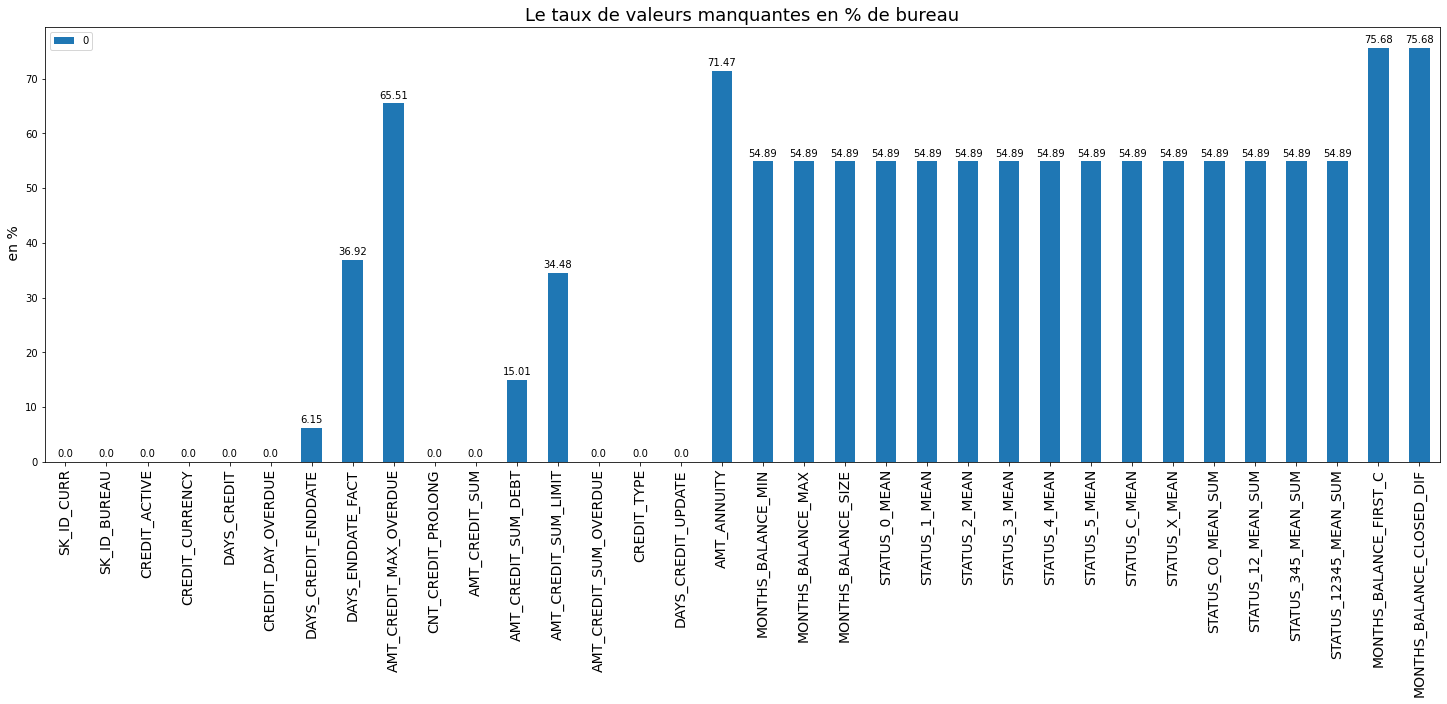

In [18]:
missing_rate = (bureau.isna().sum()/bureau.shape[0])*100
missing_rate

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(25,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='90', fontsize=14)
plt.title("Le taux de valeurs manquantes en % de bureau",fontsize=18)
# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

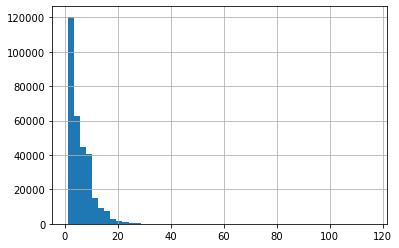

min         1.000000
max       116.000000
mean        5.612709
std         4.430354
median      4.000000
Name: SK_ID_BUREAU, dtype: float64

In [19]:
# How many loans of each customer are there to from Credit Bureau?
bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().hist(bins=50), plt.show()
bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().agg({"min", "max", "mean", "median", "std"})

Manipulation de données de bureau

In [20]:
# FEATURE ENGINEERING FOR BUREAU

# Categorical Variables
# -----------------------------------------------------------
# Useless
# bureau.drop("CREDIT_CURRENCY", axis = 1, inplace = True)

# Rare Categories
bureau["CREDIT_ACTIVE"] = np.where(bureau.CREDIT_ACTIVE.isin(["Sold", "Bad debt"]), "Sold_BadDebt", bureau.CREDIT_ACTIVE)

bureau["CREDIT_TYPE"] = np.where(
    ~bureau.CREDIT_TYPE.isin(
        ["Consumer credit", "Credit card", "Car loan", "Mortgage", "Microloan"]
    ), "Other", bureau["CREDIT_TYPE"])

# One-Hot Encoder
bureau, bureau_cat = one_hot_encoder(bureau, nan_as_category=False)


# Numerical Variables
# -----------------------------------------------------------

# Bureau and bureau_balance numeric features
# cal = ['min', 'max', 'mean', 'sum', 'median','std']
cal = ['mean']
cols1 = [
    'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_CREDIT_UPDATE','CREDIT_DAY_OVERDUE',
    'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_OVERDUE',
    'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY', 'CNT_CREDIT_PROLONG', 'MONTHS_BALANCE_MIN',
    'MONTHS_BALANCE_MAX', 'MONTHS_BALANCE_SIZE', 'MONTHS_BALANCE_FIRST_C', 'MONTHS_BALANCE_CLOSED_DIF'
]

num_aggregations = {}


for i in cols1:
    num_aggregations[i] = cal
    
    
# Bureau and bureau_balance categorical features
cat_aggregations = {}

for i in bureau_cat:
    cat_aggregations[i] = ['mean']

cols2 = ['STATUS_0_MEAN', 'STATUS_1_MEAN', 'STATUS_2_MEAN', 'STATUS_3_MEAN', 'STATUS_4_MEAN',
        'STATUS_5_MEAN', 'STATUS_C_MEAN', 'STATUS_X_MEAN', 'STATUS_C0_MEAN_SUM',
        'STATUS_12_MEAN_SUM', 'STATUS_345_MEAN_SUM', 'STATUS_12345_MEAN_SUM']
for i in cols2:
#     cat_aggregations[i] = ['mean', 'median', 'sum', 'max', 'std']
    cat_aggregations[i] = ['mean']

# del i, cols1, cols2, bureau_cat, cal
    
# Create aggregated data
bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
bureau_agg.columns = pd.Index(['BUREAU_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])


# New features
bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().value_counts()
bcount = bureau.groupby("SK_ID_CURR").SK_ID_BUREAU.count().reset_index().rename({"SK_ID_BUREAU":"BUREAU_COUNT"}, axis = 1)
bcount["BUREAU_COUNT_CAT"] = np.where(bcount.BUREAU_COUNT < 4, 0, 1)
bcount["BUREAU_COUNT_CAT"] = np.where((bcount.BUREAU_COUNT >= 8) & (bcount.BUREAU_COUNT < 13), 2, bcount["BUREAU_COUNT_CAT"])
bcount["BUREAU_COUNT_CAT"] = np.where((bcount.BUREAU_COUNT >= 13) & (bcount.BUREAU_COUNT < 20), 3, bcount["BUREAU_COUNT_CAT"])
bcount["BUREAU_COUNT_CAT"] = np.where((bcount.BUREAU_COUNT >= 20), 4, bcount["BUREAU_COUNT_CAT"])
bureau_agg = pd.merge(bureau_agg, bcount, how = "left", on = "SK_ID_CURR")
# del bcount


# Bureau: Active credits - using only numerical aggregations
active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
active_agg.columns = pd.Index(['ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
bureau_agg = pd.merge(bureau_agg, active_agg, how='left', on='SK_ID_CURR')
# del active, active_agg


# Bureau: Closed credits - using only numerical aggregations
closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
closed_agg.columns = pd.Index(['CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
bureau_agg = pd.merge(bureau_agg, closed_agg, how='left', on='SK_ID_CURR')
# del closed, closed_agg

# Bureau: Sold and Bad Debt credits - using only numerical aggregations
sold_baddebt = bureau[bureau['CREDIT_ACTIVE_Sold_BadDebt'] == 1]
sold_baddebt_agg = sold_baddebt.groupby('SK_ID_CURR').agg(num_aggregations)
sold_baddebt_agg.columns = pd.Index(['SOLD_BADDEBT' + e[0] + "_" + e[1].upper() for e in sold_baddebt_agg.columns.tolist()])
bureau_agg = pd.merge(bureau_agg, sold_baddebt_agg, how='left', on='SK_ID_CURR')
# del sold_baddebt, sold_baddebt_agg, bureau

# del num_aggregations, cat_aggregations

print("BUREAU & BURAU BALANCE SHAPE:", bureau_agg.shape, "\n")

bureau_agg.head()

BUREAU & BURAU BALANCE SHAPE: (305811, 92) 



,SK_ID_CURR,BUREAU_DAYS_CREDIT_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_CREDIT_UPDATE_MEAN,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_LIMIT_MEAN,BUREAU_AMT_ANNUITY_MEAN,BUREAU_CNT_CREDIT_PROLONG_MEAN,BUREAU_MONTHS_BALANCE_MIN_MEAN,BUREAU_MONTHS_BALANCE_MAX_MEAN,BUREAU_MONTHS_BALANCE_SIZE_MEAN,BUREAU_MONTHS_BALANCE_FIRST_C_MEAN,BUREAU_MONTHS_BALANCE_CLOSED_DIF_MEAN,BUREAU_CREDIT_ACTIVE_Active_MEAN,BUREAU_CREDIT_ACTIVE_Closed_MEAN,BUREAU_CREDIT_ACTIVE_Sold_BadDebt_MEAN,BUREAU_CREDIT_CURRENCY_currency 1_MEAN,BUREAU_CREDIT_CURRENCY_currency 2_MEAN,BUREAU_CREDIT_CURRENCY_currency 3_MEAN,BUREAU_CREDIT_CURRENCY_currency 4_MEAN,BUREAU_CREDIT_TYPE_Car loan_MEAN,BUREAU_CREDIT_TYPE_Consumer credit_MEAN,BUREAU_CREDIT_TYPE_Credit card_MEAN,BUREAU_CREDIT_TYPE_Microloan_MEAN,BUREAU_CREDIT_TYPE_Mortgage_MEAN,BUREAU_CREDIT_TYPE_Other_MEAN,BUREAU_STATUS_0_MEAN_MEAN,BUREAU_STATUS_1_MEAN_MEAN,BUREAU_STATUS_2_MEAN_MEAN,BUREAU_STATUS_3_MEAN_MEAN,BUREAU_STATUS_4_MEAN_MEAN,BUREAU_STATUS_5_MEAN_MEAN,BUREAU_STATUS_C_MEAN_MEAN,BUREAU_STATUS_X_MEAN_MEAN,BUREAU_STATUS_C0_MEAN_SUM_MEAN,BUREAU_STATUS_12_MEAN_SUM_MEAN,BUREAU_STATUS_345_MEAN_SUM_MEAN,BUREAU_STATUS_12345_MEAN_SUM_MEAN,BUREAU_COUNT,BUREAU_COUNT_CAT,ACTIVE_DAYS_CREDIT_MEAN,ACTIVE_DAYS_CREDIT_ENDDATE_MEAN,ACTIVE_DAYS_CREDIT_UPDATE_MEAN,ACTIVE_CREDIT_DAY_OVERDUE_MEAN,ACTIVE_AMT_CREDIT_MAX_OVERDUE_MEAN,ACTIVE_AMT_CREDIT_SUM_MEAN,ACTIVE_AMT_CREDIT_SUM_DEBT_MEAN,ACTIVE_AMT_CREDIT_SUM_OVERDUE_MEAN,ACTIVE_AMT_CREDIT_SUM_LIMIT_MEAN,ACTIVE_AMT_ANNUITY_MEAN,ACTIVE_CNT_CREDIT_PROLONG_MEAN,ACTIVE_MONTHS_BALANCE_MIN_MEAN,ACTIVE_MONTHS_BALANCE_MAX_MEAN,ACTIVE_MONTHS_BALANCE_SIZE_MEAN,ACTIVE_MONTHS_BALANCE_FIRST_C_MEAN,ACTIVE_MONTHS_BALANCE_CLOSED_DIF_MEAN,CLOSED_DAYS_CREDIT_MEAN,CLOSED_DAYS_CREDIT_ENDDATE_MEAN,CLOSED_DAYS_CREDIT_UPDATE_MEAN,CLOSED_CREDIT_DAY_OVERDUE_MEAN,CLOSED_AMT_CREDIT_MAX_OVERDUE_MEAN,CLOSED_AMT_CREDIT_SUM_MEAN,CLOSED_AMT_CREDIT_SUM_DEBT_MEAN,CLOSED_AMT_CREDIT_SUM_OVERDUE_MEAN,CLOSED_AMT_CREDIT_SUM_LIMIT_MEAN,CLOSED_AMT_ANNUITY_MEAN,CLOSED_CNT_CREDIT_PROLONG_MEAN,CLOSED_MONTHS_BALANCE_MIN_MEAN,CLOSED_MONTHS_BALANCE_MAX_MEAN,CLOSED_MONTHS_BALANCE_SIZE_MEAN,CLOSED_MONTHS_BALANCE_FIRST_C_MEAN,CLOSED_MONTHS_BALANCE_CLOSED_DIF_MEAN,SOLD_BADDEBTDAYS_CREDIT_MEAN,SOLD_BADDEBTDAYS_CREDIT_ENDDATE_MEAN,SOLD_BADDEBTDAYS_CREDIT_UPDATE_MEAN,SOLD_BADDEBTCREDIT_DAY_OVERDUE_MEAN,SOLD_BADDEBTAMT_CREDIT_MAX_OVERDUE_MEAN,SOLD_BADDEBTAMT_CREDIT_SUM_MEAN,SOLD_BADDEBTAMT_CREDIT_SUM_DEBT_MEAN,SOLD_BADDEBTAMT_CREDIT_SUM_OVERDUE_MEAN,SOLD_BADDEBTAMT_CREDIT_SUM_LIMIT_MEAN,SOLD_BADDEBTAMT_ANNUITY_MEAN,SOLD_BADDEBTCNT_CREDIT_PROLONG_MEAN,SOLD_BADDEBTMONTHS_BALANCE_MIN_MEAN,SOLD_BADDEBTMONTHS_BALANCE_MAX_MEAN,SOLD_BADDEBTMONTHS_BALANCE_SIZE_MEAN,SOLD_BADDEBTMONTHS_BALANCE_FIRST_C_MEAN,SOLD_BADDEBTMONTHS_BALANCE_CLOSED_DIF_MEAN
0,100001,-735.000000,82.428571,-93.142857,0.0,NaN,207623.571429,85240.928571,0.0,0.00000,3545.357143,0.0,-23.571429,0.0,24.571429,26.5,7.500000,0.428571,0.571429,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.336651,0.007519,0.0,0.0,0.0,0.0,0.441240,0.214590,0.777891,0.007519,0.0,0.007519,7,1,-309.333333,1030.333333,-10.666667,0.0,NaN,294675.0000,198895.50,0.0,0.0000,8272.50,0.0,-9.666667,0.0,10.666667,NaN,NaN,-1054.250000,-628.500000,-155.000000,0.0,NaN,142335.0,0.0,0.0,0.0,0.0,0.0,-34.0,0.0,35.0,26.5,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100002,-874.000000,-349.000000,-499.875000,0.0,1681.029,108131.945625,49156.200000,0.0,7997.14125,0.000000,0.0,-28.250000,-15.5,13.750000,20.5,13.166667,0.250000,0.750000,0.0,1.0,0.0,0.0,0.0,0.0,0.500000,0.500000,0.0,0.0,0.0,0.406960,0.255682,0.0,0.0,0.0,0.0,0.175426,0.161932,0.582386,0.255682,0.0,0.255682,8,2,-572.500000,780.000000,-15.500000,0.0,40.5,240994.2825,122890.50,0.0,15994.2825,0.00,0.0,-18.500000,-9.5,10.000000,20.0,14.0,-974.500000,-574.800000,-661.333333,0.0,209

## POS CASH balance

Le taux de valeurs manquantes en %

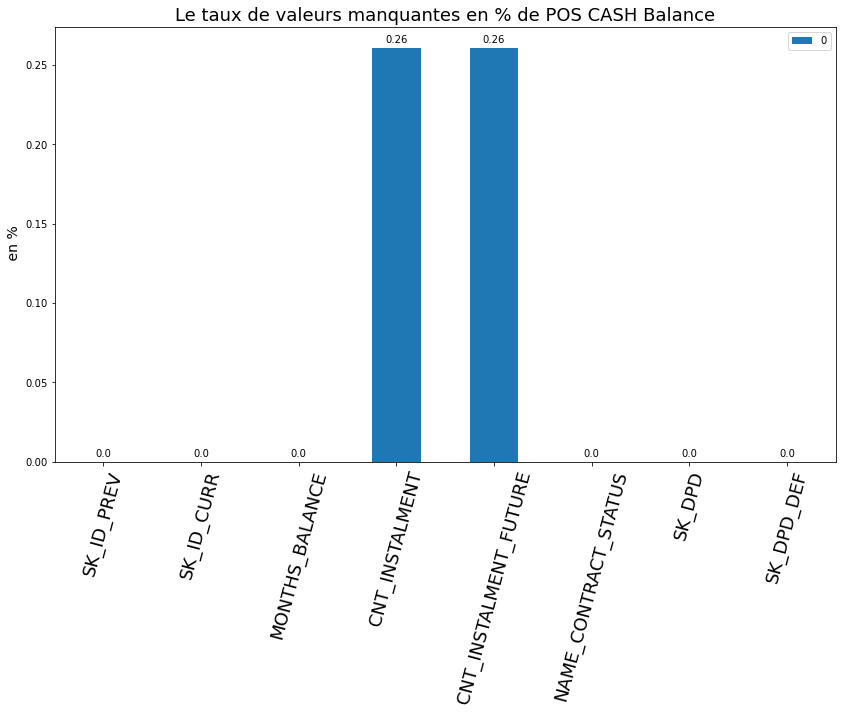

In [21]:
missing_rate = (df_POS_CASH_balance.isna().sum()/df_POS_CASH_balance.shape[0])*100
missing_rate

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(14,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='75', fontsize=18)
plt.title("Le taux de valeurs manquantes en % de POS CASH Balance",fontsize=18)
# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

In [22]:
df_POS_CASH_balance

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0
...,...,...,...,...,...,...,...,...
10001353,2448283,226558,-20,6.0,0.0,Active,843,0
10001354,1717234,141565,-19,12.0,0.0,Active,602,0
10001355,1283126,315695,-21,10.0,0.0,Active,609,0
10001356,1082516,450255,-22,12.0,0.0,Active,614,0


Nettoyage de données de df_POS_CASH_balance

In [23]:
# Rare
df_POS_CASH_balance["NAME_CONTRACT_STATUS"] = np.where(~(df_POS_CASH_balance["NAME_CONTRACT_STATUS"].isin([
   "Active", "Completed"
])), "Rare", df_POS_CASH_balance["NAME_CONTRACT_STATUS"])

# One-Hot Encoder
df_POS_CASH_balance, cat_cols = one_hot_encoder(df_POS_CASH_balance, nan_as_category=False)

aggregations = {
    # Numerical
#     'MONTHS_BALANCE': ['max', 'mean', 'size'],
#     'CNT_INSTALMENT': ['max', 'mean', 'std', 'min', 'median'],
#     'CNT_INSTALMENT_FUTURE': ['max', 'mean', 'sum', 'min', 'median', 'std'],
#     'SK_DPD': ['max', 'mean'],
#     'SK_DPD_DEF': ['max', 'mean']
    'MONTHS_BALANCE': ['mean', 'size'],
    'CNT_INSTALMENT': ['mean'],
    'CNT_INSTALMENT_FUTURE': ['mean'],
    'SK_DPD': ['mean'],
    'SK_DPD_DEF': ['mean']
}
# Categorical
for cat in cat_cols:
    aggregations[cat] = ['mean']

# Aggregation
df_POS_CASH_balance_agg = df_POS_CASH_balance.groupby('SK_ID_CURR').agg(aggregations)
df_POS_CASH_balance_agg.columns = pd.Index(['POS_' + e[0] + "_" + e[1].upper() for e in df_POS_CASH_balance_agg.columns.tolist()])
# Count df_POS_CASH_balance cash accounts
df_POS_CASH_balance_agg['df_POS_CASH_balance_COUNT'] = df_POS_CASH_balance.groupby('SK_ID_CURR').size()
df_POS_CASH_balance_agg.reset_index(inplace = True)
del df_POS_CASH_balance

print("df_POS_CASH_balance CASH BALANCE SHAPE:", df_POS_CASH_balance_agg.shape, "\n")

df_POS_CASH_balance_agg.head()

df_POS_CASH_balance CASH BALANCE SHAPE: (337252, 11) 



,SK_ID_CURR,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_SIZE,POS_CNT_INSTALMENT_MEAN,POS_CNT_INSTALMENT_FUTURE_MEAN,POS_SK_DPD_MEAN,POS_SK_DPD_DEF_MEAN,POS_NAME_CONTRACT_STATUS_Active_MEAN,POS_NAME_CONTRACT_STATUS_Completed_MEAN,POS_NAME_CONTRACT_STATUS_Rare_MEAN,df_POS_CASH_balance_COUNT
0,100001,-72.555556,9,4.000000,1.444444,0.777778,0.777778,0.777778,0.222222,0.000000,9
1,100002,-10.000000,19,24.000000,15.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19
2,100003,-43.785714,28,10.107143,5.785714,0.000000,0.000000,0.928571,0.071429,0.000000,28
3,100004,-25.500000,4,3.750000,2.250000,0.000000,0.000000,0.750000,0.250000,0.000000,4
4,100005,-20.000000,11,11.700000,7.200000,0.000000,0.000000,0.818182,0.090909,0.090909,11


## Credit Card Balance

Aperçus mensuels du solde des cartes de crédit précédentes que le demandeur a avec Home Credit.
Ce tableau comporte une ligne pour chaque mois d'historique de chaque crédit précédent dans Home Credit (crédit à la consommation et prêts de trésorerie) liés aux prêts de notre échantillon - c'est-à-dire que le tableau a (#prêts dans l'échantillon # de cartes de crédit précédentes relatives # de mois où nous avons un historique observable pour les lignes de carte de crédit précédentes).

Le taux de valeurs manquantes en % df_credit_card_balance

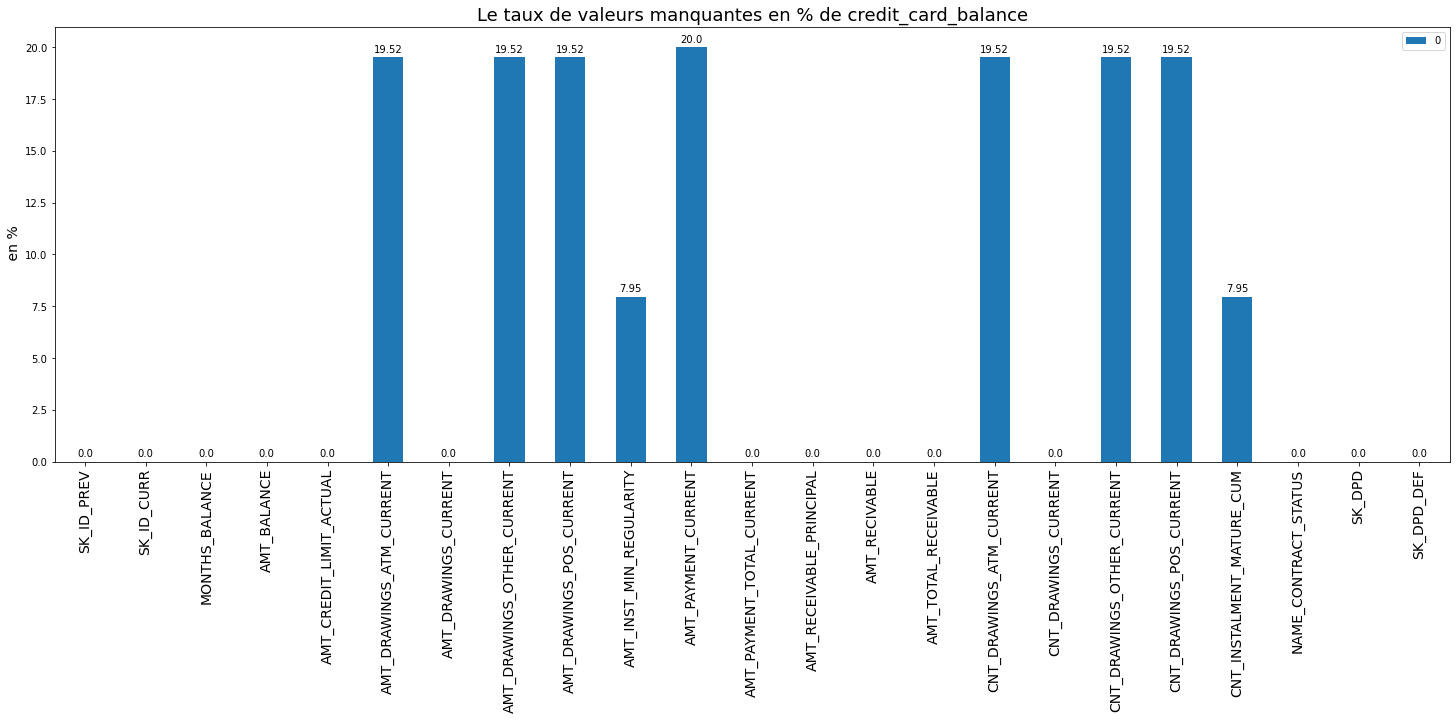

In [24]:
missing_rate = (df_credit_card_balance.isna().sum()/df_credit_card_balance.shape[0])*100

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(25,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='90', fontsize=14)
plt.title("Le taux de valeurs manquantes en % de credit_card_balance",fontsize=18)

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

Nettoyage des données df_credit_card_balance

In [25]:
# Rare
df_credit_card_balance["NAME_CONTRACT_STATUS"] = np.where(~(df_credit_card_balance["NAME_CONTRACT_STATUS"].isin([
   "Active", "Completed"
])), "Rare", df_credit_card_balance["NAME_CONTRACT_STATUS"])

# One Hot Encoder
df_credit_card_balance, cat_cols = one_hot_encoder(df_credit_card_balance, nan_as_category=False)

# General aggregations
df_credit_card_balance.drop(['SK_ID_PREV'], axis=1, inplace=True)
df_credit_card_balance_agg = df_credit_card_balance.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'std'])
df_credit_card_balance_agg.columns = pd.Index(['CC_' + e[0] + "_" + e[1].upper() for e in df_credit_card_balance_agg.columns.tolist()])
# Count credit card lines
df_credit_card_balance_agg['df_credit_card_balance_COUNT'] = df_credit_card_balance.groupby('SK_ID_CURR').size()
df_credit_card_balance_agg.reset_index(inplace = True)
del df_credit_card_balance

print("CREDIT CARD BALANCE SHAPE:", df_credit_card_balance_agg.shape, "\n")

df_credit_card_balance_agg.head()

CREDIT CARD BALANCE SHAPE: (103558, 117) 



,SK_ID_CURR,CC_MONTHS_BALANCE_MIN,CC_MONTHS_BALANCE_MAX,CC_MONTHS_BALANCE_MEAN,CC_MONTHS_BALANCE_SUM,CC_MONTHS_BALANCE_STD,CC_AMT_BALANCE_MIN,CC_AMT_BALANCE_MAX,CC_AMT_BALANCE_MEAN,CC_AMT_BALANCE_SUM,CC_AMT_BALANCE_STD,CC_AMT_CREDIT_LIMIT_ACTUAL_MIN,CC_AMT_CREDIT_LIMIT_ACTUAL_MAX,CC_AMT_CREDIT_LIMIT_ACTUAL_MEAN,CC_AMT_CREDIT_LIMIT_ACTUAL_SUM,CC_AMT_CREDIT_LIMIT_ACTUAL_STD,CC_AMT_DRAWINGS_ATM_CURRENT_MIN,CC_AMT_DRAWINGS_ATM_CURRENT_MAX,CC_AMT_DRAWINGS_ATM_CURRENT_MEAN,CC_AMT_DRAWINGS_ATM_CURRENT_SUM,CC_AMT_DRAWINGS_ATM_CURRENT_STD,CC_AMT_DRAWINGS_CURRENT_MIN,CC_AMT_DRAWINGS_CURRENT_MAX,CC_AMT_DRAWINGS_CURRENT_MEAN,CC_AMT_DRAWINGS_CURRENT_SUM,CC_AMT_DRAWINGS_CURRENT_STD,CC_AMT_DRAWINGS_OTHER_CURRENT_MIN,CC_AMT_DRAWINGS_OTHER_CURRENT_MAX,CC_AMT_DRAWINGS_OTHER_CURRENT_MEAN,CC_AMT_DRAWINGS_OTHER_CURRENT_SUM,CC_AMT_DRAWINGS_OTHER_CURRENT_STD,CC_AMT_DRAWINGS_POS_CURRENT_MIN,CC_AMT_DRAWINGS_POS_CURRENT_MAX,CC_AMT_DRAWINGS_POS_CURRENT_MEAN,CC_AMT_DRAWINGS_POS_CURRENT_SUM,CC_AMT_DRAWINGS_POS_CURRENT_STD,CC_AMT_INST_MIN_REGULARITY_MIN,CC_AMT_INST_MIN_REGULARITY_MAX,CC_AMT_INST_MIN_REGULARITY_MEAN,CC_AMT_INST_MIN_REGULARITY_SUM,CC_AMT_INST_MIN_REGULARITY_STD,CC_AMT_PAYMENT_CURRENT_MIN,CC_AMT_PAYMENT_CURRENT_MAX,CC_AMT_PAYMENT_CURRENT_MEAN,CC_AMT_PAYMENT_CURRENT_SUM,CC_AMT_PAYMENT_CURRENT_STD,CC_AMT_PAYMENT_TOTAL_CURRENT_MIN,CC_AMT_PAYMENT_TOTAL_CURRENT_MAX,CC_AMT_PAYMENT_TOTAL_CURRENT_MEAN,CC_AMT_PAYMENT_TOTAL_CURRENT_SUM,CC_AMT_PAYMENT_TOTAL_CURRENT_STD,CC_AMT_RECEIVABLE_PRINCIPAL_MIN,CC_AMT_RECEIVABLE_PRINCIPAL_MAX,CC_AMT_RECEIVABLE_PRINCIPAL_MEAN,CC_AMT_RECEIVABLE_PRINCIPAL_SUM,CC_AMT_RECEIVABLE_PRINCIPAL_STD,CC_AMT_RECIVABLE_MIN,CC_AMT_RECIVABLE_MAX,CC_AMT_RECIVABLE_MEAN,CC_AMT_RECIVABLE_SUM,CC_AMT_RECIVABLE_STD,CC_AMT_TOTAL_RECEIVABLE_MIN,CC_AMT_TOTAL_RECEIVABLE_MAX,CC_AMT_TOTAL_RECEIVABLE_MEAN,CC_AMT_TOTAL_RECEIVABLE_SUM,CC_AMT_TOTAL_RECEIVABLE_STD,CC_CNT_DRAWINGS_ATM_CURRENT_MIN,CC_CNT_DRAWINGS_ATM_CURRENT_MAX,CC_CNT_DRAWINGS_ATM_CURRENT_MEAN,CC_CNT_DRAWINGS_ATM_CURRENT_SUM,CC_CNT_DRAWINGS_ATM_CURRENT_STD,CC_CNT_DRAWINGS_CURRENT_MIN,CC_CNT_DRAWINGS_CURRENT_MAX,CC_CNT_DRAWINGS_CURRENT_MEAN,CC_CNT_DRAWINGS_CURRENT_SUM,CC_CNT_DRAWINGS_CURRENT_STD,CC_CNT_DRAWINGS_OTHER_CURRENT_MIN,CC_CNT_DRAWINGS_OTHER_CURRENT_MAX,CC_CNT_DRAWINGS_OTHER_CURRENT_MEAN,CC_CNT_DRAWINGS_OTHER_CURRENT_SUM,CC_CNT_DRAWINGS_OTHER_CURRENT_STD,CC_CNT_DRAWINGS_POS_CURRENT_MIN,CC_CNT_DRAWINGS_POS_CURRENT_MAX,CC_CNT_DRAWINGS_POS_CURRENT_MEAN,CC_CNT_DRAWINGS_POS_CURRENT_SUM,CC_CNT_DRAWINGS_POS_CURRENT_STD,CC_CNT_INSTALMENT_MATURE_CUM_MIN,CC_CNT_INSTALMENT_MATURE_CUM_MAX,CC_CNT_INSTALMENT_MATURE_CUM_MEAN,CC_CNT_INSTALMENT_MATURE_CUM_SUM,CC_CNT_INSTALMENT_MATURE_CUM_STD,CC_SK_DPD_MIN,CC_SK_DPD_MAX,CC_SK_DPD_MEAN,CC_SK_DPD_SUM,CC_SK_DPD_STD,CC_SK_DPD_DEF_MIN,CC_SK_DPD_DEF_MAX,CC_SK_DPD_DEF_MEAN,CC_SK_DPD_DEF_SUM,CC_SK_DPD_DEF_STD,CC_NAME_CONTRACT_STATUS_Active_MIN,CC_NAME_CONTRACT_STATUS_Active_MAX,CC_NAME_CONTRACT_STATUS_Active_MEAN,CC_NAME_CONTRACT_STATUS_Active_SUM,CC_NAME_CONTRACT_STATUS_Active_STD,CC_NAME_CONTRACT_STATUS_Completed_MIN,CC_NAME_CONTRACT_STATUS_Completed_MAX,CC_NAME_CONTRACT_STATUS_Completed_MEAN,CC_NAME_CONTRACT_STATUS_Completed_SUM,CC_NAME_CONTRACT_STATUS_Completed_STD,CC_NAME_CONTRACT_STATUS_Rare_MIN,CC_NAME_CONTRACT_STATUS_Rare_MAX,CC_NAME_CONTRACT_STATUS_Rare_MEAN,CC_NAME_CONTRACT_STATUS_Rare_SUM,CC_NAME_CONTRACT_STATUS_Rare_STD,df_credit_card_balance_COUNT
0,100006,-6,-1,-3.5,-21,1.870829,0.0,0.00,0.000000,0.000,0.000000,270000,270000,270000.000000,1620000,0.000000,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.000000,0.0,0.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.000000,0.000,0.000000,NaN,NaN,NaN,0.00,NaN,0.0,0.0,0.000000,0.000,0.000000,0.0,0.0,0.000000,0.000,0.000000,0.000,0.00,0.000000,0.000,0.000000,0.000,0.00,0.000000,0.000,0.000000,NaN,NaN,NaN,0.0,NaN,0,0,0.000000,0,0.000000,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.000000,0.0,0.000000,0,0,0.000000,0,0.000000,0,0,0.000000,0,0.000000,1,1,1.000000,6,0.0000,0,0,0.000000,0,0.0000,0,0,0.0

## Installments Payments

Historique de remboursement des crédits précédemment décaissés en Home Credit liés aux prêts de notre échantillon. Il y a :

-  une ligne pour chaque paiement effectué plus 
-  une ligne pour chaque paiement manqué. Une ligne équivaut à un versement d'une échéance ou une échéance correspondant à un versement d'un précédent crédit immobilier lié aux crédits de notre échantillon.

Le taux de valeurs manquantes en % df_credit_card_balance

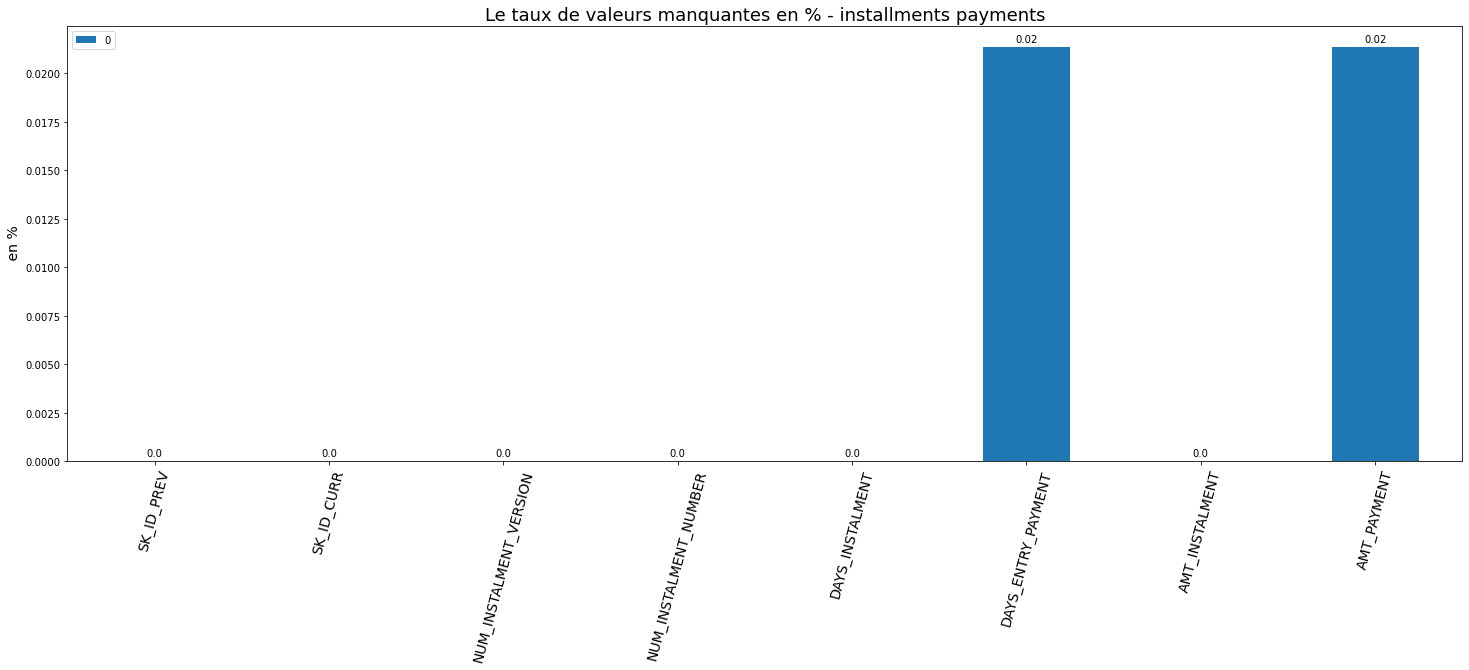

In [26]:
missing_rate = (df_installments_payments.isna().sum()/df_installments_payments.shape[0])*100

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(25,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='75', fontsize=14)
plt.title("Le taux de valeurs manquantes en % - installments payments",fontsize=18)

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

In [27]:
# Percentage and difference paid in each installment (amount paid and installment value)
df_installments_payments['PAYMENT_PERC'] = df_installments_payments['AMT_PAYMENT'] / df_installments_payments['AMT_INSTALMENT']
df_installments_payments['PAYMENT_DIFF'] = df_installments_payments['AMT_INSTALMENT'] - df_installments_payments['AMT_PAYMENT']
# Days past due and days before due (no negative values)
df_installments_payments['DPD'] = df_installments_payments['DAYS_ENTRY_PAYMENT'] - df_installments_payments['DAYS_INSTALMENT']
df_installments_payments['DBD'] = df_installments_payments['DAYS_INSTALMENT'] - df_installments_payments['DAYS_ENTRY_PAYMENT']
df_installments_payments['DPD'] = df_installments_payments['DPD'].apply(lambda x: x if x > 0 else 0)
df_installments_payments['DBD'] = df_installments_payments['DBD'].apply(lambda x: x if x > 0 else 0)
# Features: Perform aggregations
aggregations = {
    'NUM_INSTALMENT_VERSION': ['nunique'],
    'NUM_INSTALMENT_NUMBER': ['mean'],
    'DAYS_INSTALMENT': ['mean'],
    'DAYS_ENTRY_PAYMENT': ['mean'],
    'AMT_INSTALMENT': ['mean'],
    'AMT_PAYMENT': ['mean'],
    'DPD': ['mean'],
    'DBD': ['mean'],
    'PAYMENT_PERC': ['mean'],
    'PAYMENT_DIFF': ['mean']
}

df_installments_payments_agg = df_installments_payments.groupby('SK_ID_CURR').agg(aggregations)
df_installments_payments_agg.columns = pd.Index(['INS_' + e[0] + "_" + e[1].upper() for e in df_installments_payments_agg.columns.tolist()])
# Count installments accounts
df_installments_payments_agg['INS_COUNT'] = df_installments_payments.groupby('SK_ID_CURR').size()

df_installments_payments_agg.reset_index(inplace = True)
del df_installments_payments



print("INSTALLMENTS PAYMENTS SHAPE:", df_installments_payments_agg.shape, "\n")

df_installments_payments_agg.head()

INSTALLMENTS PAYMENTS SHAPE: (339587, 12) 



,SK_ID_CURR,INS_NUM_INSTALMENT_VERSION_NUNIQUE,INS_NUM_INSTALMENT_NUMBER_MEAN,INS_DAYS_INSTALMENT_MEAN,INS_DAYS_ENTRY_PAYMENT_MEAN,INS_AMT_INSTALMENT_MEAN,INS_AMT_PAYMENT_MEAN,INS_DPD_MEAN,INS_DBD_MEAN,INS_PAYMENT_PERC_MEAN,INS_PAYMENT_DIFF_MEAN,INS_COUNT
0,100001,2,2.714286,-2187.714286,-2195.000000,5885.132143,5885.132143,1.571429,8.857143,1.0,0.0,7
1,100002,2,10.000000,-295.000000,-315.421053,11559.247105,11559.247105,0.000000,20.421053,1.0,0.0,19
2,100003,2,5.080000,-1378.160000,-1385.320000,64754.586000,64754.586000,0.000000,7.160000,1.0,0.0,25
3,100004,2,2.000000,-754.000000,-761.666667,7096.155000,7096.155000,0.000000,7.666667,1.0,0.0,3
4,100005,2,5.000000,-586.000000,-609.555556,6240.205000,6240.205000,0.111111,23.666667,1.0,0.0,9


## Previous Applications

- Toutes les demandes précédentes de prêts immobiliers des clients qui ont des prêts dans notre échantillon.
- Il y a une ligne pour chaque demande précédente liée aux prêts dans notre échantillon de données.

Le taux de valeurs manquantes en % df_previous_application

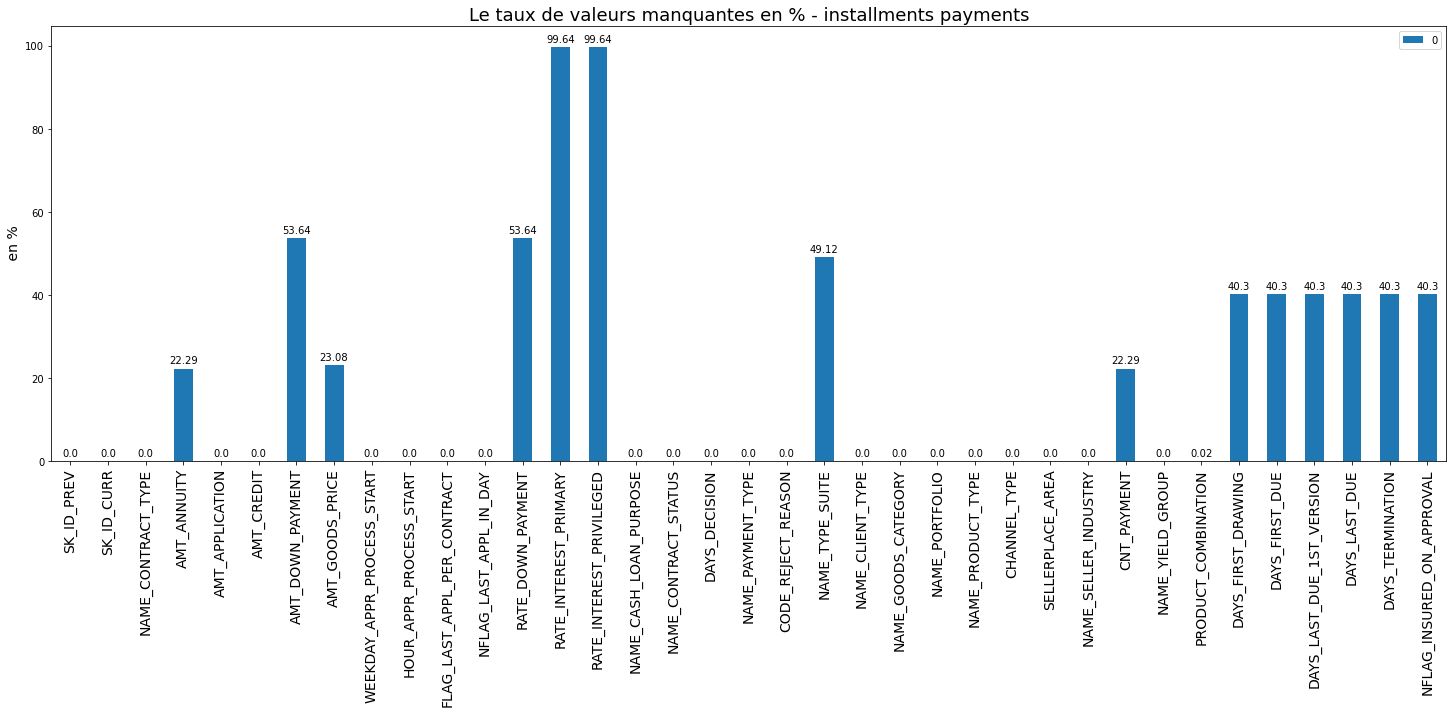

In [28]:
missing_rate = (df_previous_application.isna().sum()/df_previous_application.shape[0])*100

missing_rate = pd.DataFrame(missing_rate)
ax = missing_rate.plot.bar(figsize=(25,8))

ax.set_ylabel(" en %", fontsize=14)
plt.xticks(rotation='90', fontsize=14)
plt.title("Le taux de valeurs manquantes en % - installments payments",fontsize=18)

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )

Nettoyage des données de df_previous_application

In [29]:
# Rare Encoder
rare_cols = [
    "NAME_PAYMENT_TYPE", "CODE_REJECT_REASON", "CHANNEL_TYPE", "NAME_GOODS_CATEGORY",
    "NAME_SELLER_INDUSTRY", "NAME_TYPE_SUITE"
]

for i in rare_cols:
    rare_encoder(df_previous_application, i, rare_perc = 0.01)

df_previous_application["NAME_CASH_LOAN_PURPOSE"] = np.where(~df_previous_application["NAME_CASH_LOAN_PURPOSE"].isin(["XAP", "XNA"]), "Other", df_previous_application["NAME_CASH_LOAN_PURPOSE"])

rare_encoder(df_previous_application, "NAME_PORTFOLIO", rare_perc = 0.1) 

# Cash, Pos, Card
df_previous_application["PRODUCT_COMBINATION_CATS"] = np.where(df_previous_application["PRODUCT_COMBINATION"].str.contains("Cash"), "CASH", "POS")
df_previous_application["PRODUCT_COMBINATION_CATS"] = np.where(df_previous_application["PRODUCT_COMBINATION"].str.contains("Card"), "CARD", df_previous_application["PRODUCT_COMBINATION_CATS"])
# New categorical variables
df_previous_application["PRODUCT_COMBINATION_POS_WITH"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("without"))), "WITHOUT", "OTHER")
df_previous_application["PRODUCT_COMBINATION_POS_WITH"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("with interest"))), "WITH", df_previous_application["PRODUCT_COMBINATION_POS_WITH"])
df_previous_application["PRODUCT_COMBINATION_POS_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("household"))), "household", "OTHER")
df_previous_application["PRODUCT_COMBINATION_POS_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("industry"))), "industry", df_previous_application["PRODUCT_COMBINATION_POS_TYPE"])
df_previous_application["PRODUCT_COMBINATION_POS_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("mobile"))), "mobile", df_previous_application["PRODUCT_COMBINATION_POS_TYPE"])
df_previous_application["PRODUCT_COMBINATION_POS_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("POS") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("other"))), "posother", df_previous_application["PRODUCT_COMBINATION_POS_TYPE"])
df_previous_application["PRODUCT_COMBINATION_CASH_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("Cash") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("X-Sell"))), "xsell", "OTHER")
df_previous_application["PRODUCT_COMBINATION_CASH_TYPE"] = np.where((df_previous_application["PRODUCT_COMBINATION"].str.contains("Cash") & (df_previous_application["PRODUCT_COMBINATION"].str.contains("Street"))), "street", df_previous_application["PRODUCT_COMBINATION_CASH_TYPE"])


# Useless
df_previous_application.drop(["WEEKDAY_APPR_PROCESS_START", "FLAG_LAST_APPL_PER_CONTRACT", "NFLAG_LAST_APPL_IN_DAY", "NFLAG_LAST_APPL_IN_DAY"], axis = 1, inplace = True)

# One-Hot Encoder
df_previous_application, cat_cols = one_hot_encoder(df_previous_application, nan_as_category=True)


# Days 365.243 values -> nan
df_previous_application['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
df_previous_application['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
df_previous_application['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
df_previous_application['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
df_previous_application['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)

# Add feature: value ask / value received percentage
df_previous_application['APP_CREDIT_PERC'] = df_previous_application['AMT_APPLICATION'] / df_previous_application['AMT_CREDIT']


# Previous Applications numeric features
num_aggregations = {
#     'AMT_ANNUITY': ['min', 'max', 'mean', "median", "std"],
#     'AMT_APPLICATION': ['min', 'max', 'mean', "median", "std"],
#     'AMT_CREDIT': ['min', 'max', 'mean', "median", "std"],
#     'APP_CREDIT_PERC': ['min', 'max', 'mean', "median", "std"],
#     'AMT_DOWN_PAYMENT': ['min', 'max', 'mean', "median", "std"],
#     'AMT_GOODS_PRICE': ['min', 'max', 'mean', "median", "std"],
#     'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean', "median", "std"],
#     'RATE_DOWN_PAYMENT': ['min', 'max', 'mean', "std"],
#     'RATE_INTEREST_PRIMARY': ['min', 'max', 'mean', "std"],
#     'RATE_INTEREST_PRIVILEGED': ['min', 'max', 'mean', "std"],
#     'DAYS_DECISION': ['min', 'max', 'mean', "median", "std"],
#     'CNT_PAYMENT': ['mean', 'sum', "median", "std"],
#     'SELLERPLACE_AREA': ['min', 'max', 'mean', "median", "std"],
#     'DAYS_FIRST_DRAWING': ['min', 'max', 'mean', "median", "std"],
#     'DAYS_FIRST_DUE': ['min', 'max', 'mean', "median", "std"],
#     'DAYS_LAST_DUE_1ST_VERSION': ['min', 'max', 'mean', "median", "std"],
#     'DAYS_LAST_DUE': ['min', 'max', 'mean', "median", "std"],
#     'DAYS_TERMINATION': ['min', 'max', 'mean', "median", "std"],
    
    'AMT_ANNUITY': ['mean'],
    'AMT_APPLICATION': ['mean'],
    'AMT_CREDIT': ['mean'],
    'APP_CREDIT_PERC': ['mean'],
    'AMT_DOWN_PAYMENT': ['mean'],
    'AMT_GOODS_PRICE': ['mean'],
    'HOUR_APPR_PROCESS_START': ['mean'],
    'RATE_DOWN_PAYMENT': ['mean'],
    'RATE_INTEREST_PRIMARY': ['mean'],
    'RATE_INTEREST_PRIVILEGED': ['mean'],
    'DAYS_DECISION': ['mean'],
    'CNT_PAYMENT': ['mean'],
    'SELLERPLACE_AREA': ['mean'],
    'DAYS_FIRST_DRAWING': ['mean'],
    'DAYS_FIRST_DUE': ['mean'],
    'DAYS_LAST_DUE_1ST_VERSION': ['mean'],
    'DAYS_LAST_DUE': ['mean'],
    'DAYS_TERMINATION': ['mean'],
    # Categorical
    "NFLAG_INSURED_ON_APPROVAL": ["mean"]
}
# Previous Applications categorical features
cat_aggregations = {}
for cat in cat_cols:
    cat_aggregations[cat] = ['mean']

df_previous_application_agg = df_previous_application.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
df_previous_application_agg.columns = pd.Index(['PREV_' + e[0] + "_" + e[1].upper() for e in df_previous_application_agg.columns.tolist()])

# Previous Applications: Approved Applications - only numerical features
approved = df_previous_application[df_previous_application['NAME_CONTRACT_STATUS_Approved'] == 1]
approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
approved_agg.columns = pd.Index(['APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
df_previous_application_agg = pd.merge(df_previous_application_agg,approved_agg, how='left', on='SK_ID_CURR')

# Previous Applications: Refused Applications - only numerical features
refused = df_previous_application[df_previous_application['NAME_CONTRACT_STATUS_Refused'] == 1]
refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
refused_agg.columns = pd.Index(['REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
df_previous_application_agg = pd.merge(df_previous_application_agg, refused_agg, how='left', on='SK_ID_CURR')

del refused, refused_agg, approved, approved_agg
df_previous_application_agg.reset_index(inplace = True)


print("PREVIOUS APPLICATIONS SHAPE:", df_previous_application_agg.shape, "\n")

df_previous_application_agg.head()

PREVIOUS APPLICATIONS SHAPE: (338857, 174) 



,SK_ID_CURR,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MEAN,PREV_APP_CREDIT_PERC_MEAN,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_GOODS_PRICE_MEAN,PREV_HOUR_APPR_PROCESS_START_MEAN,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_RATE_INTEREST_PRIMARY_MEAN,PREV_RATE_INTEREST_PRIVILEGED_MEAN,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN,PREV_SELLERPLACE_AREA_MEAN,PREV_DAYS_FIRST_DRAWING_MEAN,PREV_DAYS_FIRST_DUE_MEAN,PREV_DAYS_LAST_DUE_1ST_VERSION_MEAN,PREV_DAYS_LAST_DUE_MEAN,PREV_DAYS_TERMINATION_MEAN,PREV_NFLAG_INSURED_ON_APPROVAL_MEAN,PREV_NAME_CONTRACT_TYPE_Cash loans_MEAN,PREV_NAME_CONTRACT_TYPE_Consumer loans_MEAN,PREV_NAME_CONTRACT_TYPE_Revolving loans_MEAN,PREV_NAME_CONTRACT_TYPE_XNA_MEAN,PREV_NAME_CONTRACT_TYPE_nan_MEAN,PREV_NAME_CASH_LOAN_PURPOSE_Other_MEAN,PREV_NAME_CASH_LOAN_PURPOSE_XAP_MEAN,PREV_NAME_CASH_LOAN_PURPOSE_XNA_MEAN,PREV_NAME_CASH_LOAN_PURPOSE_nan_MEAN,PREV_NAME_CONTRACT_STATUS_Approved_MEAN,PREV_NAME_CONTRACT_STATUS_Canceled_MEAN,PREV_NAME_CONTRACT_STATUS_Refused_MEAN,PREV_NAME_CONTRACT_STATUS_Unused offer_MEAN,PREV_NAME_CONTRACT_STATUS_nan_MEAN,PREV_NAME_PAYMENT_TYPE_Cash through the bank_MEAN,PREV_NAME_PAYMENT_TYPE_Rare_MEAN,PREV_NAME_PAYMENT_TYPE_XNA_MEAN,PREV_NAME_PAYMENT_TYPE_nan_MEAN,PREV_CODE_REJECT_REASON_CLIENT_MEAN,PREV_CODE_REJECT_REASON_HC_MEAN,PREV_CODE_REJECT_REASON_LIMIT_MEAN,PREV_CODE_REJECT_REASON_Rare_MEAN,PREV_CODE_REJECT_REASON_SCO_MEAN,PREV_CODE_REJECT_REASON_XAP_MEAN,PREV_CODE_REJECT_REASON_nan_MEAN,PREV_NAME_TYPE_SUITE_Children_MEAN,PREV_NAME_TYPE_SUITE_Family_MEAN,PREV_NAME_TYPE_SUITE_Other_B_MEAN,PREV_NAME_TYPE_SUITE_Rare_MEAN,"PREV_NAME_TYPE_SUITE_Spouse, partner_MEAN",PREV_NAME_TYPE_SUITE_Unaccompanied_MEAN,PREV_NAME_TYPE_SUITE_nan_MEAN,PREV_NAME_CLIENT_TYPE_New_MEAN,PREV_NAME_CLIENT_TYPE_Refreshed_MEAN,PREV_NAME_CLIENT_TYPE_Repeater_MEAN,PREV_NAME_CLIENT_TYPE_XNA_MEAN,PREV_NAME_CLIENT_TYPE_nan_MEAN,PREV_NAME_GOODS_CATEGORY_Audio/Video_MEAN,PREV_NAME_GOODS_CATEGORY_Clothing and Accessories_MEAN,PREV_NAME_GOODS_CATEGORY_Computers_MEAN,PREV_NAME_GOODS_CATEGORY_Construction Materials_MEAN,PREV_NAME_GOODS_CATEGORY_Consumer Electronics_MEAN,PREV_NAME_GOODS_CATEGORY_Furniture_MEAN,PREV_NAME_GOODS_CATEGORY_Mobile_MEAN,PREV_NAME_GOODS_CATEGORY_Photo / Cinema Equipment_MEAN,PREV_NAME_GOODS_CATEGORY_Rare_MEAN,PREV_NAME_GOODS_CATEGORY_XNA_MEAN,PREV_NAME_GOODS_CATEGORY_nan_MEAN,PREV_NAME_PORTFOLIO_Cash_MEAN,PREV_NAME_PORTFOLIO_POS_MEAN,PREV_NAME_PORTFOLIO_Rare_MEAN,PREV_NAME_PORTFOLIO_XNA_MEAN,PREV_NAME_PORTFOLIO_nan_MEAN,PREV_NAME_PRODUCT_TYPE_XNA_MEAN,PREV_NAME_PRODUCT_TYPE_walk-in_MEAN,PREV_NAME_PRODUCT_TYPE_x-sell_MEAN,PREV_NAME_PRODUCT_TYPE_nan_MEAN,PREV_CHANNEL_TYPE_AP+ (Cash loan)_MEAN,PREV_CHANNEL_TYPE_Contact center_MEAN,PREV_CHANNEL_TYPE_Country-wide_MEAN,PREV_CHANNEL_TYPE_Credit and cash offices_MEAN,PREV_CHANNEL_TYPE_Rare_MEAN,PREV_CHANNEL_TYPE_Regional / Local_MEAN,PREV_CHANNEL_TYPE_Stone_MEAN,PREV_CHANNEL_TYPE_nan_MEAN,PREV_NAME_SELLER_INDUSTRY_Clothing_MEAN,PREV_NAME_SELLER_INDUSTRY_Connectivity_MEAN,PREV_NAME_SELLER_INDUSTRY_Construction_MEAN,PREV_NAME_SELLER_INDUSTRY_Consumer electronics_MEAN,PREV_NAME_SELLER_INDUSTRY_Furniture_MEAN,PREV_NAME_SELLER_INDUSTRY_Industry_MEAN,PREV_NAME_SELLER_INDUSTRY_Rare_MEAN,PREV_NAME_SELLER_INDUSTRY_XNA_MEAN,PREV_NAME_SELLER_INDUSTRY_nan_MEAN,PREV_NAME_YIELD_GROUP_XNA_MEAN,PREV_NAME_YIELD_GROUP_high_MEAN,PREV_NAME_YIELD_GROUP_low_action_MEAN,PREV_NAME_YIELD_GROUP_low_normal_MEAN,PREV_NAME_YIELD_GROUP_middle_MEAN,PREV_NAME_YIELD_GROUP_nan_MEAN,PREV_PRODUCT_COMBINATION_Card Street_MEAN,PREV_PRODUCT_COMBINATION_Card X-Sell_MEAN,PREV_PRODUCT_COMBINATION_Cash_MEAN,PREV_PRODUCT_COMBINATION_Cash Street: high_MEAN,PREV_PRODUCT_COMBINATION_Cash Street: low_MEAN,PREV_PRODUCT_COMBINATION_Cash Street: middle_MEAN,PREV_PRODUCT_COMBINATION_Cash X-Sell: high_MEAN,PREV_PRODUCT_COMBINATION_Cash X-Sell: low_MEAN,PREV_PRODUCT_COMBINATION_Cash X-Sell: middle_MEAN,PREV_PRODUCT_COMBINATION_POS household with interest_MEAN,PREV_PRODUCT_COMBINATION_POS household wit

## Application Train/Test

- Il s'agit de la table principale, divisée en deux fichiers pour Train (avec TARGET) et Test (sans TARGET).
- Données statiques pour toutes les applications. Une ligne représente un prêt dans notre échantillon de données.

Le taux de valeurs manquantes en % df_previous_application

In [30]:
missing_rate = (df_app_train.isna().sum()/df_app_train.shape[0])*100

missing_rate = pd.DataFrame(missing_rate)
missing_rate

,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
...,...
AMT_REQ_CREDIT_BUREAU_DAY,13.501631
AMT_REQ_CREDIT_BUREAU_WEEK,13.501631
AMT_REQ_CREDIT_BUREAU_MON,13.501631
AMT_REQ_CREDIT_BUREAU_QRT,13.501631


In [31]:
df_app_train[df_app_train.CODE_GENDER.str.contains("XNA")]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000.0,382500.0,19125.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.020713,-20232,-10044,-10024.0,-3537,13.0,1,1,1,1,1,0,NaN,2.0,3,3,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,NaN,0.295998,0.461482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-286.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
38566,144669,0,Revolving loans,XNA,N,Y,2,157500.0,270000.0,13500.0,225000.0,Family,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13717,-2797,-2241.0,-4659,NaN,1,1,1,1,1,0,Low-skill Laborers,4.0,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,NaN,0.709205,0.310818,0.0165,0.0368,0.9811,NaN,NaN,0.0,0.0690,0.0417,NaN,0.0233,NaN,0.0115,NaN,0.0000,0.0168,0.0382,0.9811,NaN,NaN,0.0,0.0690,0.0417,NaN,0.0238,NaN,0.0120,NaN,0.0000,0.0167,0.0368,0.9811,NaN,NaN,0.0,0.0690,0.0417,NaN,0.0237,NaN,0.0117,NaN,0.000,NaN,block of flats,0.0090,"Stone, brick",No,0.0,0.0,0.0,0.0,-493.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,3.0,0.0,4.0
83382,196708,0,Revolving loans,XNA,N,Y,1,135000.0,405000.0,20250.0,225000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.035792,-10647,-1228,-183.0,-1671,NaN,1,1,1,1,1,0,Core staff,3.0,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.404970,0.659185,0.076984,0.0773,0.1353,0.9921,0.8912,NaN,0.0,0.1379,0.1667,0.0417,NaN,0.0630,0.0621,0.0000,NaN,0.0788,0.1404,0.9921,0.8955,NaN,0.0,0.1379,0.1667,0.0417,NaN,0.0689,0.0647,0.0000,NaN,0.0781,0.1353,0.9921,0.8927,NaN,0.0,0.1379,0.1667,0.0417,NaN,0.0641,0.0632,0.0000,NaN,reg oper spec account,block of flats,0.076

In [32]:
df_app_train.NAME_FAMILY_STATUS.unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

In [33]:
df_app_train[df_app_train.NAME_FAMILY_STATUS.str.contains("Unknown")]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
41982,148605,0,Revolving loans,M,N,Y,0,450000.0,675000.0,33750.0,NaN,NaN,Commercial associate,Lower secondary,Unknown,Municipal apartment,0.015221,-12396,-1161,-3265.0,-4489,NaN,1,1,1,1,1,0,Managers,NaN,2,2,THURSDAY,15,0,1,1,0,1,1,Insurance,0.628564,0.700618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,3.0,0.0,-876.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
187348,317181,0,Revolving loans,F,N,Y,0,202500.0,585000.0,29250.0,NaN,NaN,Commercial associate,Higher education,Unknown,House / apartment,0.031329,-12844,-232,-1597.0,-1571,NaN,1,1,0,1,0,0,Accountants,NaN,2,2,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 2,NaN,0.645168,0.670652,0.1031,0.0467,0.997,0.9592,0.0081,0.08,0.069,0.375,0.4167,NaN,0.0841,0.088,0.0,0.0,0.105,0.0485,0.997,0.9608,0.0082,0.0806,0.069,0.375,0.4167,NaN,0.0918,0.0917,0.0,0.0,0.1041,0.0467,0.997,0.9597,0.0082,0.08,0.069,0.375,0.4167,NaN,0.0855,0.0896,0.0,0.0,reg oper account,block of flats,0.0791,Panel,No,1.0,0.0,1.0,0.0,-654.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


Suppression des colonnes non pértinentes

In [34]:
# Columns
cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(df_app_train, car_th=10)

# ERRORS
df_app_train = df_app_train[~(df_app_train.CODE_GENDER.str.contains("XNA"))]  
df_app_train = df_app_train[df_app_train.NAME_FAMILY_STATUS != "Unknown"]  

# DROP
cols = ["NAME_HOUSING_TYPE", "WEEKDAY_APPR_PROCESS_START", "FONDKAPREMONT_MODE", "WALLSMATERIAL_MODE", "HOUSETYPE_MODE",
        "EMERGENCYSTATE_MODE","FLAG_MOBIL", "FLAG_EMP_PHONE","FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "FLAG_EMAIL"]
df_app_train.drop(cols, axis = 1, inplace = True)

# REGION
cols = ["REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION", "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY",
 "REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY"]
df_app_train["REGION"] = df_app_train[cols].sum(axis = 1)
df_app_train.drop(cols, axis = 1, inplace = True)

# Drop FLAG_DOCUMENT 
df_app_train.drop(df_app_train.columns[df_app_train.columns.str.contains("FLAG_DOCUMENT")], axis = 1, inplace = True)

Observations: 307511
Variables: 122
date_cols: 0
cat_cols: 53
num_cols: 67
cat_but_car: 2
num_but_cat: 39


In [35]:
# RARE ENCODER
df_app_train["NAME_EDUCATION_TYPE"] = np.where(df_app_train.NAME_EDUCATION_TYPE == "Academic degree", "Higher education", df_app_train.NAME_EDUCATION_TYPE)


df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.str.contains("Business Entity"), "Business Entity", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.str.contains("Industry"), "Industry", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.str.contains("Trade"), "Trade", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.str.contains("Transport"), "Transport", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.isin(["School", "Kindergarten", "University"]), "Education", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.isin(["Emergency","Police", "Medicine","Goverment", "Postal", "Military", "Security Ministries", "Legal Services"]), "Public", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.isin(["Bank", "Insurance"]), "Finance", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.isin(["Realtor", "Housing"]), "House", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.isin(["Hotel", "Restaurant"]), "HotelRestaurant", df_app_train.ORGANIZATION_TYPE)
df_app_train["ORGANIZATION_TYPE"] = np.where(df_app_train.ORGANIZATION_TYPE.isin(["Cleaning","Electricity", "Telecom", "Mobile", "Advertising", "Religion", "Culture"]), "Other", df_app_train.ORGANIZATION_TYPE)

df_app_train["OCCUPATION_TYPE"] = np.where(df_app_train.OCCUPATION_TYPE.isin(["Low-skill Laborers", "Cooking staff", "Security staff", "Private service staff", "Cleaning staff", "Waiters/barmen staff"]), "Low-skill Laborers", df_app_train.OCCUPATION_TYPE)
df_app_train["OCCUPATION_TYPE"] = np.where(df_app_train.OCCUPATION_TYPE.isin(["IT staff", "High skill tech staff"]), "High skill tech staff", df_app_train.OCCUPATION_TYPE)


rare_cols = ["NAME_TYPE_SUITE", "NAME_INCOME_TYPE"]

for i in rare_cols:
    rare_encoder(df_app_train, i, rare_perc = 0.01)

    
# Categorical features with Binary encode (0 or 1; two categories)
for bin_feature in ["NAME_CONTRACT_TYPE", 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
    df_app_train[bin_feature], uniques = pd.factorize(df_app_train[bin_feature])
    
    
# Categorical features with One-Hot encode
df_app_train, cat_cols = one_hot_encoder(df_app_train, nan_as_category=False)


# NaN values for DAYS_EMPLOYED: 365.243 -> nan
df_app_train['DAYS_EMPLOYED'].replace(365243, np.nan, inplace=True)

# EXT SOURCE MEAN FROM OTHER ASSOCIATIONS 
df_app_train["EXT_SOURCE_MEAN"] = df_app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)

#Drop Columns 'EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3
df_app_train.drop(['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3'], axis=1, inplace=True)

print("APPLICATION TRAIN/TEST SHAPE:", df_app_train.shape, "\n")
df_app_train.head()

APPLICATION TRAIN/TEST SHAPE: (307505, 125) 



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REGION,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Rare,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Rare,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Business Entity,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Education,ORGANIZATION_TYPE_Finance,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_HotelRestaurant,ORGANIZATION_TYPE_House,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Public,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_XNA,EXT_SOURCE_MEAN
0,100002,1,0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,NaN,1.0,2,2,10,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.161787
1,100003,0,0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,-1186.0,-291,NaN,2.0,1,1,11,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.0714,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.466757
2,100004,0,1,0,1,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,-4260.0,-2531,26

Vérifier les lignes dupliquées de df_app_train

In [36]:
len(df_app_train[df_app_train['SK_ID_CURR'].duplicated()].sort_values(by='SK_ID_CURR', ascending=True))

0

## Fusionner les dataframes nettoyées

Fusionner df_app_train et bureau_agg

In [37]:
df_train = pd.merge(df_app_train, bureau_agg, how='left', on='SK_ID_CURR')

del bureau_agg

print(df_train.shape, "\n")

df_train.head()

(307505, 216) 



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REGION,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Rare,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Rare,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Business Entity,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Education,ORGANIZATION_TYPE_Finance,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_HotelRestaurant,ORGANIZATION_TYPE_House,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Public,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_XNA,EXT_SOURCE_MEAN,BUREAU_DAYS_CREDIT_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_CREDIT_UPDATE_MEAN,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_LIMIT_MEAN,BUREAU_AMT_ANNUITY_MEAN,BUREAU_CNT_CREDIT_PROLONG_MEAN,BUREAU_MONTHS_BALANCE_MIN_MEAN,BUREAU_MONTHS_BALANCE_MAX_MEAN,BUREAU_MONTHS_BALANCE_SIZE_MEAN,BUREAU_MONTHS_BALANCE_FIRST_C_MEAN,BUREAU_MONTHS_BALANCE_CLOSED_DIF_MEAN,BUREAU_CREDIT_ACTIVE_Active_MEAN,BUREAU_CREDIT_ACTIVE_Closed_MEAN,BUREAU_CREDIT_ACTIVE_Sold_BadDebt_MEAN,BUREAU_CREDIT_CURRENCY_currency 1_MEAN,BUREAU_CREDIT_CURRENCY_currency 2_MEAN,BUREAU_CREDIT_CURRENCY_currency 3_MEAN,BUREAU_CREDIT_CURRENCY_currency 4_MEAN,BUREAU_CREDIT_TYPE_Car loan_MEAN,BUREAU_CREDIT_TYPE_Consumer credit_MEAN,BUREAU_CREDIT_TYPE_Credit card_MEAN,BUREAU_CREDIT_TYPE_Microloan_MEAN,BUREAU_CREDIT_TYPE_Mortgage_MEAN,BUREAU_CREDIT_TYPE_Other_MEAN,BUREAU_STATUS_0_MEAN_MEAN,BUREAU_STATUS_1_MEAN_MEAN,BUREAU_STATUS_2_MEAN_MEAN,BUREAU_STATUS_3_MEAN_MEAN,BUREAU_STATUS_4_MEAN_MEAN,BUREAU_STATUS_5_MEAN_MEAN,BUREAU_STATUS_C_MEAN_MEAN,BUREAU_STATUS_X_MEAN_MEAN,BUREAU_STATUS_C0_M

In [38]:
# Supprimer les colonnes en doublon
# df_train.drop_duplicates(subset =df_train.columns, keep = False, inplace = True) 

Fusionner df_train et df_POS_CASH_balance_agg

In [39]:
df_train = pd.merge(df_train, df_POS_CASH_balance_agg, how='left', on='SK_ID_CURR')

del df_POS_CASH_balance_agg

print(df_train.shape, "\n")

df_train.head()

(307505, 226) 



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REGION,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Rare,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Rare,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Business Entity,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Education,ORGANIZATION_TYPE_Finance,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_HotelRestaurant,ORGANIZATION_TYPE_House,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Public,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_XNA,EXT_SOURCE_MEAN,BUREAU_DAYS_CREDIT_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_CREDIT_UPDATE_MEAN,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_LIMIT_MEAN,BUREAU_AMT_ANNUITY_MEAN,BUREAU_CNT_CREDIT_PROLONG_MEAN,BUREAU_MONTHS_BALANCE_MIN_MEAN,BUREAU_MONTHS_BALANCE_MAX_MEAN,BUREAU_MONTHS_BALANCE_SIZE_MEAN,BUREAU_MONTHS_BALANCE_FIRST_C_MEAN,BUREAU_MONTHS_BALANCE_CLOSED_DIF_MEAN,BUREAU_CREDIT_ACTIVE_Active_MEAN,BUREAU_CREDIT_ACTIVE_Closed_MEAN,BUREAU_CREDIT_ACTIVE_Sold_BadDebt_MEAN,BUREAU_CREDIT_CURRENCY_currency 1_MEAN,BUREAU_CREDIT_CURRENCY_currency 2_MEAN,BUREAU_CREDIT_CURRENCY_currency 3_MEAN,BUREAU_CREDIT_CURRENCY_currency 4_MEAN,BUREAU_CREDIT_TYPE_Car loan_MEAN,BUREAU_CREDIT_TYPE_Consumer credit_MEAN,BUREAU_CREDIT_TYPE_Credit card_MEAN,BUREAU_CREDIT_TYPE_Microloan_MEAN,BUREAU_CREDIT_TYPE_Mortgage_MEAN,BUREAU_CREDIT_TYPE_Other_MEAN,BUREAU_STATUS_0_MEAN_MEAN,BUREAU_STATUS_1_MEAN_MEAN,BUREAU_STATUS_2_MEAN_MEAN,BUREAU_STATUS_3_MEAN_MEAN,BUREAU_STATUS_4_MEAN_MEAN,BUREAU_STATUS_5_MEAN_MEAN,BUREAU_STATUS_C_MEAN_MEAN,BUREAU_STATUS_X_MEAN_MEAN,BUREAU_STATUS_C0_M

Fusionner df_train et df_installments_payments_agg

In [40]:
df_train = pd.merge(df_train, df_installments_payments_agg, how='left', on='SK_ID_CURR')

del df_installments_payments_agg

print(df_train.shape, "\n")

df_train.head()

(307505, 237) 



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REGION,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Rare,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Rare,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Business Entity,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Education,ORGANIZATION_TYPE_Finance,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_HotelRestaurant,ORGANIZATION_TYPE_House,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Public,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_XNA,EXT_SOURCE_MEAN,BUREAU_DAYS_CREDIT_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_CREDIT_UPDATE_MEAN,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_LIMIT_MEAN,BUREAU_AMT_ANNUITY_MEAN,BUREAU_CNT_CREDIT_PROLONG_MEAN,BUREAU_MONTHS_BALANCE_MIN_MEAN,BUREAU_MONTHS_BALANCE_MAX_MEAN,BUREAU_MONTHS_BALANCE_SIZE_MEAN,BUREAU_MONTHS_BALANCE_FIRST_C_MEAN,BUREAU_MONTHS_BALANCE_CLOSED_DIF_MEAN,BUREAU_CREDIT_ACTIVE_Active_MEAN,BUREAU_CREDIT_ACTIVE_Closed_MEAN,BUREAU_CREDIT_ACTIVE_Sold_BadDebt_MEAN,BUREAU_CREDIT_CURRENCY_currency 1_MEAN,BUREAU_CREDIT_CURRENCY_currency 2_MEAN,BUREAU_CREDIT_CURRENCY_currency 3_MEAN,BUREAU_CREDIT_CURRENCY_currency 4_MEAN,BUREAU_CREDIT_TYPE_Car loan_MEAN,BUREAU_CREDIT_TYPE_Consumer credit_MEAN,BUREAU_CREDIT_TYPE_Credit card_MEAN,BUREAU_CREDIT_TYPE_Microloan_MEAN,BUREAU_CREDIT_TYPE_Mortgage_MEAN,BUREAU_CREDIT_TYPE_Other_MEAN,BUREAU_STATUS_0_MEAN_MEAN,BUREAU_STATUS_1_MEAN_MEAN,BUREAU_STATUS_2_MEAN_MEAN,BUREAU_STATUS_3_MEAN_MEAN,BUREAU_STATUS_4_MEAN_MEAN,BUREAU_STATUS_5_MEAN_MEAN,BUREAU_STATUS_C_MEAN_MEAN,BUREAU_STATUS_X_MEAN_MEAN,BUREAU_STATUS_C0_M

Fusionner df_train et df_previous_application_agg

In [41]:
df_train = pd.merge(df_train, df_previous_application_agg, how='left', on='SK_ID_CURR')

del df_previous_application_agg

print(df_train.shape, "\n")

df_train.head()

(307505, 410) 



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REGION,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Rare,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Rare,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Business Entity,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Education,ORGANIZATION_TYPE_Finance,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_HotelRestaurant,ORGANIZATION_TYPE_House,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Public,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_XNA,EXT_SOURCE_MEAN,BUREAU_DAYS_CREDIT_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_CREDIT_UPDATE_MEAN,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_AMT_CREDIT_MAX_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_LIMIT_MEAN,BUREAU_AMT_ANNUITY_MEAN,BUREAU_CNT_CREDIT_PROLONG_MEAN,BUREAU_MONTHS_BALANCE_MIN_MEAN,BUREAU_MONTHS_BALANCE_MAX_MEAN,BUREAU_MONTHS_BALANCE_SIZE_MEAN,BUREAU_MONTHS_BALANCE_FIRST_C_MEAN,BUREAU_MONTHS_BALANCE_CLOSED_DIF_MEAN,BUREAU_CREDIT_ACTIVE_Active_MEAN,BUREAU_CREDIT_ACTIVE_Closed_MEAN,BUREAU_CREDIT_ACTIVE_Sold_BadDebt_MEAN,BUREAU_CREDIT_CURRENCY_currency 1_MEAN,BUREAU_CREDIT_CURRENCY_currency 2_MEAN,BUREAU_CREDIT_CURRENCY_currency 3_MEAN,BUREAU_CREDIT_CURRENCY_currency 4_MEAN,BUREAU_CREDIT_TYPE_Car loan_MEAN,BUREAU_CREDIT_TYPE_Consumer credit_MEAN,BUREAU_CREDIT_TYPE_Credit card_MEAN,BUREAU_CREDIT_TYPE_Microloan_MEAN,BUREAU_CREDIT_TYPE_Mortgage_MEAN,BUREAU_CREDIT_TYPE_Other_MEAN,BUREAU_STATUS_0_MEAN_MEAN,BUREAU_STATUS_1_MEAN_MEAN,BUREAU_STATUS_2_MEAN_MEAN,BUREAU_STATUS_3_MEAN_MEAN,BUREAU_STATUS_4_MEAN_MEAN,BUREAU_STATUS_5_MEAN_MEAN,BUREAU_STATUS_C_MEAN_MEAN,BUREAU_STATUS_X_MEAN_MEAN,BUREAU_STATUS_C0_M

In [42]:
df_train.shape

(307505, 410)

Supprimer les colonnes avec 30% de valeurs manquantes

In [43]:
index_names = (((df_train.isna().sum()/df_train.shape[0])*100))
df_train.drop(index_names[index_names>30].index, inplace=True, axis=1)

In [44]:
df_train.shape

(307505, 288)

In [45]:
df_train.memory_usage().sum() / 1024**2

579.4810104370117

# **<font color='blue'/>Analyse exploratoire des données**

---


In [46]:
df_app_train = pd.read_csv("Data/application_train.csv")

**TARGET** :

- **1** : client en difficulté de paiement : il a eu un retard de paiement de plus de X jours sur au moins une des Y premières échéances du crédit de notre échantillon

- **0** : tous les autres cas.

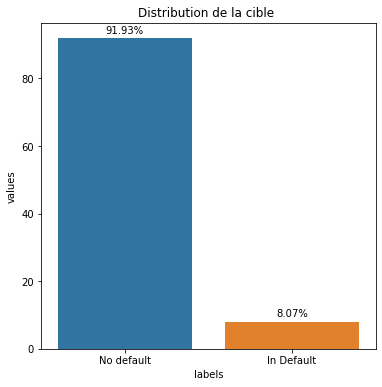

In [47]:
temp = df_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': (temp.values/temp.sum())*100
                  })

cible = ['No default', 'In Default']

plt.figure(figsize = (6,6))
plt.title('Distribution de la cible ')
sns.set_color_codes("pastel")
ax = sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
colors = ['green', 'red']
ax.set_xticklabels(cible)

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate("%.2f" % p.get_height() + '%',
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )
plt.show()

You have mixed positional and keyword arguments, some input may be discarded.


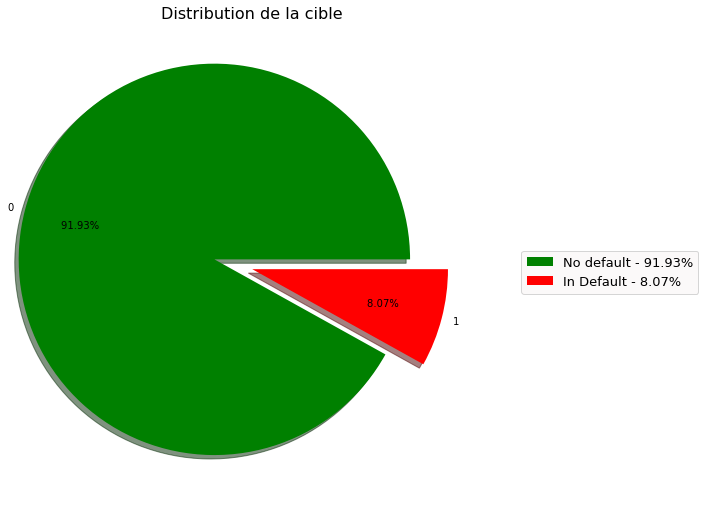

In [48]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        if (val/total)>0.01 : 
          # return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
          return '{p:.2f}% '.format(p=pct)
    return my_autopct

plt.figure(figsize = (9, 9))

colors = ['green', 'red']
cible = ['No default', 'In Default']

sns.set_palette(sns.color_palette(colors))

y = df_app_train['TARGET'].value_counts().index
x = df_app_train['TARGET'].value_counts().values
labels =y

plt.pie(x, labels=y,
           explode = [0.2, 0],
           autopct = make_autopct(x),
           pctdistance = 0.7, 
           labeldistance = 1.06,
           shadow = True)

plt.title('Distribution de la cible', fontsize=16)

plt.legend(y, loc=[1.05,0.45], labels=['%s - %1.2f%%' % (l, s) for l, s in zip(cible, (x/sum(x))*100)],fontsize=13,facecolor='#fbf8f8')


Sexe du client

Graphique séparé, le pourcentage des prêts (par sexe du client) avec la valeur CIBLE 1 (prêt non remboursé).

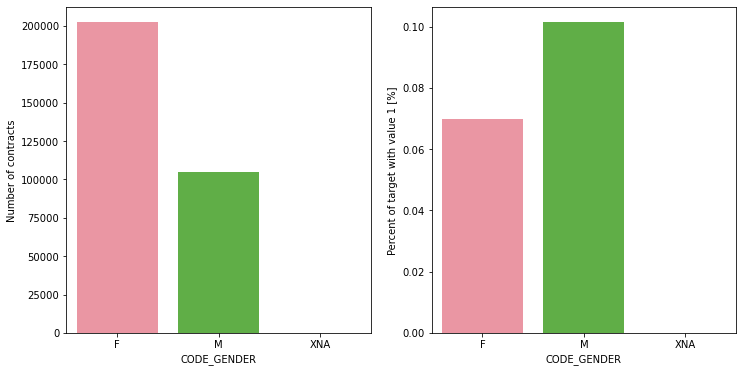

In [49]:
plot_stats('CODE_GENDER')

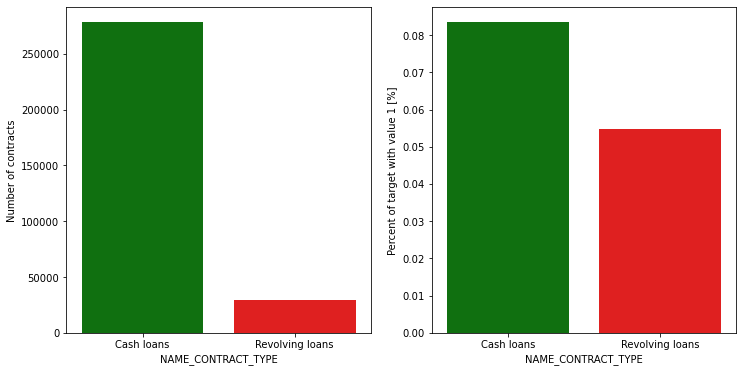

In [50]:
plot_stats('NAME_CONTRACT_TYPE')

Client avec ou sans voiture ou bien immobilier

- Graphique qui indiquent si un client possède une voiture ou un bien immobilier 
- Graphique qui indiquent si un client possède une voiture ou un bien immobilier pour la cible 1

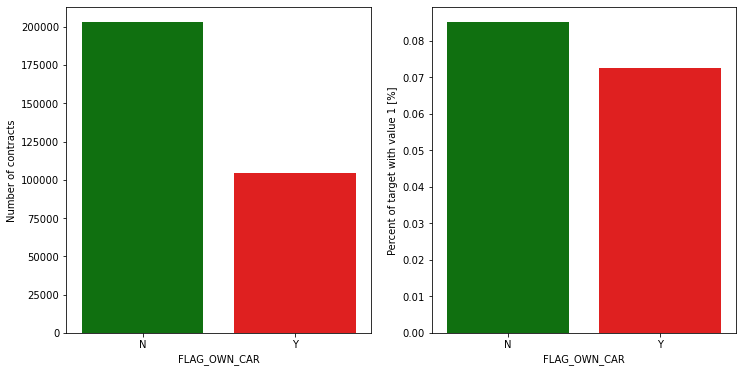

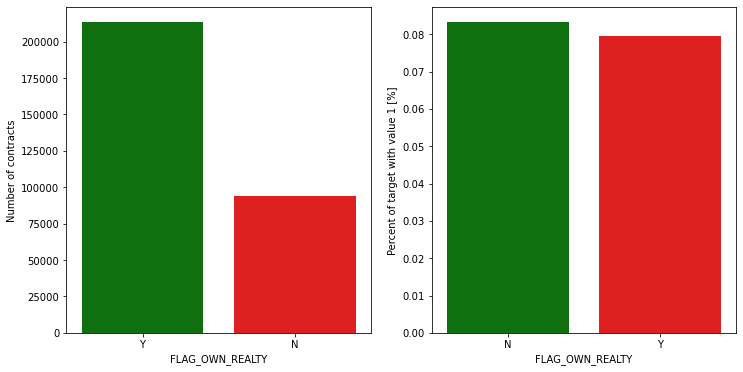

In [51]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

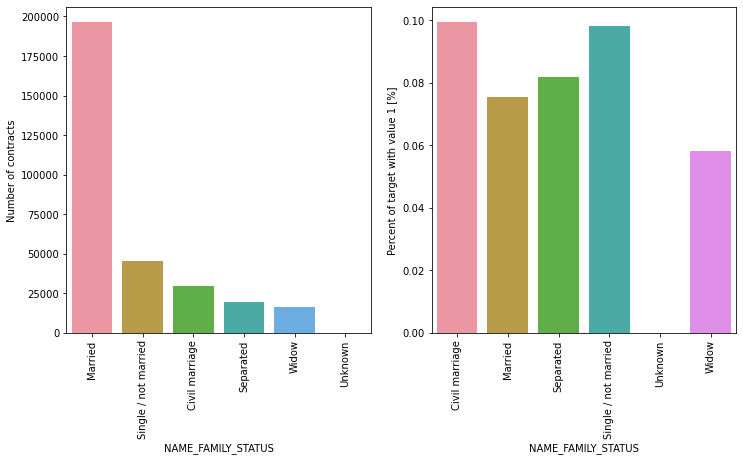

In [52]:
plot_stats('NAME_FAMILY_STATUS',True, True)

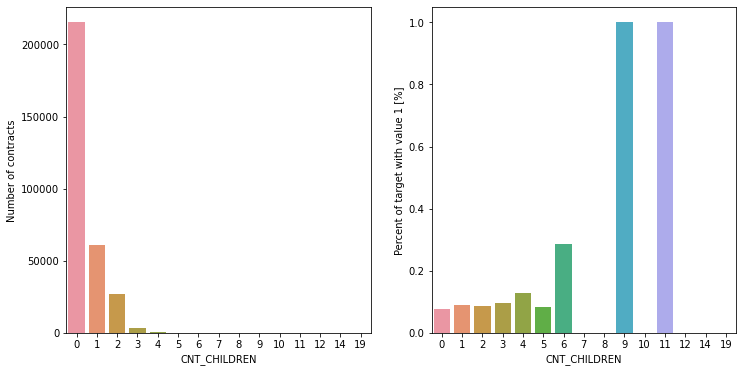

In [53]:
plot_stats('CNT_CHILDREN')

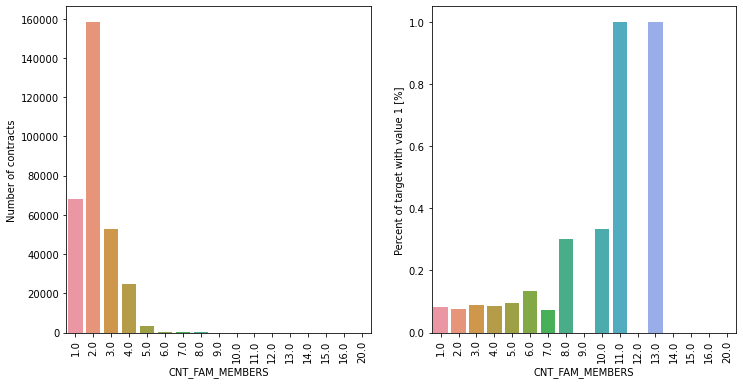

In [54]:
plot_stats('CNT_FAM_MEMBERS',True)

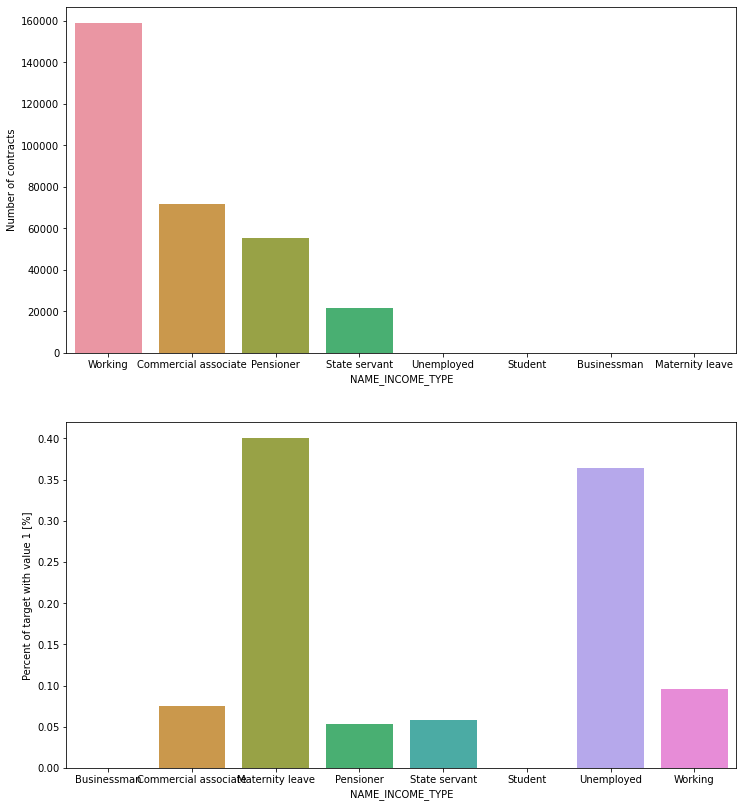

In [55]:
plot_stats('NAME_INCOME_TYPE',False,False)

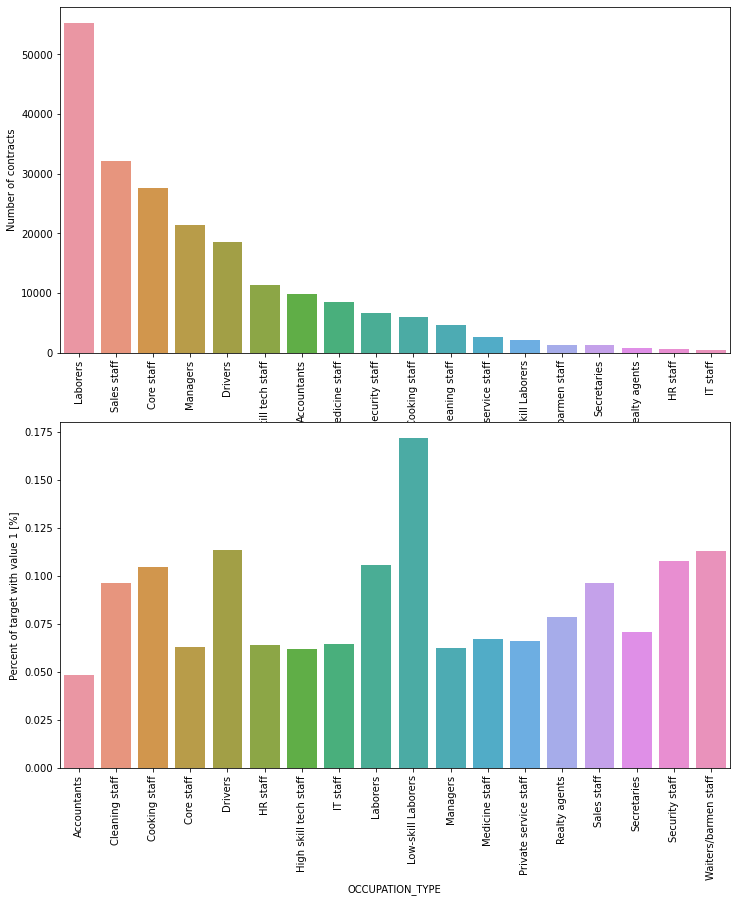

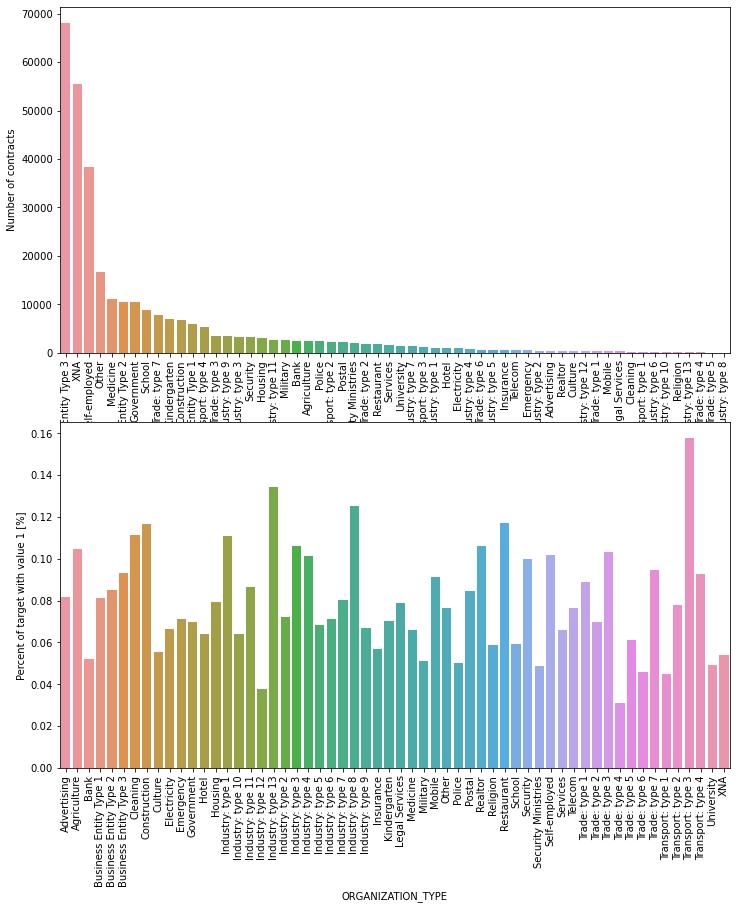

In [56]:
plot_stats('OCCUPATION_TYPE',True, False)
plot_stats('ORGANIZATION_TYPE',True, False)

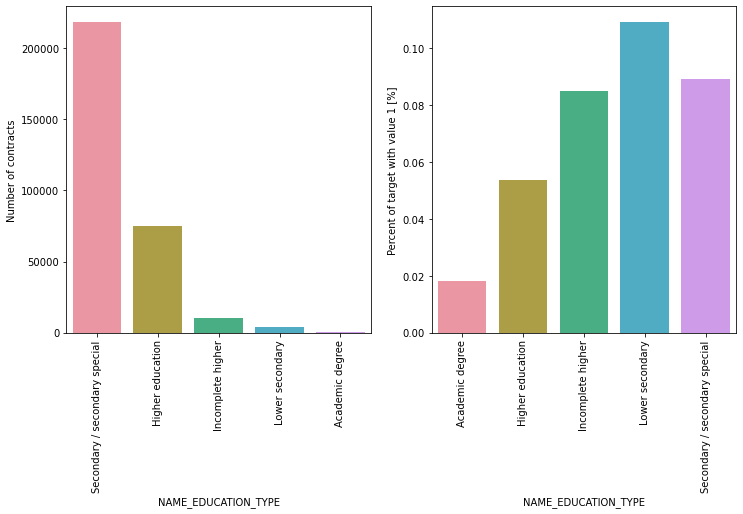

In [57]:
plot_stats('NAME_EDUCATION_TYPE',True)

<Figure size 432x288 with 0 Axes>

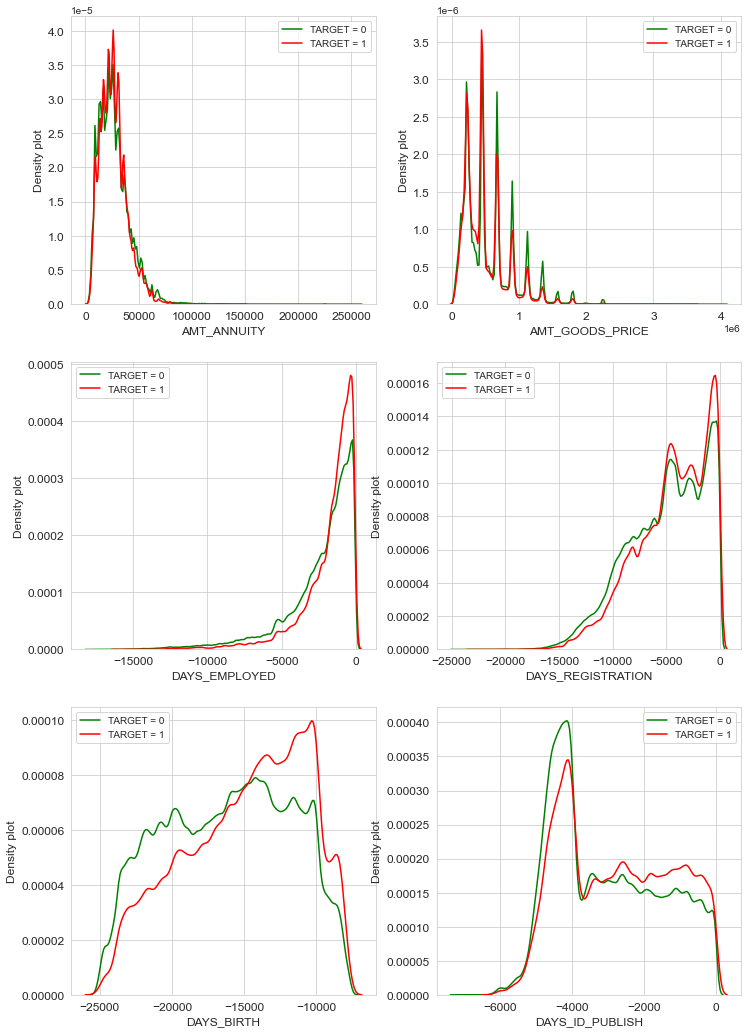

In [58]:
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
plot_distribution_comp(var,nrow=3)

# **<font color='blue'/>Transformation et encodage des données**

---

Supprimer les caractères spéciaux des noms des colonnes

In [59]:
df_train = df_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', ' ', x))

In [60]:
# df_train1.rename(columns = lambda x:re.sub('_MEAN', '', x))
# df_train1.rename(columns = lambda x:re.sub('_STD', '', x))
# df_train1.rename(columns = lambda x:re.sub('POS_', '', x))
# df_train1.rename(columns = lambda x:re.sub('PREV_', '', x))
# df_train1.rename(columns = lambda x:re.sub('INS_', '', x))
# df_train1.rename(columns = lambda x:re.sub('BUREAU_', '', x))

In [61]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REGION,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Rare,NAME_TYPE_SUITE_Spouse partner,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Rare,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single not married,NAME_FAMILY_STATUS_Widow,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Business Entity,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Education,ORGANIZATION_TYPE_Finance,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_HotelRestaurant,ORGANIZATION_TYPE_House,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Public,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Self employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_XNA,EXT_SOURCE_MEAN,BUREAU_DAYS_CREDIT_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_CREDIT_UPDATE_MEAN,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_LIMIT_MEAN,BUREAU_CNT_CREDIT_PROLONG_MEAN,BUREAU_CREDIT_ACTIVE_Active_MEAN,BUREAU_CREDIT_ACTIVE_Closed_MEAN,BUREAU_CREDIT_ACTIVE_Sold_BadDebt_MEAN,BUREAU_CREDIT_CURRENCY_currency 1_MEAN,BUREAU_CREDIT_CURRENCY_currency 2_MEAN,BUREAU_CREDIT_CURRENCY_currency 3_MEAN,BUREAU_CREDIT_CURRENCY_currency 4_MEAN,BUREAU_CREDIT_TYPE_Car loan_MEAN,BUREAU_CREDIT_TYPE_Consumer credit_MEAN,BUREAU_CREDIT_TYPE_Credit card_MEAN,BUREAU_CREDIT_TYPE_Microloan_MEAN,BUREAU_CREDIT_TYPE_Mortgage_MEAN,BUREAU_CREDIT_TYPE_Other_MEAN,BUREAU_COUNT,BUREAU_COUNT_CAT,ACTIVE_DAYS_CREDIT_MEAN,ACTIVE_DAYS_CREDIT_UPDATE_MEAN,ACTIVE_CREDIT_DAY_OVERDUE_MEAN,ACTIVE_AMT_CREDIT_SUM_MEAN,ACTIVE_AMT_CREDIT_SUM_OVERDUE_MEAN,ACTIVE_CNT_CREDIT_PROLONG_MEAN,CLOSED_DAYS_CREDIT_MEAN,CLOSED_DAYS_CREDIT_ENDDATE_MEAN,CLOSED_DAYS_CREDIT_UPDATE_MEAN,CLOSED_CREDIT_DAY_OVERDUE_MEAN,CLOSED_AMT_CREDIT_SUM_MEAN,CLOSED_AMT_CREDIT_SUM_DEBT_MEAN,CLOSED_AMT_CREDIT_SUM_OVERDUE_MEAN,CLOSED_CNT_CREDIT_PROLONG_MEAN,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_SIZE,POS_CNT_INSTALMENT_MEAN,POS_CNT_INSTALMENT_FUTURE_MEAN,POS_SK_DPD_MEAN,POS_SK_DPD_DEF_MEAN,POS_NAME_CONTRACT_STATUS_Active_MEAN,POS_NAME_CONTRACT_STATUS_Completed_MEAN,POS_NAME_CONTRACT_STATUS_Rare_MEAN,df_POS_CASH_balance_COUNT,INS_NUM_INSTALMENT_VERSION_NUNIQUE,INS_NUM_INSTALMENT_NUMBER_MEAN,INS_DAYS_INSTALMENT_MEAN,INS_DAYS_ENTRY_PAYMENT_MEAN,INS_AMT_INSTALMENT_MEAN,INS_AMT_PAYMENT_MEAN,INS_DPD_MEAN,INS_DBD_MEAN,INS_PAYMENT_PERC_MEAN,INS_PAYMENT_DIFF_MEAN,INS_COUNT,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MEAN,PREV_APP_CREDIT_PERC_MEAN,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_GOODS_PRICE_MEAN,PREV_HOUR_APPR_PROCESS_START_MEAN,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN

In [62]:
df_train.shape

(307505, 288)

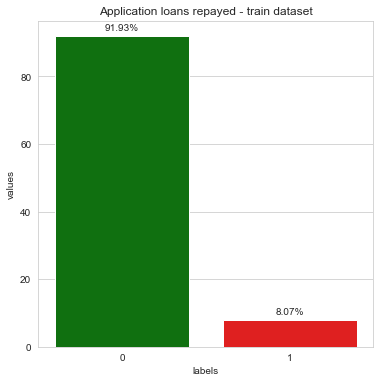

In [63]:
temp = df_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': (temp.values/temp.sum())*100
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
ax = sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()

# Ajouter les annotations sur les barres
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    plt.annotate("%.2f" % p.get_height() + '%',
                (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 8),
                textcoords='offset points',
                fontsize = 10,
                )
plt.show()

In [64]:
missing_values(df_train, plot=False)

Number of Variables include Missing Values: 222 

                                Feature  Num_Missing  Missing_Ratio DataTypes
0            ACTIVE_AMT_CREDIT_SUM_MEAN        90361       0.293852   float64
1    ACTIVE_AMT_CREDIT_SUM_OVERDUE_MEAN        90360       0.293849   float64
2        ACTIVE_CREDIT_DAY_OVERDUE_MEAN        90360       0.293849   float64
3        ACTIVE_CNT_CREDIT_PROLONG_MEAN        90360       0.293849   float64
4               ACTIVE_DAYS_CREDIT_MEAN        90360       0.293849   float64
..                                  ...          ...            ...       ...
217            OBS_60_CNT_SOCIAL_CIRCLE         1021       0.003320   float64
218                     AMT_GOODS_PRICE          276       0.000898   float64
219                     EXT_SOURCE_MEAN          172       0.000559   float64
220                         AMT_ANNUITY           12       0.000039   float64
221              DAYS_LAST_PHONE_CHANGE            1       0.000003   float64

[222 rows x 4

compter les valeurs infinies

In [65]:
count = np.isinf(df_train).values.sum()
count

0

Copier df_train

In [66]:
df_train1 = df_train.copy()

In [67]:
df_train1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'APPROVED_HOUR_APPR_PROCESS_START_MEAN',
       'APPROVED_RATE_DOWN_PAYMENT_MEAN', 'APPROVED_DAYS_DECISION_MEAN',
       'APPROVED_CNT_PAYMENT_MEAN', 'APPROVED_SELLERPLACE_AREA_MEAN',
       'APPROVED_DAYS_FIRST_DUE_MEAN',
       'APPROVED_DAYS_LAST_DUE_1ST_VERSION_MEAN',
       'APPROVED_DAYS_LAST_DUE_MEAN', 'APPROVED_DAYS_TERMINATION_MEAN',
       'APPROVED_NFLAG_INSURED_ON_APPROVAL_MEAN'],
      dtype='object', length=288)

Nombre de valeurs manquantes

In [68]:
print('Missing value: %d' % sum(df_train1.isna().sum()))

Missing value: 5553272


Traiter les valeurs manquantes

In [69]:
# Initialiser SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Affecter les colonnes avec les valeurs manquantes
col_nan = df_train1.columns[df_train1.isnull().any()].values

# X = imputer.fit_transform(df_train1)
df_train1[col_nan] = imputer.fit_transform(df_train1[col_nan])
df_train1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,REGION,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Rare,NAME_TYPE_SUITE_Spouse partner,NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Rare,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single not married,NAME_FAMILY_STATUS_Widow,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Business Entity,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Education,ORGANIZATION_TYPE_Finance,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_HotelRestaurant,ORGANIZATION_TYPE_House,ORGANIZATION_TYPE_Industry,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Public,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Self employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Trade,ORGANIZATION_TYPE_Transport,ORGANIZATION_TYPE_XNA,EXT_SOURCE_MEAN,BUREAU_DAYS_CREDIT_MEAN,BUREAU_DAYS_CREDIT_ENDDATE_MEAN,BUREAU_DAYS_CREDIT_UPDATE_MEAN,BUREAU_CREDIT_DAY_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_MEAN,BUREAU_AMT_CREDIT_SUM_DEBT_MEAN,BUREAU_AMT_CREDIT_SUM_OVERDUE_MEAN,BUREAU_AMT_CREDIT_SUM_LIMIT_MEAN,BUREAU_CNT_CREDIT_PROLONG_MEAN,BUREAU_CREDIT_ACTIVE_Active_MEAN,BUREAU_CREDIT_ACTIVE_Closed_MEAN,BUREAU_CREDIT_ACTIVE_Sold_BadDebt_MEAN,BUREAU_CREDIT_CURRENCY_currency 1_MEAN,BUREAU_CREDIT_CURRENCY_currency 2_MEAN,BUREAU_CREDIT_CURRENCY_currency 3_MEAN,BUREAU_CREDIT_CURRENCY_currency 4_MEAN,BUREAU_CREDIT_TYPE_Car loan_MEAN,BUREAU_CREDIT_TYPE_Consumer credit_MEAN,BUREAU_CREDIT_TYPE_Credit card_MEAN,BUREAU_CREDIT_TYPE_Microloan_MEAN,BUREAU_CREDIT_TYPE_Mortgage_MEAN,BUREAU_CREDIT_TYPE_Other_MEAN,BUREAU_COUNT,BUREAU_COUNT_CAT,ACTIVE_DAYS_CREDIT_MEAN,ACTIVE_DAYS_CREDIT_UPDATE_MEAN,ACTIVE_CREDIT_DAY_OVERDUE_MEAN,ACTIVE_AMT_CREDIT_SUM_MEAN,ACTIVE_AMT_CREDIT_SUM_OVERDUE_MEAN,ACTIVE_CNT_CREDIT_PROLONG_MEAN,CLOSED_DAYS_CREDIT_MEAN,CLOSED_DAYS_CREDIT_ENDDATE_MEAN,CLOSED_DAYS_CREDIT_UPDATE_MEAN,CLOSED_CREDIT_DAY_OVERDUE_MEAN,CLOSED_AMT_CREDIT_SUM_MEAN,CLOSED_AMT_CREDIT_SUM_DEBT_MEAN,CLOSED_AMT_CREDIT_SUM_OVERDUE_MEAN,CLOSED_CNT_CREDIT_PROLONG_MEAN,POS_MONTHS_BALANCE_MEAN,POS_MONTHS_BALANCE_SIZE,POS_CNT_INSTALMENT_MEAN,POS_CNT_INSTALMENT_FUTURE_MEAN,POS_SK_DPD_MEAN,POS_SK_DPD_DEF_MEAN,POS_NAME_CONTRACT_STATUS_Active_MEAN,POS_NAME_CONTRACT_STATUS_Completed_MEAN,POS_NAME_CONTRACT_STATUS_Rare_MEAN,df_POS_CASH_balance_COUNT,INS_NUM_INSTALMENT_VERSION_NUNIQUE,INS_NUM_INSTALMENT_NUMBER_MEAN,INS_DAYS_INSTALMENT_MEAN,INS_DAYS_ENTRY_PAYMENT_MEAN,INS_AMT_INSTALMENT_MEAN,INS_AMT_PAYMENT_MEAN,INS_DPD_MEAN,INS_DBD_MEAN,INS_PAYMENT_PERC_MEAN,INS_PAYMENT_DIFF_MEAN,INS_COUNT,PREV_AMT_ANNUITY_MEAN,PREV_AMT_APPLICATION_MEAN,PREV_AMT_CREDIT_MEAN,PREV_APP_CREDIT_PERC_MEAN,PREV_AMT_DOWN_PAYMENT_MEAN,PREV_AMT_GOODS_PRICE_MEAN,PREV_HOUR_APPR_PROCESS_START_MEAN,PREV_RATE_DOWN_PAYMENT_MEAN,PREV_DAYS_DECISION_MEAN,PREV_CNT_PAYMENT_MEAN

Nombre de valeurs manquantes

In [70]:
print('Missing value: %d' % sum(df_train1.isna().sum()))

Missing value: 0


In [71]:
df_train1.reset_index(drop=True)
df_train1 = reduce_mem_usage(df_train1)
df_train1.to_csv('df_train1.csv', index = False)

Memory usage of dataframe is 579.48 MB
Memory usage after optimization is: 185.34 MB
Decreased by 68.0%


# <font color='blue'/>**Modèle RandomForest**

---

Définir X et y

In [ ]:
# df_train1 = pd.read_csv("df_train1.csv")

In [ ]:
X = df_train1.iloc[ :, 2:]
y = df_train1.iloc[ :,1]

Splitter les données en train et test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0,shuffle=df_train1['TARGET'])

Nombre de valeurs manquentes

In [ ]:
print('Missing: %d' % sum(df_train1.isna().sum()))

Créer l'objet XGBClassifier

In [ ]:
rfc = RandomForestClassifier()

Entraîner le modèle

In [ ]:
rfc.fit(X_train, y_train)

In [ ]:
# pk.dump(rfc, open("rfc.pkl","wb"))

Tester le modèle sur les données test et train

In [ ]:
print('Score test    : ', rfc.score(X_test, y_test))
print('Score train   : ', rfc.score(X_train, y_train))

Prédiction X_test :

In [ ]:
y_pred = rfc.predict(X_test)

Matrice de confusion - vérifier l'exactitude

In [ ]:
cm = confusion_matrix(y_pred, y_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)

plt.xticks(rotation=0)
plt.title('Matrice de confusion', fontsize=15)
plt.grid()
plt.show()

# <font color='blue'/>**Modèle XGBoost**

---

Définir X et y

In [12]:
df_train1 = pd.read_csv("df_train1.csv")
df_train1 = reduce_mem_usage(df_train1)

Memory usage of dataframe is 675.67 MB
Memory usage after optimization is: 182.99 MB
Decreased by 72.9%


In [48]:
df_train1.memory_usage().sum() / 1024**2

577.1349334716797

In [13]:
X = df_train1.iloc[ :, 2:]
y = df_train1.iloc[ :,1]

Splitter les données en train et test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0,shuffle=df_train1['TARGET'])

Nombre de valeurs manquentes

In [12]:
print('Missing: %d' % sum(df_train1.isna().sum()))

Missing: 0


Créer l'objet XGBClassifier

In [13]:
xgb_clf = XGBClassifier(
#                         learning_rate =0.01,
#                         n_estimators=500,
#                         max_depth=4,
#                         min_child_weight=4,
#                         subsample=0.8,
#                         colsample_bytree=0.8,
#                         objective= 'binary:logistic',
#                         nthread=4,
#                         scale_pos_weight=2,
#                         seed=27

n_estimators = 500, max_depth = 3, learning_rate = 0.01, n_jobs = -1, random_state = 0
)

# xgb_clf = Pipeline([
#                  ("transform" , preprocessor),
#                  ("xgb_clf",XGBClassifier())
#                  ])

Entraîner le modèle

In [14]:
xgb_clf.fit(X_train, y_train)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[15:52:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

In [ ]:
# pk.dump(xgb_clf, open("xgb_clf.pkl","wb"))

Tester le modèle sur les données test et train

In [ ]:
print('Score test    : ', xgb_clf.score(X_test, y_test))
print('Score train   : ', xgb_clf.score(X_train, y_train))

Afficher les caractéristiques les plus importantes :

In [ ]:
# plot feature importance

# plot_importance(xgb_clf)
# plt.show()

In [ ]:
# # Fonction pour minimiser le risque de défaut de paiement sur les prédictions
# def min_risk(doc):
#     tab = []
#     idx,l = zip(*doc)
#     for i in range(len(l)):
#         if(l[i]>0.171):
#             tab.append(1)
#         else:
#             tab.append(0)
#     return tab
# y_pred = min_risk(prediction)

In [ ]:
# y_pred = xgb_clf.predict(X_test)
y_pred = xgb_clf.predict_proba(X_test)

Matrice de confusion - vérifier l'exactitude

In [ ]:
cm = confusion_matrix(y_test, np.argmax(y_pred, axis=1))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

Classification Report

In [ ]:
print('Classification Report')
print(classification_report(y_test, np.argmax(y_pred, axis=1)))

In [36]:
# view score
print('XGBClassifier Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_predict)))
print('XGBClassifier Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, y_pred[:, 1])))
print('XGBClassifier Model F1 score: {0:0.4f}'.format(f1_score(y_test, y_pred_predict)))

NameError: name 'y_pred_predict' is not defined

### Seuil optimal pour la courbe ROC

In [ ]:
def tune_threshold(true_labels, predicted_probas):
    fpr, tpr, threshold = roc_curve(true_labels, predicted_probas)
    j_stat = tpr - fpr
    index_for_best_threshold = np.argmax(j_stat)

    return threshold[index_for_best_threshold]


def proba_to_class(proba, threshold):
     return np.where(proba >= threshold, 1, 0)

Garder les probabilités que pour le résultat positif

In [ ]:
y_pred_1 = y_pred[:, 1]

Calculer roc_curve pour obtenir le meilleur seuil

In [ ]:
# calculer roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
# Meilleur seuil
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Graphique ROC pour le modèle avec la classification déséquilibrée avec le seuil optimal

In [ ]:
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
plt.figure(figsize=(10,10))
# calculer le g-mean pour chaque seuil
gmeans = sqrt(tpr * (1-fpr))
# Identifier l'index la plus grande g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# graphique roc curve du modèle
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best',s=100)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# Afficher le graphique
pyplot.show()

Matrice de confusion

In [ ]:
thresh_roc =proba_to_class(y_pred_1, tune_threshold(y_test, y_pred_1))

In [ ]:
cm = confusion_matrix(y_test,thresh_roc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
y_test.value_counts()

In [ ]:
pd.DataFrame(thresh_roc).value_counts()

Classification Report

In [ ]:
print('Classification Report')
print(classification_report(y_test, thresh_roc))

### Seuil optimal pour la courbe de rappel de précision

Définir des seuils

In [ ]:
thresholds = arange(0, 1, 0.001)

Fonction pour créer des labels en appliquant le seuil aux probabilités positives

In [ ]:
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

Evaluer chaque seuil

In [ ]:
scores = [f1_score(y_test, to_labels(y_pred_1, t)) for t in thresholds]

Obtenir le meilleur seuil

In [ ]:
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Graphique de rappel de précision pour le modèle avec le seuil optimal

In [ ]:
plt.figure(figsize=(10,10))
# Calculer roc curves
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_1)
# convertir en f score
fscore = (2 * precision * recall) / (precision + recall)
# Indentifier l'index du plus grand F-score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# Graphique roc pour le modèle
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best',s=100)
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title("Graphique de rappel de précision pour le modèle avec le seuil optimal")
pyplot.legend()
# Afficher le graphique
pyplot.show()

Matrice de confusion

In [ ]:
thresh_precision_recall =to_labels(y_pred_1, thresholds[ix])

In [ ]:
cm = confusion_matrix(y_test, thresh_precision_recall)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

Classification Report

In [ ]:
print('Classification Report')
print(classification_report(y_test, thresh_precision_recall))

In [ ]:
# import plotly.figure_factory as ff

# go.create_distplot(df_train1.loc[df_train1['TARGET'] == 0, source])
# fig = ff.create_distplot(hist_data, group_labels, curve_type='kde')
# fig2 = ff.create_distplot(df_train1.head(10000), group_labels=df_train1['TARGET'].head(10000), curve_type = 'normal')
# normal_x = fig2.df_train1.loc[df_train1['TARGET'] == 0, 'AGE']
# normal_y = fig2.df_train1.loc[df_train1['TARGET'] == 1, 'AGE']
# fig.add_traces(go.Scatter(x=normal_x, y=normal_y, mode = 'lines',
#                           line = dict(color='rgba(0,255,0, 0.6)',
#                                       #dash = 'dash'
#                                       width = 1),
#                           name = 'normal'
#                          ))
# fig.show()

# fig = px.density_contour(df_train1.head(10000)[['AGE']], x='AGE')
# fig.show()

In [ ]:
y_test.value_counts()

Classification Report

In [ ]:
# print('Classification Report')
# print(classification_report(y_test, y_pred))

Feature Importance

In [ ]:
feature_importance_df = pd.DataFrame()
feature_importance_df["feature"] = X_train.columns
feature_importance_df["importance"] = xgb_clf.feature_importances_

feature_importance_df  = feature_importance_df.sort_values('importance', ascending=False).reset_index()
plt.figure(figsize = (10, 10))
ax = sns.barplot(x ='importance', y ='feature', data= feature_importance_df[:20])

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
ax.set_title("Les 20 caractéristiques les plus importantes\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
import warnings
# Créer dataframe des caractéristiques les plus importantes
df_feature_importance=pd.DataFrame({'Features': df_train1.iloc[ :, 2:].columns,
              'Features_importance':xgb_clf.feature_importances_
              })

df_feature_importance_20 = df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20)
# df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20).to_csv('df_feature_importance.csv', index = False)

# Graphique des caractéristiques les plus importantes
fig, ax = plt.subplots()

ax = sns.barplot(x="Features_importance", y="Features", data=df_feature_importance_20, palette="husl")

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
fig.set_size_inches(7, 8)
ax.set_title("Les 20 caractéristiques les plus importantes\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

SHAP Model interpretation

In [ ]:
# Initialize SHAP Tree explainer
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_test)

# Baseline value
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0:5,:],X_train.iloc[0:5,:], plot_cmap="DrDb")

In [ ]:
shap.force_plot(explainer.expected_value,
                shap_values[7], features=df_train1.iloc[7, 2:],
#                 feature_names=df_train1.columns[0:20],
                show=False,
                # plot_cmap=['#77dd77', '#f99191']
                )

In [ ]:
df_train1
df_train1.loc[df_train1.index[4]]
X_train.loc[X_train.index[4]]

In [ ]:
# df_train1[df_train1['SK_ID_CURR'] == 100007]
# visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0])

# # compute SHAP values
# explainer = shap.Explainer(xgb_clf, X_train)
# shap_values = explainer(X_test)

# shap.plots.waterfall(shap_values[0])

Summarize the effects of all the features

In [ ]:
shap.summary_plot(shap_values, X_test)

Extraire les 20 features les plus importantes

In [ ]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)
feature_importance.head(20)

In [ ]:
col_feature_importance = feature_importance['col_name'].head(20).values
col_feature_importance

Définir les meilleurs hyperparamètres avec GridSearchCV

In [ ]:
param_grid = {
            'n_estimators': [60],
            'max_depth': [5],
            'min_samples_leaf': [2]
              }

#             'n_estimators': [100, 200, 300, 400, 500, 600],
#             'max_depth': [2, 5, 10, 15, 20, 25, 30, 35, 40],
#             'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8]

grid  = GridSearchCV(xgb_clf, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV : Le modèle avec le meilleur score

In [ ]:
grid.best_score_

GridSearchCV : Les meilleurs hyperparamètres utilisés

In [ ]:
grid.best_params_

GridSearchCV : Enregistrerle meilleur modèle

In [ ]:
model_grid = grid.best_estimator_

In [ ]:
# pk.dump(model_grid, open("model_grid.pkl","wb"))

Tester le modèle GridSearchCV sur les données test et train

In [ ]:
print('Score test (GridSearchCV)  : ', model_grid.score(X_test,y_test))
print('Score train (GridSearchCV) : ', model_grid.score(X_train,y_train))

Prédiction sur l'échantillon test

In [ ]:
y_pred = model_grid.predict(X_test)

Ci-dessous le graphique de valeurs test et les valeurs prédites :

In [ ]:
fig = plt.subplots(figsize=(8,7))

x_ax = range(len(y_test))

plt.scatter(x_ax, y_test, label='True values')
plt.scatter(x_ax, y_pred, label='Predict values')

plt.legend()
plt.show()

Matrice de confusion

In [ ]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Matrice de confusion - vérifier l'exactitude

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)

plt.xticks(rotation=0)
plt.title('Matrice de confusion', fontsize=15)
plt.grid()
plt.show()

# <font color='blue'/>**Modèle XGBoost - features importance**

---

Définir X et y

In [ ]:
# df_train1 = pd.read_csv("df_train1.csv")

In [ ]:
X = df_train1[col_feature_importance]
y = df_train1.iloc[ :,1]

Splitter les données en train et test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0,shuffle=df_train1['TARGET'])

Nombre de valeurs manquentes

In [ ]:
print('Missing: %d' % sum(df_train1.isna().sum()))

Créer l'objet XGBClassifier

In [ ]:
xgb_clf = XGBClassifier()

# xgb_clf = Pipeline([
#                  ("transform" , preprocessor),
#                  ("xgb_clf",XGBClassifier())
#                  ])

Entraîner le modèle

In [ ]:
xgb_clf.fit(X_train, y_train)

In [ ]:
# pk.dump(xgb_clf, open("xgb_clf.pkl","wb"))

Tester le modèle sur les données test et train

In [ ]:
print('Score test    : ', xgb_clf.score(X_test, y_test))
print('Score train   : ', xgb_clf.score(X_train, y_train))

Afficher les caractéristiques les plus importantes :

In [ ]:
# plot feature importance

# plot_importance(xgb_clf)
# plt.show()

In [ ]:
prediction = xgb_clf.predict_proba(X_test)
prediction

In [ ]:
# Fonction pour minimiser le risque de défaut de paiement sur les prédictions
def min_risk(doc):
    tab = []
    idx,l = zip(*doc)
    for i in range(len(l)):
        if(l[i]>0.4):
            tab.append(1)
        else:
            tab.append(0)
    return tab
y_pred = min_risk(prediction)

In [ ]:
y_pred = xgb_clf.predict(X_test)

Matrice de confusion - vérifier l'exactitude

In [ ]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.Blues)

plt.xticks(rotation=0)
plt.title('Matrice de confusion', fontsize=15)
plt.grid()
plt.show()

In [ ]:
y_test.value_counts()

Classification Report

In [ ]:
print('Classification Report')
print(classification_report(y_test, y_pred))

Feature Importance

In [135]:
feature_importance_df = pd.DataFrame()
feature_importance_df["feature"] = X_train.columns
feature_importance_df["importance"] = xgb_clf.feature_importances_

feature_importance_df  = feature_importance_df.sort_values('importance', ascending=False).reset_index()
plt.figure(figsize = (10, 10))
ax = sns.barplot(x ='importance', y ='feature', data= feature_importance_df[:20])

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
ax.set_title("Les 20 caractéristiques les plus importantes\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

NameError: name 'xgb_clf' is not defined

SHAP Model interpretation

In [ ]:
# Initialize SHAP Tree explainer
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_test)

# Baseline value
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0:5,:],X_train.iloc[0:5,:], plot_cmap="DrDb")

In [ ]:
shap.force_plot(explainer.expected_value,
                shap_values[7], features=X_train.iloc[7, :],
#                 feature_names=df_train1.columns[0:20],
                show=False,
                # plot_cmap=['#77dd77', '#f99191']
                )

In [ ]:
# df_train1[df_train1['SK_ID_CURR'] == 100007]
# visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0])

# compute SHAP values
explainer = shap.Explainer(xgb_clf, X_train)
shap_values = explainer(X_train)

shap.plots.waterfall(shap_values[0])

Summarize the effects of all the features

In [ ]:
shap.summary_plot(shap_values, X_train)

# <font color='blue'/>**Modèle LightGBM**

---

In [6]:
df_train1 = pd.read_csv("df_train1.csv")
df_train1 = reduce_mem_usage(df_train1)

Memory usage of dataframe is 675.67 MB
Memory usage after optimization is: 182.99 MB
Decreased by 72.9%


In [7]:
df_train1.memory_usage().sum() / 1024**2

182.99412536621094

In [8]:
df_train1['TARGET'].value_counts(normalize=True)

0    0.91927
1    0.08073
Name: TARGET, dtype: float64

**Suréchantillonnage aléatoire**

Le suréchantillonnage peut être défini comme l'ajout de plus de copies à la classe minoritaire. Le suréchantillonnage peut être un bon choix lorsque vous n'avez pas une tonne de données avec lesquelles travailler.

Un inconvénient à prendre en compte lors du sous-échantillonnage est qu'il peut entraîner un surajustement et une mauvaise généralisation de votre ensemble de test.

## Méthode 1 : SMOTE

In [82]:
X = df_train1.iloc[ :, 2:]
y = df_train1.iloc[ :,1]

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=18,stratify=y)

Nous allons nous assurer que nous avons les mêmes fractionnements de données à chaque fois. Nous pouvons nous en assurer en créant un KFold objet kf, et en passant cv=kf à la place du plus commun cv=5

In [79]:
# kf = KFold(n_splits=5,shuffle=False)
kf = 5

Déclaration des paramètres pour RandomizedSearchCV

In [80]:
# param_distributions = {
#                         'learning_rate':np.linspace(0.01, 0.5, 40),
# #                         'reg_alpha': [0.1,0.5, 0.99],
#                         'n_estimators': [400, 800,1000],
#                         'max_depth': [10,20],
#                         'colsample_bytree': np.linspace(0.01, 0.5, 40),
#                         'min_child_samples': [10,20,50],
#                              'scale_pos_weight':[6,10,15],
#                     }

param_distributions ={
                        'n_estimators': [400,600,800],
                        'max_depth': [5, 10,20],
                        'learning_rate':np.linspace(0.01, 0.5, 40),
#                         'num_leaves': sp_randint(6, 50), 
#                         'min_child_samples': sp_randint(100, 500), 
#                         'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
#                         'subsample': sp_uniform(loc=0.2, scale=0.8), 
                        'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
                        'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
                        'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100],
                        'scale_pos_weight':[10,12,15,18,20,30]

                        }

Validation croisée RandomizedSearchCV :

Nous allons utiliser SMOTE dans le cadre d'un pipeline. Ce pipeline n'est pas un pipeline "Scikit-Learn", mais un pipeline "imblearn".

Étant donné que SMOTE n'a pas de méthode 'fit_transform', nous ne pouvons pas l'utiliser avec le pipeline 'Scikit-Learn'.

In [88]:
pipeline = Pipeline([
        ('smote', SMOTE()),
        ('lgbm', LGBMClassifier())
    ])

params_lgbm = {'lgbm__' + key: param_distributions[key] for key in param_distributions}

random_search_smote = RandomizedSearchCV(estimator=pipeline,
                           param_distributions=params_lgbm,
                           scoring='roc_auc',
                           cv=kf)

random_search_smote.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('smote', SMOTE()),
                                             ('lgbm', LGBMClassifier())]),
                   param_distributions={'lgbm__colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020D30C82070>,
                                        'lgbm__learning_rate': array([0.01      , 0.0225641 , 0.03512821, 0.04769231, 0.06025641,
       0.07282051, 0.08538462, 0.09794872, 0.11051282, 0.12307692,
       0.13...
       0.32410256, 0.33666667, 0.34923077, 0.36179487, 0.37435897,
       0.38692308, 0.39948718, 0.41205128, 0.42461538, 0.43717949,
       0.44974359, 0.46230769, 0.47487179, 0.4874359 , 0.5       ]),
                                        'lgbm__max_depth': [5, 10, 20],
                                        'lgbm__n_estimators': [400, 600, 800],
                                        'lgbm__reg_alpha': [0, 0.1, 1, 2, 5, 7,
                                               

In [89]:
y_train.value_counts()

0    197876
1     17377
Name: TARGET, dtype: int64

Les meilleurs hyper paramètres utilisés

In [90]:
best_param = random_search_smote.best_params_
best_param

{'lgbm__colsample_bytree': 0.8325630336025514,
 'lgbm__learning_rate': 0.07282051282051281,
 'lgbm__max_depth': 20,
 'lgbm__n_estimators': 600,
 'lgbm__reg_alpha': 100,
 'lgbm__reg_lambda': 50,
 'lgbm__scale_pos_weight': 10}

Meilleur score du RandomizedSearchCV

In [91]:
random_search_smote.best_score_

0.7691034991457563

Enregistrer le meilleur modèle

In [92]:
best_lgbm_smote = random_search_smote.best_estimator_

Prédire le résultat sur les données test

In [93]:
y_pred_smote=best_lgbm_smote.predict_proba(X_test)

Afficher les scores

In [94]:
print('LightGBM RandomizedSearchCV Model precision score: {0:0.4f}'.format(precision_score(y_test, np.argmax(y_pred_smote,axis = 1))))
print('LightGBM RandomizedSearchCV Model recall score: {0:0.4f}'.format(recall_score(y_test, np.argmax(y_pred_smote,axis = 1))))

print('LightGBM RandomizedSearchCV Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, np.argmax(y_pred_smote,axis = 1))))
print('LightGBM RandomizedSearchCV Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, np.argmax(y_pred_smote,axis = 1))))
print('LightGBM RandomizedSearchCV Model F1 score: {0:0.4f}'.format(f1_score(y_test, np.argmax(y_pred_smote,axis = 1))))

LightGBM RandomizedSearchCV Model precision score: 0.1985
LightGBM RandomizedSearchCV Model recall score: 0.6267
LightGBM RandomizedSearchCV Model accuracy score: 0.7655
LightGBM RandomizedSearchCV Model ROCAUC score: 0.7022
LightGBM RandomizedSearchCV Model F1 score: 0.3015


Rapport de classification

In [95]:
print('Classification Report')
print(classification_report(y_test, np.argmax(y_pred_smote,axis = 1)))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.78      0.86     84804
           1       0.20      0.63      0.30      7448

    accuracy                           0.77     92252
   macro avg       0.58      0.70      0.58     92252
weighted avg       0.90      0.77      0.81     92252



Matrice de confusion - vérifier l'exactitude

[Text(0, 0.5, 'No Default'), Text(0, 1.5, 'In Default')]

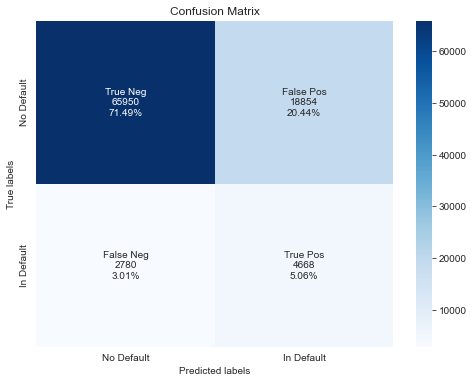

In [96]:
cm = confusion_matrix(y_test, np.argmax(y_pred_smote,axis = 1))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Default', 'In Default'])
ax.yaxis.set_ticklabels(['No Default', 'In Default'])

### Définir le seuil optimal d'affectation en utilisant une fonction de coût métier


Le seuil optimal consiste à calculer le gain obtenu pour l'ensemble des individus du jeu de données.

Pour cela nous avons fixé un poids arbitraire pour chacune des prédictions relativement à leurs valeurs réelles.

Les valeurs des poids sont les suivantes :

- fn_value = -10
- tp_value = 0
- tn_value = 1
- fp_value = 0

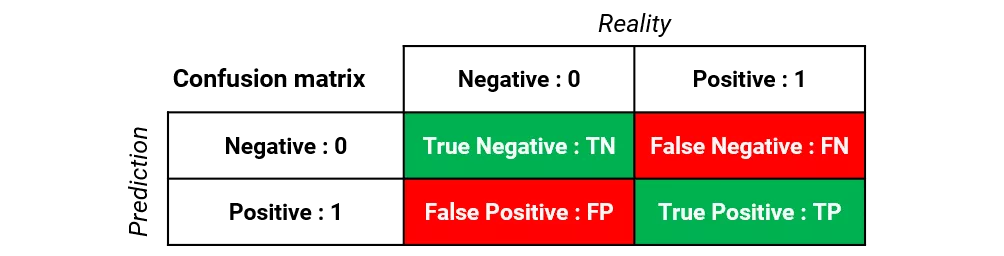

De ce fait, les prêts accordés aux individus qui ne sont finalement pas solvables sont dotés d'une pénalisation négative de -10, alors que les prêts accordés aux individus finalement solvables rapportent 1. Ce rapport 10 est totalement arbitraire et il est tout à fait possible de changer ces valeurs à la convenance de l'optique métier. Il faudra cependant relancer l'optimisation des hyper-paramètres du modèle.

In [97]:
# Définition de la métrique 'banking'
def Ind_bank(y_test, y_pred, fn_value=-10, fp_value=0, tp_value=0, tn_value=1):

    # Matrice de Confusion
    mat_conf = confusion_matrix(y_test, y_pred)
    
    # Nombre de True Negatifs
    tn = mat_conf[0, 0]
    # Nombre de Faux Négatifs
    fn = mat_conf[1, 0]
    # Nombre de Faux Positifs
    fp = mat_conf[0, 1]
    # Nombre de True Positifs
    tp = mat_conf[1, 1]
    
    # Gain total
    J = tp*tp_value + tn*tn_value + fp*fp_value + fn*fn_value
    
    # Gain maximum
    max_J = (fp + tn)*tn_value + (fn + tp)*tp_value
    
    # Gain minimum
    min_J = (fp + tn)*fp_value + (fn + tp)*fn_value
    
    # Gain normalisé entre 0 et 1
    J_normalized = (J - min_J)/(max_J - min_J)
    
    return J_normalized  # Retourne la fonction d'évaluation


# Fonction pour annoter le seuil de solvabilité dans le graphique
def annot_max(x,y, ax=None):
    ymax = max(y)
    xpos = np.argmax(y)
    xmax = x[xpos]

    text= "Seuil de solvabilité={:.3f}".format(xmax)
    plt.axvline(xmax, c='red', linewidth=0.9,  alpha=0.8)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(facecolor='white', fc ="0.99", edgecolor='black', boxstyle='round')
    arrowprops=dict(arrowstyle = "->",connectionstyle = "angle,angleA=90,angleB=180,rad=0",color='black')
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)

# Evolution du gain en fonction du seuil de solvabilité fixé Si score < seuil : client solvable, Sinon : client non solvable    
def gain_seuil(clf, y_set, x_set):
    
    """
    Evolution du gain en fonction du seuil de solvabilité fixé
    Si score < seuil : client solvable
    Sinon : client non solvable
    
    """
    cost_function = []
    threshold_x = np.linspace(0.0, 1, 20)
    
    for threshold in threshold_x:
        
        # Score du modèle : 0 à 1
        y_scores = clf.predict_proba(x_set)[:, 1]
        
        # Score > seuil de solvabilité : retourne 1 sinon 0
        y_pred = (y_scores > threshold)
        
        y_pred = np.array(y_pred > 0) * 1
        # Calcul de l'indice bancaire
        cost_function.append(Ind_bank(y_set, y_pred))
    
        
    # Affichage du gain en fonction du seuil de solvabilité   
    plt.figure(figsize=(8, 8))
    plt.plot(threshold_x, cost_function)
    annot_max(threshold_x,cost_function)
    plt.grid()
    plt.xlabel("Seuil de probabilité")
    plt.ylabel("Indice banquaire")
    plt.xticks(np.linspace(0.1, 1, 10))

Graphique avec le seuil métier

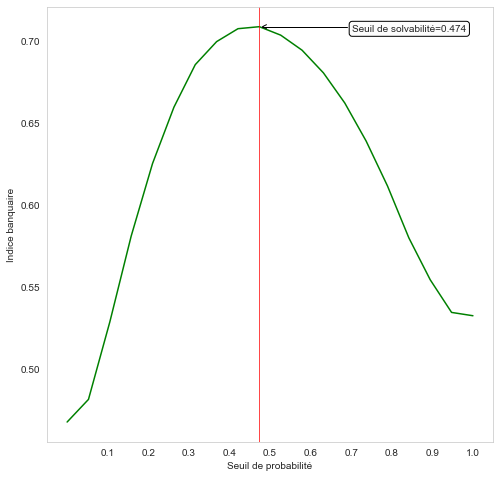

In [98]:
gain_seuil(best_lgbm_smote, y_test, X_test)

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.75      0.84     84804
           1       0.19      0.66      0.29      7448

    accuracy                           0.74     92252
   macro avg       0.58      0.71      0.57     92252
weighted avg       0.90      0.74      0.80     92252



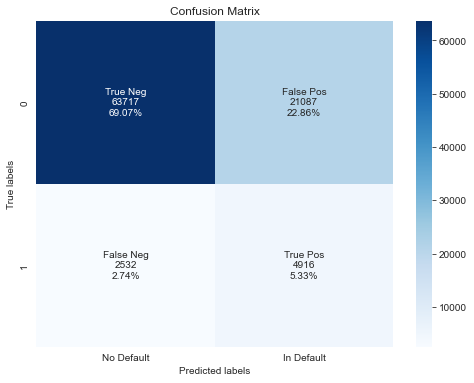

In [99]:
# Définition d'un seuil de classification
threshold = 0.474
pred_metier = (y_pred_smote[:,1] > threshold).astype(int)

cm = confusion_matrix(y_test, pred_metier)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Default', 'In Default'])

print('Classification Report')
print(classification_report(y_test, pred_metier))

Afficher les scores

In [100]:
print('LightGBM RandomizedSearchCV Model precision score: {0:0.4f}'.format(precision_score(y_test, pred_metier)))
print('LightGBM RandomizedSearchCV Model recall score: {0:0.4f}'.format(recall_score(y_test, pred_metier)))

print('LightGBM RandomizedSearchCV Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, pred_metier)))
print('LightGBM RandomizedSearchCV Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, pred_metier)))
print('LightGBM RandomizedSearchCV Model F1 score: {0:0.4f}'.format(f1_score(y_test, pred_metier)))

LightGBM RandomizedSearchCV Model precision score: 0.1891
LightGBM RandomizedSearchCV Model recall score: 0.6600
LightGBM RandomizedSearchCV Model accuracy score: 0.7440
LightGBM RandomizedSearchCV Model ROCAUC score: 0.7057
LightGBM RandomizedSearchCV Model F1 score: 0.2939


Afficher les scores

### Seuil optimal pour la courbe ROC

In [101]:
def tune_threshold(true_labels, predicted_probas):
    fpr, tpr, threshold = roc_curve(true_labels, predicted_probas)
    j_stat = tpr - fpr
    index_for_best_threshold = np.argmax(j_stat)

    return threshold[index_for_best_threshold]


def proba_to_class(proba, threshold):
     return np.where(proba >= threshold, 1, 0)
    
# Annoter le seuil optimal AUC
def annot_auc(x,y, ax=None):
    plt.annotate("{:.3f}".format(y), xy=(x, y), xytext=(x*2, y/2), fontsize=12,
                     bbox=dict(facecolor='white', fc ="0.99", edgecolor='black', boxstyle='round'),
                     arrowprops=dict(arrowstyle = "->",connectionstyle = "angle,angleA=90,angleB=180,rad=0",color='black')
                     )

Garder les probabilités que pour le résultat positif

In [102]:
y_pred_1 = y_pred_smote[:, 1]

Calculer roc_curve pour obtenir le meilleur seuil

In [103]:
# calculer roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
# Meilleur seuil
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.435869


Graphique ROC pour le modèle avec la classification déséquilibrée avec le seuil optimal

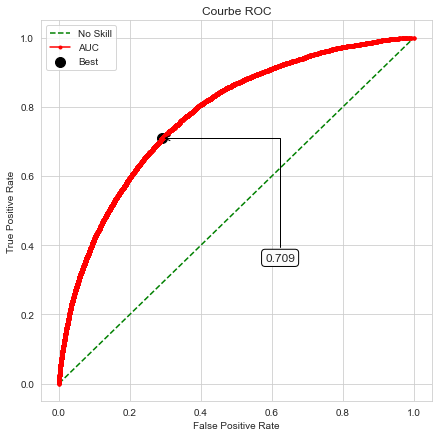

In [104]:
plt.figure(figsize=(7,7))

# graphique roc curve du modèle
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='AUC')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best',s=100)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()

plt.title('Courbe ROC')

annot_auc(fpr[ix],tpr[ix])

# Afficher le graphique
pyplot.show()

Matrice de confusion

[Text(0, 0.5, 'No Default'), Text(0, 1.5, 'In Default')]

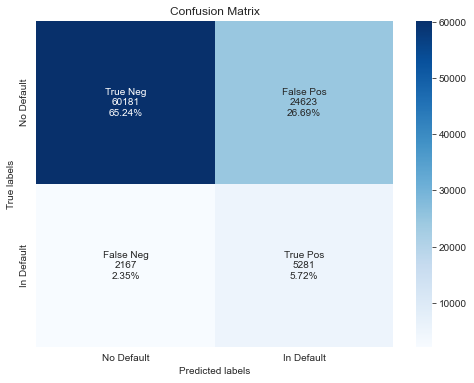

In [105]:
thresh_roc =proba_to_class(y_pred_1, tune_threshold(y_test, y_pred_1))

cm = confusion_matrix(y_test,thresh_roc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Default', 'In Default'])
ax.yaxis.set_ticklabels(['No Default', 'In Default'])

Classification Report

In [106]:
print('Classification Report')
print(classification_report(y_test, thresh_roc))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.71      0.82     84804
           1       0.18      0.71      0.28      7448

    accuracy                           0.71     92252
   macro avg       0.57      0.71      0.55     92252
weighted avg       0.90      0.71      0.77     92252



Afficher les scores

In [107]:
print('LightGBM RandomizedSearchCV Model precision score: {0:0.4f}'.format(precision_score(y_test, thresh_roc)))
print('LightGBM RandomizedSearchCV Model recall score: {0:0.4f}'.format(recall_score(y_test, thresh_roc)))

print('LightGBM RandomizedSearchCV Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, thresh_roc)))
print('LightGBM RandomizedSearchCV Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, thresh_roc)))
print('LightGBM RandomizedSearchCV Model F1 score: {0:0.4f}'.format(f1_score(y_test, thresh_roc)))

LightGBM RandomizedSearchCV Model precision score: 0.1766
LightGBM RandomizedSearchCV Model recall score: 0.7090
LightGBM RandomizedSearchCV Model accuracy score: 0.7096
LightGBM RandomizedSearchCV Model ROCAUC score: 0.7093
LightGBM RandomizedSearchCV Model F1 score: 0.2828


### Seuil optimal pour la courbe de rappel / précision

Définir des seuils

In [108]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_1)

Evaluer chaque seuil

In [109]:
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.973408, F-Score=nan


invalid value encountered in true_divide


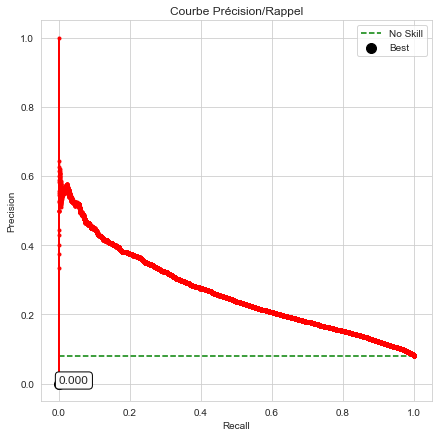

In [110]:
# plot the roc curve for the model
plt.figure(figsize=(7,7))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best',s=100)
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()

plt.title('Courbe Précision/Rappel')
annot_auc(recall[ix],precision[ix])

# show the plot
pyplot.show()

Fonction pour créer des labels en appliquant le seuil aux probabilités positives

In [111]:
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')
thresh_precision_recall =to_labels(y_pred_1, thresholds[ix])

[Text(0, 0.5, 'No Default'), Text(0, 1.5, 'In Default')]

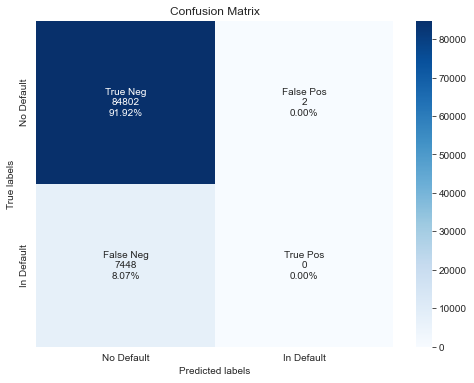

In [112]:
cm = confusion_matrix(y_test, thresh_precision_recall)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Default', 'In Default'])
ax.yaxis.set_ticklabels(['No Default', 'In Default'])

Classification Report

In [113]:
print('Classification Report')
print(classification_report(y_test, thresh_precision_recall))

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84804
           1       0.00      0.00      0.00      7448

    accuracy                           0.92     92252
   macro avg       0.46      0.50      0.48     92252
weighted avg       0.85      0.92      0.88     92252



Afficher les scores

In [114]:
print('LightGBM RandomizedSearchCV Model precision score: {0:0.4f}'.format(precision_score(y_test, thresh_precision_recall)))
print('LightGBM RandomizedSearchCV Model recall score: {0:0.4f}'.format(recall_score(y_test, thresh_precision_recall)))

print('LightGBM RandomizedSearchCV Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, thresh_precision_recall)))
print('LightGBM RandomizedSearchCV Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, thresh_precision_recall)))
print('LightGBM RandomizedSearchCV Model F1 score: {0:0.4f}'.format(f1_score(y_test, thresh_precision_recall)))

LightGBM RandomizedSearchCV Model precision score: 0.0000
LightGBM RandomizedSearchCV Model recall score: 0.0000
LightGBM RandomizedSearchCV Model accuracy score: 0.9192
LightGBM RandomizedSearchCV Model ROCAUC score: 0.5000
LightGBM RandomizedSearchCV Model F1 score: 0.0000


Afficher les caractéristiques les plus importantes :

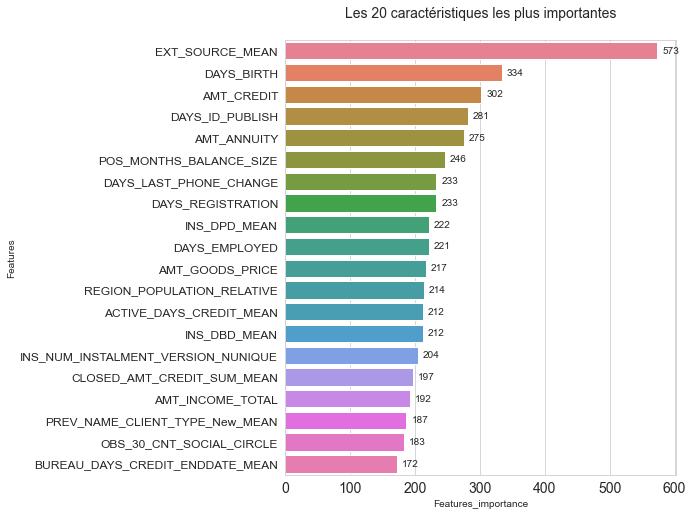

In [196]:
import warnings
# Créer dataframe des caractéristiques les plus importantes
df_feature_importance=pd.DataFrame({'Features': df_train1.iloc[ :, 2:].columns,
              'Features_importance':best_lgbm_smote['lgbm'].feature_importances_
              })

df_feature_importance_20 = df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20)
# df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20).to_csv('df_feature_importance.csv', index = False)

# Graphique des caractéristiques les plus importantes
fig, ax = plt.subplots()

ax = sns.barplot(x="Features_importance", y="Features", data=df_feature_importance_20, palette="husl")

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
fig.set_size_inches(7, 8)
ax.set_title("Les 20 caractéristiques les plus importantes\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

## Méthode 2 : Oversampling

In [115]:
print("shape target before handling",'\n',y.value_counts())

over  = RandomOverSampler(sampling_strategy='minority')

pipe_over = Pipeline([
                ('over', over)
                ])
X_over, y_over = pipe_over.fit_resample(X_train, y_train)

print("shape target after handling",'\n',y_over.value_counts())

shape target before handling 
 0    282680
1     24825
Name: TARGET, dtype: int64
shape target after handling 
 0    197876
1    197876
Name: TARGET, dtype: int64


Validation croisée RandomizedSearchCV :

In [116]:
pipeline = Pipeline([
                    ('lgbm', LGBMClassifier())
                ])
params_lgbm = {'lgbm__' + key: param_distributions[key] for key in param_distributions}

random_search_over = RandomizedSearchCV(estimator=pipeline,
                           param_distributions=params_lgbm,
                           scoring='balanced_accuracy',
                           cv=kf)

random_search_over.fit(X_over, y_over)

RandomizedSearchCV(cv=5, estimator=Pipeline(steps=[('lgbm', LGBMClassifier())]),
                   param_distributions={'lgbm__colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020D30C82070>,
                                        'lgbm__learning_rate': array([0.01      , 0.0225641 , 0.03512821, 0.04769231, 0.06025641,
       0.07282051, 0.08538462, 0.09794872, 0.11051282, 0.12307692,
       0.13564103, 0.14820513,...
       0.32410256, 0.33666667, 0.34923077, 0.36179487, 0.37435897,
       0.38692308, 0.39948718, 0.41205128, 0.42461538, 0.43717949,
       0.44974359, 0.46230769, 0.47487179, 0.4874359 , 0.5       ]),
                                        'lgbm__max_depth': [5, 10, 20],
                                        'lgbm__n_estimators': [400, 600, 800],
                                        'lgbm__reg_alpha': [0, 0.1, 1, 2, 5, 7,
                                                            10, 50, 100],
                                      

In [117]:
pipeline = Pipeline([
                    ('lgbm', LGBMClassifier())
                ])
pipeline.steps[0][1]

LGBMClassifier()

Les meilleurs hyper paramètres utilisés

In [118]:
best_param = random_search_over.best_params_
best_param

{'lgbm__colsample_bytree': 0.457472274327661,
 'lgbm__learning_rate': 0.4246153846153846,
 'lgbm__max_depth': 10,
 'lgbm__n_estimators': 600,
 'lgbm__reg_alpha': 50,
 'lgbm__reg_lambda': 0,
 'lgbm__scale_pos_weight': 20}

Meilleur score du RandomizedSearchCV

In [119]:
random_search_over.best_score_

0.8265327813419849

Enregistrer le meilleur modèle

In [120]:
best_lgbm_over = random_search_over.best_estimator_
# pk.dump(best_lgbm_over, open("best_lgbm_over.pkl","wb"))

In [121]:
best_lgbm_over.steps[0][1]

LGBMClassifier(colsample_bytree=0.457472274327661,
               learning_rate=0.4246153846153846, max_depth=10, n_estimators=600,
               reg_alpha=50, reg_lambda=0, scale_pos_weight=20)

Prédire le résultat sur les données test

In [122]:
y_pred_over=best_lgbm_over.predict_proba(X_test)

Afficher les scores

In [123]:
print('LightGBM RandomizedSearchCV Model precision score: {0:0.4f}'.format(precision_score(y_test, np.argmax(y_pred_over,axis = 1))))
print('LightGBM RandomizedSearchCV Model recall score: {0:0.4f}'.format(recall_score(y_test, np.argmax(y_pred_over,axis = 1))))

print('LightGBM RandomizedSearchCV Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, np.argmax(y_pred_over,axis = 1))))
print('LightGBM RandomizedSearchCV Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, np.argmax(y_pred_over,axis = 1))))
print('LightGBM RandomizedSearchCV Model F1 score: {0:0.4f}'.format(f1_score(y_test, np.argmax(y_pred_over,axis = 1))))

LightGBM RandomizedSearchCV Model precision score: 0.1500
LightGBM RandomizedSearchCV Model recall score: 0.6564
LightGBM RandomizedSearchCV Model accuracy score: 0.6720
LightGBM RandomizedSearchCV Model ROCAUC score: 0.6649
LightGBM RandomizedSearchCV Model F1 score: 0.2442


Rapport de classification

In [124]:
print('Classification Report')
print(classification_report(y_test, np.argmax(y_pred_over,axis = 1)))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     84804
           1       0.15      0.66      0.24      7448

    accuracy                           0.67     92252
   macro avg       0.55      0.66      0.52     92252
weighted avg       0.89      0.67      0.75     92252



Matrice de confusion - vérifier l'exactitude

[Text(0, 0.5, 'No Default'), Text(0, 1.5, 'In Default')]

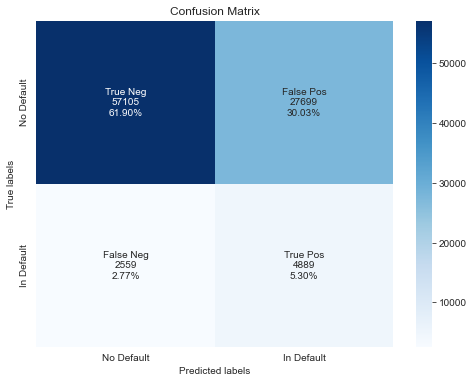

In [125]:
cm = confusion_matrix(y_test, np.argmax(y_pred_over,axis = 1))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Default', 'In Default'])
ax.yaxis.set_ticklabels(['No Default', 'In Default'])

### Définir le seuil métier

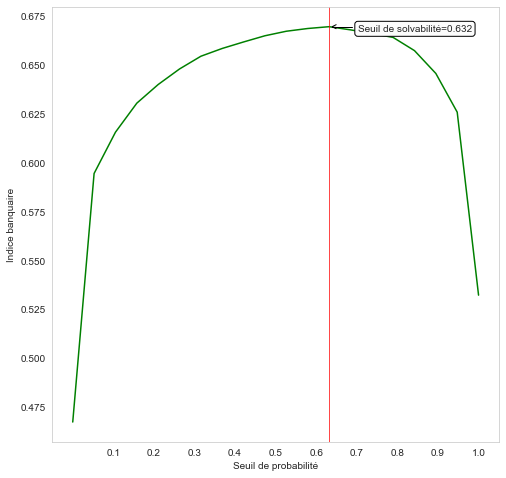

In [126]:
gain_seuil(best_lgbm_over, y_test, X_test)

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.54      0.69     84804
           1       0.13      0.77      0.22      7448

    accuracy                           0.56     92252
   macro avg       0.55      0.66      0.46     92252
weighted avg       0.90      0.56      0.66     92252



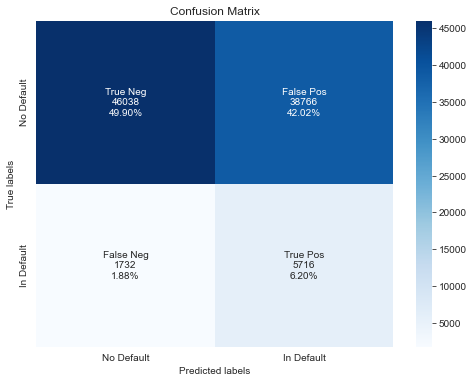

In [127]:
# Définition d'un seuil de classification
threshold = 0.263
pred_metier = (y_pred_over[:,1] > threshold).astype(int)

cm = confusion_matrix(y_test, pred_metier)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Default', 'In Default'])
ax.yaxis.set_ticklabels(['No Default', 'In Default'])

print('Classification Report')
print(classification_report(y_test, pred_metier))

Afficher les scores

In [128]:
print('LightGBM RandomizedSearchCV Model precision score: {0:0.4f}'.format(precision_score(y_test, pred_metier)))
print('LightGBM RandomizedSearchCV Model recall score: {0:0.4f}'.format(recall_score(y_test, pred_metier)))

print('LightGBM RandomizedSearchCV Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, pred_metier)))
print('LightGBM RandomizedSearchCV Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, pred_metier)))
print('LightGBM RandomizedSearchCV Model F1 score: {0:0.4f}'.format(f1_score(y_test, pred_metier)))

LightGBM RandomizedSearchCV Model precision score: 0.1285
LightGBM RandomizedSearchCV Model recall score: 0.7675
LightGBM RandomizedSearchCV Model accuracy score: 0.5610
LightGBM RandomizedSearchCV Model ROCAUC score: 0.6552
LightGBM RandomizedSearchCV Model F1 score: 0.2201


### Seuil optimal pour la courbe ROC

Garder les probabilités que pour le résultat positif

In [129]:
y_pred_1 = y_pred_over[:, 1]

Calculer roc_curve pour obtenir le meilleur seuil

In [130]:
# calculer roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
# Meilleur seuil
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.562547


Graphique ROC pour le modèle avec la classification déséquilibrée avec le seuil optimal

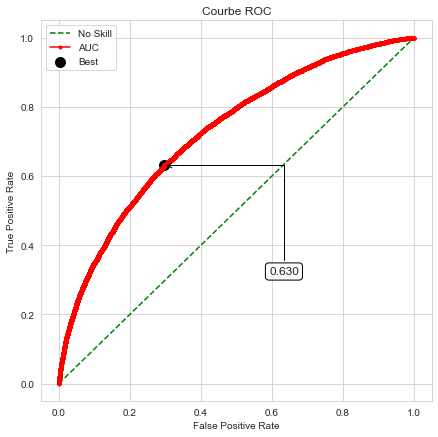

In [131]:
plt.figure(figsize=(7,7))

# graphique roc curve du modèle
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='AUC')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best',s=100)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()

plt.title('Courbe ROC')
annot_auc(fpr[ix],tpr[ix])
# Afficher le graphique
pyplot.show()

Matrice de confusion

[Text(0, 0.5, 'No Default'), Text(0, 1.5, 'In Default')]

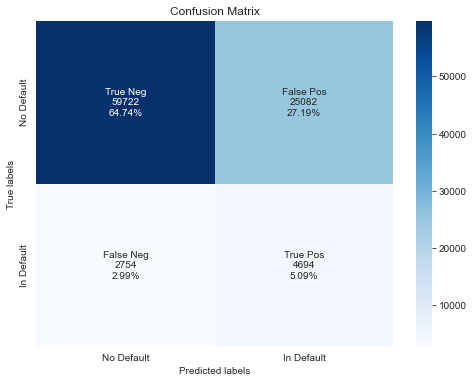

In [132]:
thresh_roc =proba_to_class(y_pred_1, tune_threshold(y_test, y_pred_1))

cm = confusion_matrix(y_test,thresh_roc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Default', 'In Default'])
ax.yaxis.set_ticklabels(['No Default', 'In Default'])

Classification Report

In [133]:
print('Classification Report')
print(classification_report(y_test, thresh_roc))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84804
           1       0.16      0.63      0.25      7448

    accuracy                           0.70     92252
   macro avg       0.56      0.67      0.53     92252
weighted avg       0.89      0.70      0.77     92252



Afficher les scores

In [134]:
print('LightGBM RandomizedSearchCV Model precision score: {0:0.4f}'.format(precision_score(y_test, thresh_roc)))
print('LightGBM RandomizedSearchCV Model recall score: {0:0.4f}'.format(recall_score(y_test, thresh_roc)))

print('LightGBM RandomizedSearchCV Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, thresh_roc)))
print('LightGBM RandomizedSearchCV Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, thresh_roc)))
print('LightGBM RandomizedSearchCV Model F1 score: {0:0.4f}'.format(f1_score(y_test, thresh_roc)))

LightGBM RandomizedSearchCV Model precision score: 0.1576
LightGBM RandomizedSearchCV Model recall score: 0.6302
LightGBM RandomizedSearchCV Model accuracy score: 0.6983
LightGBM RandomizedSearchCV Model ROCAUC score: 0.6672
LightGBM RandomizedSearchCV Model F1 score: 0.2522


### Seuil optimal pour la courbe de rappel / précision

Définir des seuils

In [135]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_1)

Evaluer chaque seuil

In [136]:
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.889852, F-Score=0.281


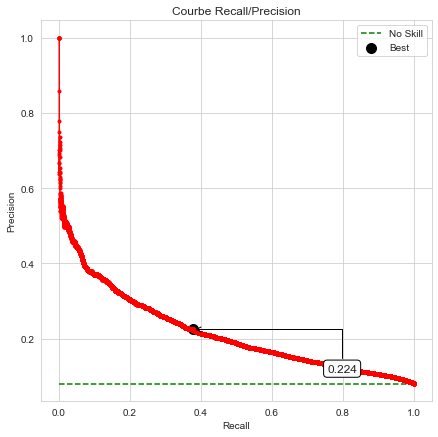

In [137]:
# plot the roc curve for the model
plt.figure(figsize=(7,7))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best',s=100)
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()

plt.title('Courbe Recall/Precision')
annot_auc(recall[ix],precision[ix])
# show the plot
pyplot.show()

Fonction pour créer des labels en appliquant le seuil aux probabilités positives

In [138]:
thresh_precision_recall =to_labels(y_pred_1, thresholds[ix])

[Text(0, 0.5, 'No Default'), Text(0, 1.5, 'In Default')]

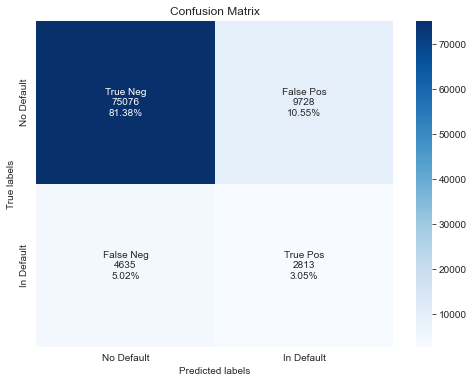

In [139]:
cm = confusion_matrix(y_test, thresh_precision_recall)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Default', 'In Default'])
ax.yaxis.set_ticklabels(['No Default', 'In Default'])

Classification Report

In [140]:
print('Classification Report')
print(classification_report(y_test, thresh_precision_recall))

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.89      0.91     84804
           1       0.22      0.38      0.28      7448

    accuracy                           0.84     92252
   macro avg       0.58      0.63      0.60     92252
weighted avg       0.88      0.84      0.86     92252



Afficher les scores

In [141]:
print('LightGBM RandomizedSearchCV Model precision score: {0:0.4f}'.format(precision_score(y_test, thresh_precision_recall)))
print('LightGBM RandomizedSearchCV Model recall score: {0:0.4f}'.format(recall_score(y_test, thresh_precision_recall)))

print('LightGBM RandomizedSearchCV Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, thresh_precision_recall)))
print('LightGBM RandomizedSearchCV Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, thresh_precision_recall)))
print('LightGBM RandomizedSearchCV Model F1 score: {0:0.4f}'.format(f1_score(y_test, thresh_precision_recall)))

LightGBM RandomizedSearchCV Model precision score: 0.2243
LightGBM RandomizedSearchCV Model recall score: 0.3777
LightGBM RandomizedSearchCV Model accuracy score: 0.8443
LightGBM RandomizedSearchCV Model ROCAUC score: 0.6315
LightGBM RandomizedSearchCV Model F1 score: 0.2815


Afficher les caractéristiques les plus importantes :

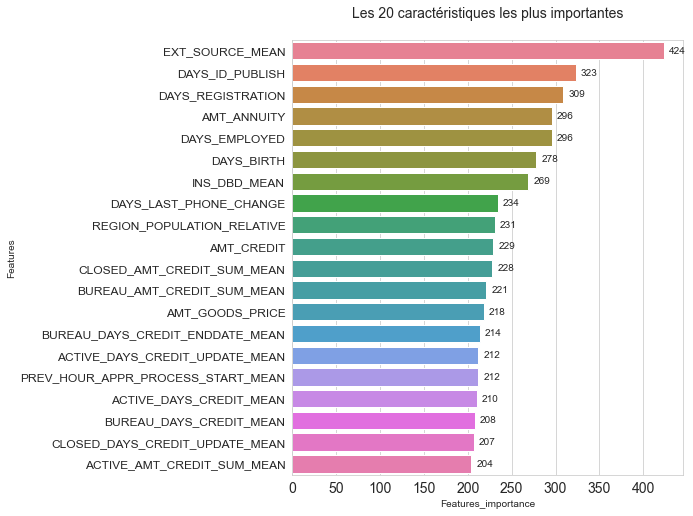

In [197]:
import warnings
# Créer dataframe des caractéristiques les plus importantes
df_feature_importance=pd.DataFrame({'Features': df_train1.iloc[ :, 2:].columns,
              'Features_importance':best_lgbm_over['lgbm'].feature_importances_
              })

df_feature_importance_20 = df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20)
# df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20).to_csv('df_feature_importance.csv', index = False)

# Graphique des caractéristiques les plus importantes
fig, ax = plt.subplots()

ax = sns.barplot(x="Features_importance", y="Features", data=df_feature_importance_20, palette="husl")

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
fig.set_size_inches(7, 8)
ax.set_title("Les 20 caractéristiques les plus importantes\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

## Méthode 3 : Undersampling

In [142]:
print("shape target before handling",'\n',y.value_counts())

under = RandomUnderSampler(sampling_strategy=0.5)

pipe_under = Pipeline([
                ('under', under)
                ])
X_under, y_under = pipe_under.fit_resample(X_train, y_train)

print("shape target after handling",'\n',y_under.value_counts())

shape target before handling 
 0    282680
1     24825
Name: TARGET, dtype: int64
shape target after handling 
 0    34754
1    17377
Name: TARGET, dtype: int64


Validation croisée RandomizedSearchCV :

In [143]:
pipeline = Pipeline([
                    ('lgbm', LGBMClassifier())
                ])
params_lgbm = {'lgbm__' + key: param_distributions[key] for key in param_distributions}

random_search_under = RandomizedSearchCV(estimator=pipeline,
                                         param_distributions=params_lgbm,
                                         scoring='balanced_accuracy',
                                         cv=kf)

random_search_under.fit(X_under, y_under)

RandomizedSearchCV(cv=5, estimator=Pipeline(steps=[('lgbm', LGBMClassifier())]),
                   param_distributions={'lgbm__colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020D30C82070>,
                                        'lgbm__learning_rate': array([0.01      , 0.0225641 , 0.03512821, 0.04769231, 0.06025641,
       0.07282051, 0.08538462, 0.09794872, 0.11051282, 0.12307692,
       0.13564103, 0.14820513,...
       0.32410256, 0.33666667, 0.34923077, 0.36179487, 0.37435897,
       0.38692308, 0.39948718, 0.41205128, 0.42461538, 0.43717949,
       0.44974359, 0.46230769, 0.47487179, 0.4874359 , 0.5       ]),
                                        'lgbm__max_depth': [5, 10, 20],
                                        'lgbm__n_estimators': [400, 600, 800],
                                        'lgbm__reg_alpha': [0, 0.1, 1, 2, 5, 7,
                                                            10, 50, 100],
                                      

In [144]:
# Number of classes in training Data
y_under.value_counts()

0    34754
1    17377
Name: TARGET, dtype: int64

Les meilleurs hyper paramètres utilisés

In [145]:
best_param = random_search_under.best_params_
best_param

{'lgbm__colsample_bytree': 0.7793735235196593,
 'lgbm__learning_rate': 0.4748717948717949,
 'lgbm__max_depth': 10,
 'lgbm__n_estimators': 400,
 'lgbm__reg_alpha': 50,
 'lgbm__reg_lambda': 1,
 'lgbm__scale_pos_weight': 10}

Meilleur score du RandomizedSearchCV

In [146]:
random_search_under.best_score_

0.6708436924847611

Enregistrer le meilleur modèle

In [147]:
best_lgbm_under = random_search_under.best_estimator_

Prédire le résultat sur les données test

In [148]:
y_pred_under=best_lgbm_under.predict_proba(X_test)

Afficher les scores

In [149]:
print('LightGBM RandomizedSearchCV Model precision score: {0:0.4f}'.format(precision_score(y_test, np.argmax(y_pred_under,axis = 1))))
print('LightGBM RandomizedSearchCV Model recall score: {0:0.4f}'.format(recall_score(y_test, np.argmax(y_pred_under,axis = 1))))

print('LightGBM RandomizedSearchCV Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, np.argmax(y_pred_under,axis = 1))))
print('LightGBM RandomizedSearchCV Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, np.argmax(y_pred_under,axis = 1))))
print('LightGBM RandomizedSearchCV Model F1 score: {0:0.4f}'.format(f1_score(y_test, np.argmax(y_pred_under,axis = 1))))

LightGBM RandomizedSearchCV Model precision score: 0.1332
LightGBM RandomizedSearchCV Model recall score: 0.8165
LightGBM RandomizedSearchCV Model accuracy score: 0.5561
LightGBM RandomizedSearchCV Model ROCAUC score: 0.6749
LightGBM RandomizedSearchCV Model F1 score: 0.2290


Rapport de classification

In [150]:
print('Classification Report')
print(classification_report(y_test, np.argmax(y_pred_under,axis = 1)))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.53      0.69     84804
           1       0.13      0.82      0.23      7448

    accuracy                           0.56     92252
   macro avg       0.55      0.67      0.46     92252
weighted avg       0.90      0.56      0.65     92252



Matrice de confusion - vérifier l'exactitude

[Text(0, 0.5, 'No Default'), Text(0, 1.5, 'In Default')]

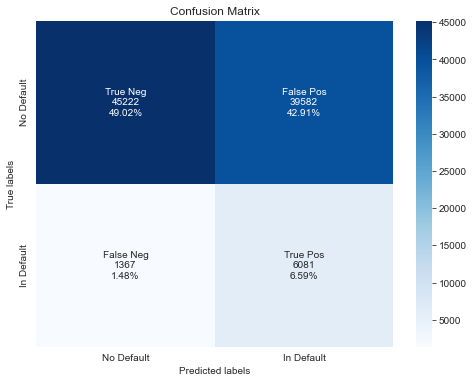

In [151]:
cm = confusion_matrix(y_test, np.argmax(y_pred_under,axis = 1))

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Default', 'In Default'])
ax.yaxis.set_ticklabels(['No Default', 'In Default'])

### Définir le seuil métier

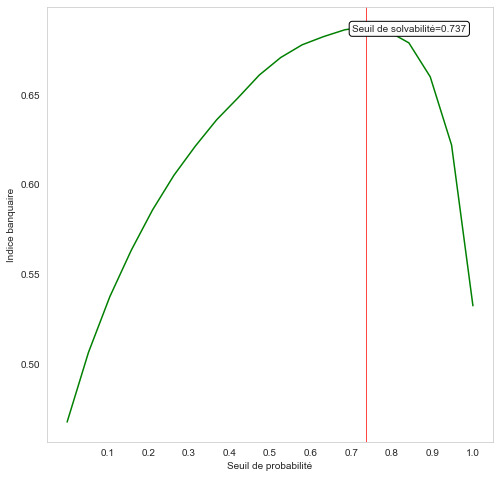

In [152]:
gain_seuil(best_lgbm_under, y_test, X_test)

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     84804
           1       0.17      0.64      0.27      7448

    accuracy                           0.72     92252
   macro avg       0.57      0.69      0.55     92252
weighted avg       0.90      0.72      0.78     92252



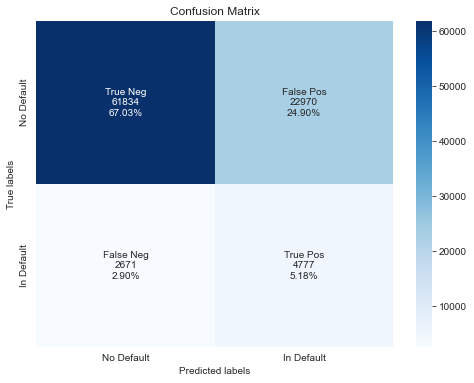

In [153]:
# Définition d'un seuil de classification
threshold = 0.737
pred_metier = (y_pred_under[:,1] > threshold).astype(int)

cm = confusion_matrix(y_test, pred_metier)

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Default', 'In Default'])
ax.yaxis.set_ticklabels(['No Default', 'In Default'])

print('Classification Report')
print(classification_report(y_test, pred_metier))

Afficher les scores

In [154]:
print('LightGBM RandomizedSearchCV Model precision score: {0:0.4f}'.format(precision_score(y_test, pred_metier)))
print('LightGBM RandomizedSearchCV Model recall score: {0:0.4f}'.format(recall_score(y_test, pred_metier)))

print('LightGBM RandomizedSearchCV Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, pred_metier)))
print('LightGBM RandomizedSearchCV Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, pred_metier)))
print('LightGBM RandomizedSearchCV Model F1 score: {0:0.4f}'.format(f1_score(y_test, pred_metier)))

LightGBM RandomizedSearchCV Model precision score: 0.1722
LightGBM RandomizedSearchCV Model recall score: 0.6414
LightGBM RandomizedSearchCV Model accuracy score: 0.7221
LightGBM RandomizedSearchCV Model ROCAUC score: 0.6853
LightGBM RandomizedSearchCV Model F1 score: 0.2715


### Seuil optimal pour la courbe ROC

Garder les probabilités que pour le résultat positif

In [155]:
y_pred_1 = y_pred_under[:, 1]

Calculer roc_curve pour obtenir le meilleur seuil

In [156]:
# calculer roc curves
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
# Meilleur seuil
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.676453


Graphique ROC pour le modèle avec la classification déséquilibrée avec le seuil optimal

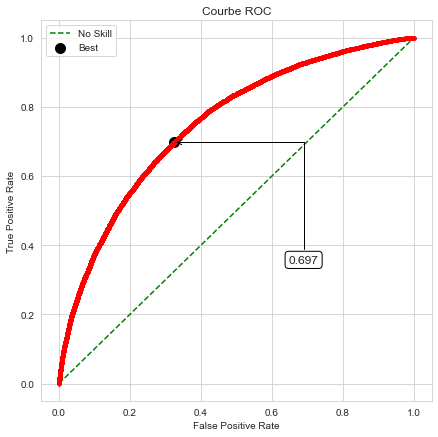

In [157]:
plt.figure(figsize=(7,7))

# graphique roc curve du modèle
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best',s=100)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()

plt.title('Courbe ROC')
annot_auc(fpr[ix],tpr[ix])
# Afficher le graphique
pyplot.show()

Matrice de confusion

[Text(0, 0.5, 'No Default'), Text(0, 1.5, 'In Default')]

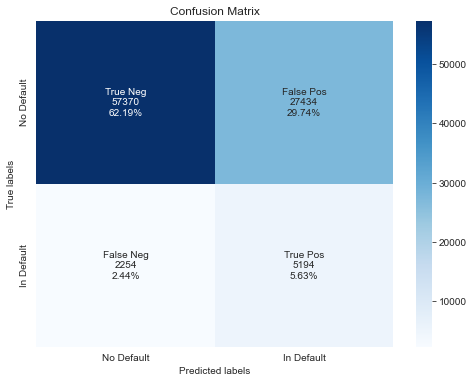

In [158]:
thresh_roc =proba_to_class(y_pred_1, tune_threshold(y_test, y_pred_1))

cm = confusion_matrix(y_test,thresh_roc)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Default', 'In Default'])
ax.yaxis.set_ticklabels(['No Default', 'In Default'])

Classification Report

In [159]:
print('Classification Report')
print(classification_report(y_test, thresh_roc))

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.68      0.79     84804
           1       0.16      0.70      0.26      7448

    accuracy                           0.68     92252
   macro avg       0.56      0.69      0.53     92252
weighted avg       0.90      0.68      0.75     92252



Afficher les scores

In [160]:
print('LightGBM RandomizedSearchCV Model precision score: {0:0.4f}'.format(precision_score(y_test, thresh_roc)))
print('LightGBM RandomizedSearchCV Model recall score: {0:0.4f}'.format(recall_score(y_test, thresh_roc)))

print('LightGBM RandomizedSearchCV Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, thresh_roc)))
print('LightGBM RandomizedSearchCV Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, thresh_roc)))
print('LightGBM RandomizedSearchCV Model F1 score: {0:0.4f}'.format(f1_score(y_test, thresh_roc)))

LightGBM RandomizedSearchCV Model precision score: 0.1592
LightGBM RandomizedSearchCV Model recall score: 0.6974
LightGBM RandomizedSearchCV Model accuracy score: 0.6782
LightGBM RandomizedSearchCV Model ROCAUC score: 0.6869
LightGBM RandomizedSearchCV Model F1 score: 0.2592


### Seuil optimal pour la courbe de rappel / précision

Définir des seuils

In [161]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_1)

Evaluer chaque seuil

In [162]:
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

Best Threshold=0.999560, F-Score=nan


invalid value encountered in true_divide


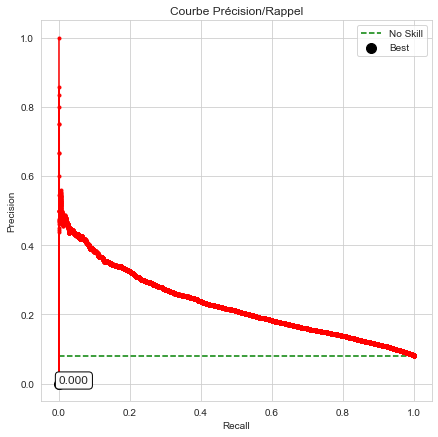

In [163]:
# plot the roc curve for the model
plt.figure(figsize=(7,7))
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best',s=100)
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()

plt.title('Courbe Précision/Rappel')
annot_auc(recall[ix],precision[ix])
# show the plot
pyplot.show()

Fonction pour créer des labels en appliquant le seuil aux probabilités positives

In [164]:
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')
thresh_precision_recall =to_labels(y_pred_1, thresholds[ix])

[Text(0, 0.5, 'No Default'), Text(0, 1.5, 'In Default')]

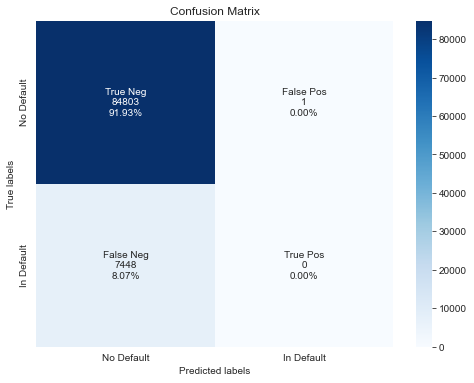

In [165]:
cm = confusion_matrix(y_test, thresh_precision_recall)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No Default', 'In Default'])
ax.yaxis.set_ticklabels(['No Default', 'In Default'])

Classification Report

In [166]:
print('Classification Report')
print(classification_report(y_test, thresh_precision_recall))

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84804
           1       0.00      0.00      0.00      7448

    accuracy                           0.92     92252
   macro avg       0.46      0.50      0.48     92252
weighted avg       0.85      0.92      0.88     92252



Afficher les scores

In [171]:
print('LightGBM RandomizedSearchCV Model precision score: {0:0.4f}'.format(precision_score(y_test, thresh_precision_recall)))
print('LightGBM RandomizedSearchCV Model recall score: {0:0.4f}'.format(recall_score(y_test, thresh_precision_recall)))

print('LightGBM RandomizedSearchCV Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, thresh_precision_recall)))
print('LightGBM RandomizedSearchCV Model ROCAUC score: {0:0.4f}'.format(roc_auc_score(y_test, thresh_precision_recall)))
print('LightGBM RandomizedSearchCV Model F1 score: {0:0.4f}'.format(f1_score(y_test, thresh_precision_recall)))

LightGBM RandomizedSearchCV Model precision score: 0.0000
LightGBM RandomizedSearchCV Model recall score: 0.0000
LightGBM RandomizedSearchCV Model accuracy score: 0.9193
LightGBM RandomizedSearchCV Model ROCAUC score: 0.5000
LightGBM RandomizedSearchCV Model F1 score: 0.0000


Afficher les caractéristiques les plus importantes :

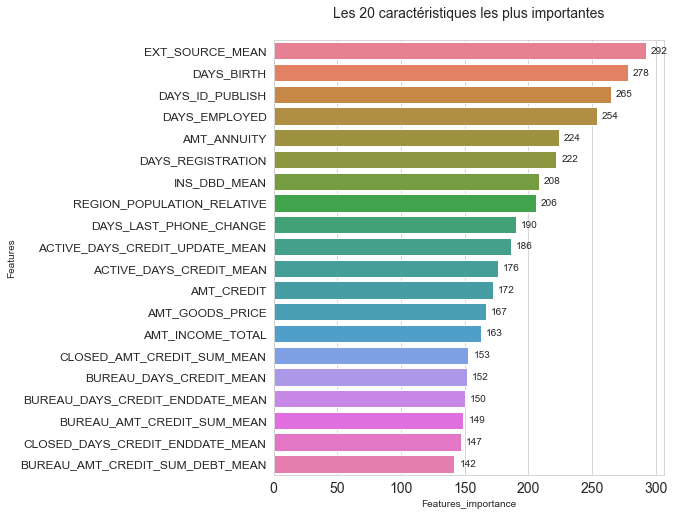

In [180]:
import warnings
# Créer dataframe des caractéristiques les plus importantes
df_feature_importance=pd.DataFrame({'Features': df_train1.iloc[ :, 2:].columns,
              'Features_importance':best_lgbm_under['lgbm'].feature_importances_
              })

df_feature_importance_20 = df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20)
# df_feature_importance.sort_values(by='Features_importance', ascending=False).head(20).to_csv('df_feature_importance.csv', index = False)

# Graphique des caractéristiques les plus importantes
fig, ax = plt.subplots()

ax = sns.barplot(x="Features_importance", y="Features", data=df_feature_importance_20, palette="husl")

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.0f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
fig.set_size_inches(7, 8)
ax.set_title("Les 20 caractéristiques les plus importantes\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

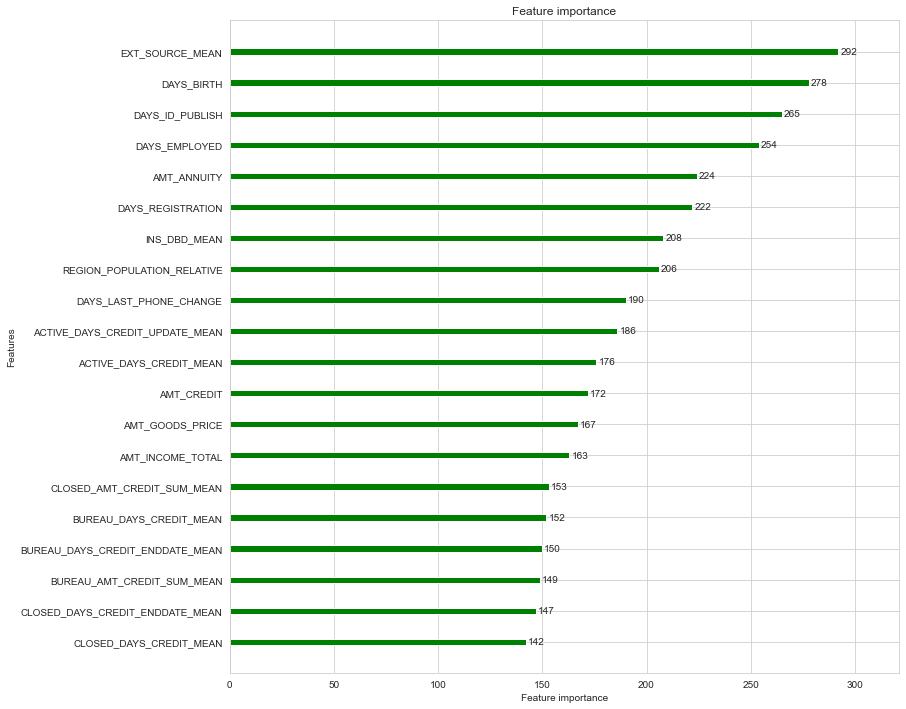

In [195]:
# lgbm.plot_importance(best_lgbm_under['lgbm'] ,max_num_features=20, figsize=(12,12))
# plt.show()

# <font color='blue'/>**Analyse Shapley**

---

L'interprétation du modèle avec SHAP

In [199]:
# Initialiser SHAP Tree explainer
explainer = shap.TreeExplainer(best_lgbm_under['lgbm'])
shap_values = explainer.shap_values(X_test)

# Baseline value
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


Explainer expected value: 0.4021952811593513


Résumez le poids de toutes les features

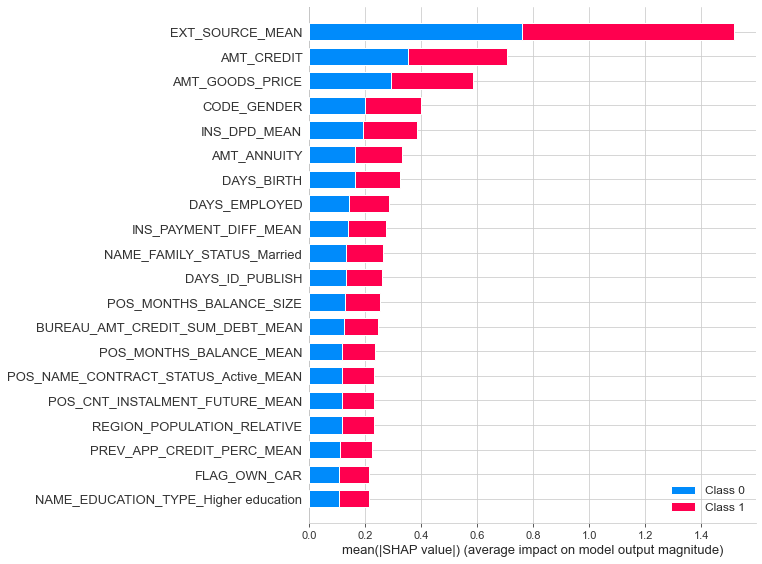

In [200]:
shap.summary_plot(shap_values, X_test)

Extraire les 20 features les plus importantes avec Shapley

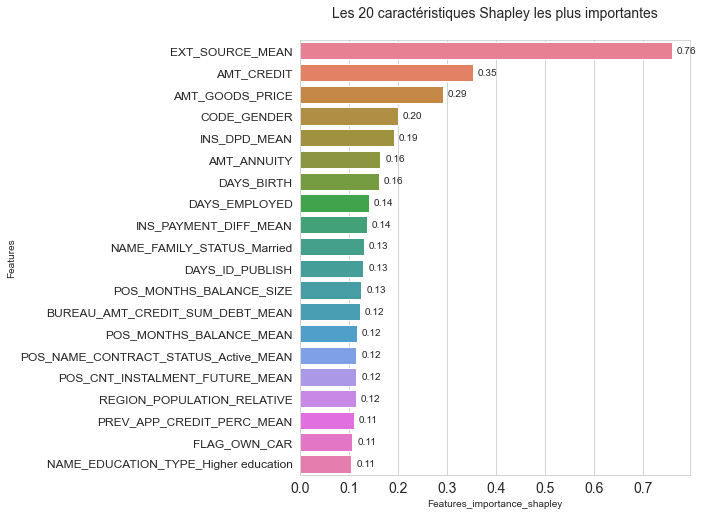

In [216]:
vals= np.abs(shap_values[1]).mean(0)
df_feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Features','Features_importance_shapley'])
df_feature_importance.sort_values(by=['Features_importance_shapley'],ascending=False,inplace=True)

df_feature_importance_20 = df_feature_importance.head(20)
# Graphique des caractéristiques les plus importantes
fig, ax = plt.subplots()

ax = sns.barplot(x="Features_importance_shapley", y="Features", data=df_feature_importance_20, palette="husl")

# Ajouter les annotations sur les barres
for p in ax.patches:
    ax.annotate("%.2f" % p.get_width(), xy=(p.get_width(), p.get_y()+p.get_height()/2),
                xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# Ajouter des textes aux labels, titre etc.
fig.set_size_inches(7, 8)
ax.set_title("Les 20 caractéristiques Shapley les plus importantes\n", fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.show()

In [239]:
shap.initjs()
# def plot_explainer_client(j):
#     return shap.force_plot(expected_value, shap_values[0][j], X_test.iloc[j],
#                            matplotlib = True, show = True, text_rotation=45,link='identity')

# plot_explainer_client(262)
index_client = 25
shap.force_plot(expected_value, shap_values[1][index_client],X_test.iloc[index_client],link='identity')

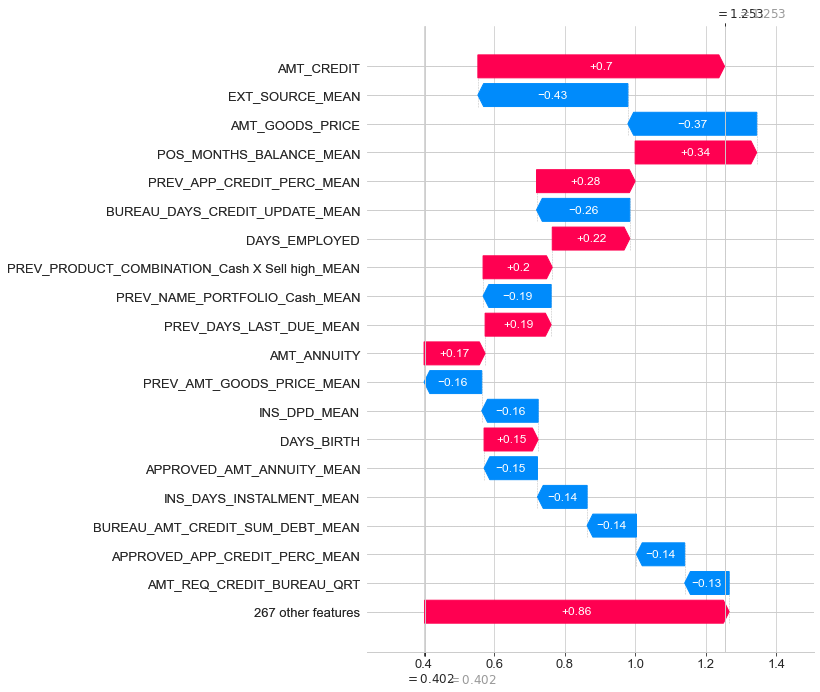

In [241]:
index_client = 25
shap.plots._waterfall.waterfall_legacy(expected_value,
                                        shap_values[1][index_client],
                                        feature_names = X_test.columns,
                                        max_display = 20)